## Setup and Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import json
import sklearn
import math

In [2]:
#loading the data sets
#Import the parsing function from the separate file
from parse_pgn_games import create_games_csv

# Parse the PGN file and create CSV
pgn_path = 'Data/lichess_AuraChessTransformer_2026-01-22.pgn'
output_csv_path = 'Data/games_summary.csv'

games_df = create_games_csv(pgn_path, output_csv_path)
print(f"\n✓ Saved game summary to: {output_csv_path}")


# Display summary
print(f"Total games parsed: {len(games_df)}")


print("Games DATASET OVERVIEW:")
print(f"\nShape: {games_df.shape[0]:,} rows × {games_df.shape[1]} columns")

# Display column types and non-null counts
print(games_df.info())

# TODO: Load CSV from Data/results_full.csv
# - Use pandas read_csv()
# - Store in variable: df
print("FIRST 5 ROWS:")
display(games_df.head())  # Use display() for better Jupyter rendering


✓ Saved game summary to: Data/games_summary.csv
Total games parsed: 453
Games DATASET OVERVIEW:

Shape: 453 rows × 18 columns
<class 'pandas.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   game_id            453 non-null    str  
 1   date               453 non-null    str  
 2   utc_date           453 non-null    str  
 3   utc_time           453 non-null    str  
 4   white_player       453 non-null    str  
 5   black_player       453 non-null    str  
 6   white_elo          453 non-null    str  
 7   black_elo          453 non-null    str  
 8   white_rating_diff  453 non-null    str  
 9   black_rating_diff  453 non-null    str  
 10  result             453 non-null    str  
 11  winner             453 non-null    str  
 12  num_moves          453 non-null    int64
 13  time_control       453 non-null    str  
 14  eco                453 non-null    str

,game_id,date,utc_date,utc_time,white_player,black_player,white_elo,black_elo,white_rating_diff,black_rating_diff,result,winner,num_moves,time_control,eco,termination,variant,site
0,euTIepDn,2025.11.11,2025.11.11,15:16:08,AuraChessTransformer,AuraChessCNN,1584,1519,-1,+1,1/2-1/2,Draw,50,180+2,A46,Normal,Standard,https://lichess.org/euTIepDn
1,qLtehhxd,2025.11.11,2025.11.11,15:15:46,AuraChessCNN,AuraChessTransformer,1512,1591,+7,-7,1-0,AuraChessCNN,30,180+2,B06,Normal,Standard,https://lichess.org/qLtehhxd
2,yUmq5927,2025.11.11,2025.11.11,15:15:04,AuraChessTransformer,AuraChessCNN,1593,1511,-2,+1,1/2-1/2,Draw,61,180+2,D27,Normal,Standard,https://lichess.org/yUmq5927
3,0FEHbp3I,2025.11.11,2025.11.11,15:14:30,AuraChessTransformer,AuraChessCNN,1588,1515,+5,-4,1-0,AuraChessTransformer,51,180+2,E94,Normal,Standard,https://lichess.org/0FEHbp3I
4,8dccm5I4,2025.11.11,2025.11.11,15:13:55,AuraChessCNN,AuraChessTransformer,1520,1583,-5,+5,0-1,AuraChessTransformer,48,180+2,B88,Normal,Standard,https://lichess.org/8dccm5I4


In [3]:
# loading new data

raw_df = pd.read_csv('Data/results_first_move.csv')

# display first 5 rows
print(raw_df.head())

# display info
print(raw_df.info())


  PuzzleId                                                FEN  \
0    00008  r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...   
1    0000D  5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...   
2    0008Q       8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64   
3    0009B  r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...   
4    000Pw  6k1/5p1p/4p3/4q3/3nN3/2Q3P1/PP3P1P/6K1 w - - 2 37   

                           Moves  Rating  RatingDeviation  Popularity  \
0  f2g3 e6e7 b2b1 b3c1 b1c1 h6c1    1877               76          95   
1            d3d6 f8d8 d6d8 f6d8    1501               73          96   
2            e7f7 f5e5 e2f1 e5e6    1355               76          91   
3            b6c5 e2g4 h3g4 d1g4    1103               74          88   
4            e4d2 d4e2 g1f1 e2c3    1422               74          92   

   NbPlays                                 Themes  \
0     8786  crushing hangingPiece long middlegame   
1    35000                advantage endgame short   
2      743 

In [4]:
puzzles_df = raw_df.copy()

# add the number of moves to the puzzles dataset a move in chess is a full move (white + black)
puzzles_df['num_moves'] = puzzles_df['Moves'].apply(lambda x: math.ceil(len(str(x).split()) / 2) if pd.notna(x) and str(x).strip() else 0)

display(puzzles_df.head())

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags,cnn_first_move_correct,transformer_first_move_correct,cnn_first_move_top5_correct,transformer_first_move_top5_correct,cnn_first_move,transformer_first_move,cnn_top5_moves,transformer_top5_moves,num_moves
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1877,76,95,8786,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN,1,1,1,1,e6e7,e6e7,"[""e6e7"", ""e6f6"", ""h2g3"", ""h6f6"", ""h2h3""]","[""e6e7"", ""e6f6"", ""h2g3"", ""h2h3"", ""e6e3""]",3
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1501,73,96,35000,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN,0,0,0,0,b6d6,b6a5,"[""b6d6"", ""b6a5"", ""b6b5"", ""b6a7"", ""b6c6""]","[""b6a5"", ""b6d6"", ""b6b5"", ""b6d8"", ""b6a7""]",2
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1355,76,91,743,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN,1,1,1,1,f5e5,f5e5,"[""f5e5"", ""f5f7"", ""f5h5"", ""f5d5"", ""f5f3""]","[""f5e5"", ""f5f7"", ""f5h5"", ""f5g5"", ""f5f3""]",2
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1103,74,88,603,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...,1,1,1,1,e2g4,e2g4,"[""e2g4"", ""e2f1"", ""e2f3"", ""b1c3"", ""d2c4""]","[""e2g4"", ""e2f1"", ""e2f3"", ""d2c4"", ""d2f1""]",2
4,000Pw,6k1/5p1p/4p3/4q3/3nN3/2Q3P1/PP3P1P/6K1 w - - 2 37,e4d2 d4e2 g1f1 e2c3,1422,74,92,604,crushing endgame fork short,https://lichess.org/au2lCK5o#73,NaN,0,0,1,1,e5e1,e5e1,"[""e5e1"", ""e5e2"", ""e5d5"", ""d4e2"", ""e5f5""]","[""e5e1"", ""e5e2"", ""d4e2"", ""e5d5"", ""e5h5""]",2


## Research Question:

## The Amplification Paradox: Why does a marginal 5% lead in puzzle accuracy translate into a disproportionate ~18% domination in gameplay? ##

## Demonstrating Head-To-Head Metric

WIN RATE ANALYSIS

Total games: 453

AuraChessTransformer wins: 215 (47.46%)
AuraChessCNN wins: 146 (32.23%)
Draws: 92 (20.31%)


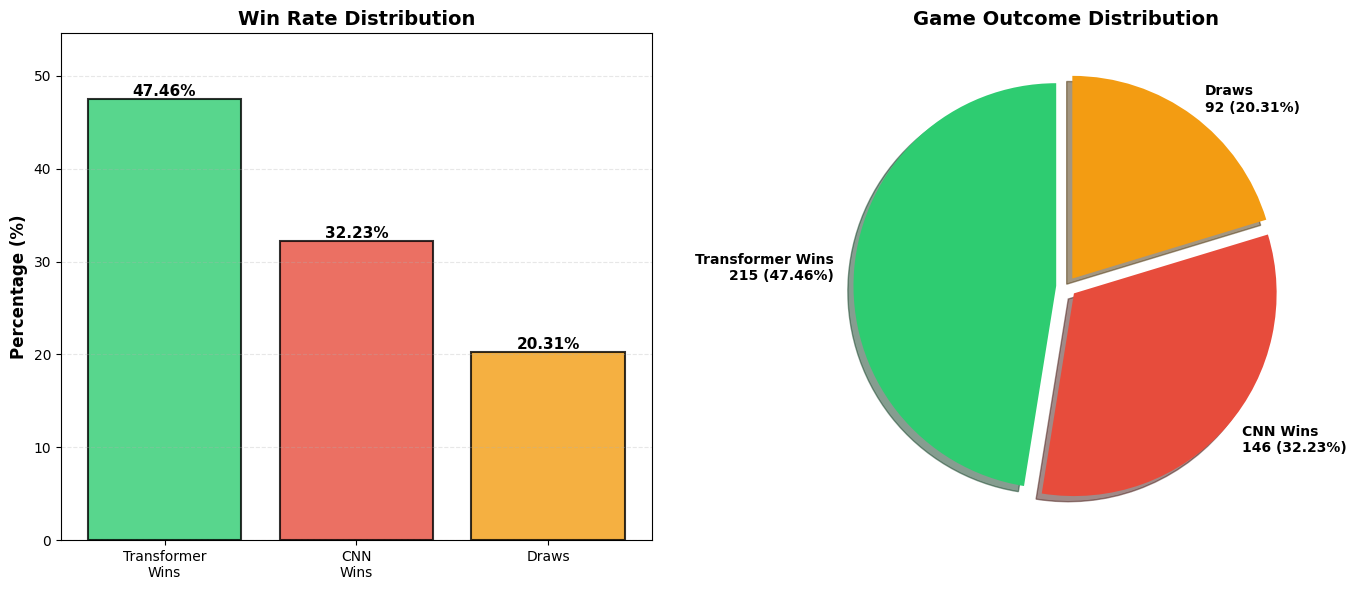


Win rates (excluding draws):
  AuraChessTransformer: 215/361 (59.56%)
  AuraChessCNN: 146/361 (40.44%)

Win rates (including draws):
  AuraChessTransformer: 215/453 (47.46%)
  AuraChessCNN: 146/453 (32.23%)
  Draws: 92/453 (20.31%)


In [16]:
# Section 2: Reproduce the Paradox

# Plot the win rate of the transformer and the CNN and the draw rate

# Calculate win percentages
total_games = len(games_df)
transformer_wins = len(games_df[games_df['winner'] == 'AuraChessTransformer'])
cnn_wins = len(games_df[games_df['winner'] == 'AuraChessCNN'])
draws = len(games_df[games_df['winner'] == 'Draw'])

# Calculate percentages
transformer_win_pct = 100 * transformer_wins / total_games
cnn_win_pct = 100 * cnn_wins / total_games
draw_pct = 100 * draws / total_games

# Print the percentages
print("=" * 60)
print("WIN RATE ANALYSIS")
print("=" * 60)
print(f"\nTotal games: {total_games}")
print(f"\nAuraChessTransformer wins: {transformer_wins} ({transformer_win_pct:.2f}%)")
print(f"AuraChessCNN wins: {cnn_wins} ({cnn_win_pct:.2f}%)")
print(f"Draws: {draws} ({draw_pct:.2f}%)")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
categories = ['Transformer\nWins', 'CNN\nWins', 'Draws']
percentages = [transformer_win_pct, cnn_win_pct, draw_pct]
colors = ['#2ecc71', '#e74c3c', '#f39c12']

bars = ax1.bar(categories, percentages, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax1.set_title('Win Rate Distribution', fontsize=14, fontweight='bold')
ax1.set_ylim(0, max(percentages) * 1.15)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{pct:.2f}%',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
sizes = [transformer_wins, cnn_wins, draws]
labels = [f'Transformer Wins\n{transformer_wins} ({transformer_win_pct:.2f}%)',
          f'CNN Wins\n{cnn_wins} ({cnn_win_pct:.2f}%)',
          f'Draws\n{draws} ({draw_pct:.2f}%)']
explode = (0.05, 0.05, 0.05)  # Slight separation

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='',
        shadow=True, startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax2.set_title('Game Outcome Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Win rates excluding draws
if transformer_wins + cnn_wins > 0:
    print(f"\nWin rates (excluding draws):")
    print(f"  AuraChessTransformer: {transformer_wins}/{transformer_wins + cnn_wins} ({100*transformer_wins/(transformer_wins + cnn_wins):.2f}%)")
    print(f"  AuraChessCNN: {cnn_wins}/{transformer_wins + cnn_wins} ({100*cnn_wins/(transformer_wins + cnn_wins):.2f}%)")

# Win rates including draws
print(f"\nWin rates (including draws):")
print(f"  AuraChessTransformer: {transformer_wins}/{total_games} ({transformer_win_pct:.2f}%)")
print(f"  AuraChessCNN: {cnn_wins}/{total_games} ({cnn_win_pct:.2f}%)")
print(f"  Draws: {draws}/{total_games} ({draw_pct:.2f}%)")



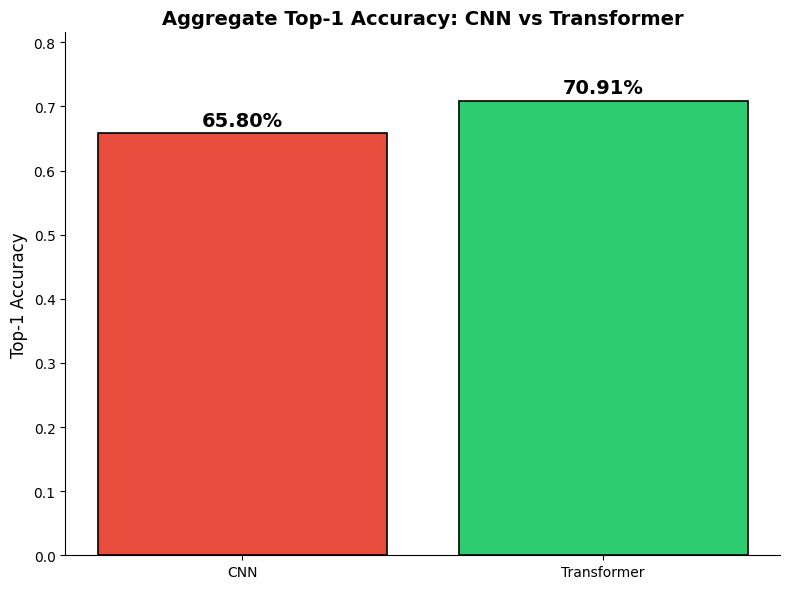

CNN Top-1 Accuracy: 0.6580
Transformer Top-1 Accuracy: 0.7091

Paradox: CNN >= Transformer in aggregate (or ties)


In [17]:

#ask about the preprocessing for the data (lke extracting the ground truth move)

# Compute Top-1 accuracy for CNN and Transformer
cnn_top1_acc = puzzles_df['cnn_first_move_correct'].mean()
tr_top1_acc = puzzles_df['transformer_first_move_correct'].mean()


# Create comparison bar plot showing aggregate accuracies
fig, ax = plt.subplots(figsize=(8, 6))

models = ['CNN', 'Transformer']
accuracies = [cnn_top1_acc, tr_top1_acc]
colors = ['#e74c3c','#2ecc71']

bars = ax.bar(models, accuracies, color=colors, edgecolor='black', linewidth=1.2)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
            f'{acc:.2%}', ha='center', va='bottom', fontsize=14, fontweight='bold')

# Formatting
ax.set_ylabel('Top-1 Accuracy', fontsize=12)
ax.set_title('Aggregate Top-1 Accuracy: CNN vs Transformer', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(accuracies) * 1.15)  # Add space for labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

#Display the paradox
print(f"CNN Top-1 Accuracy: {cnn_top1_acc:.4f}")
print(f"Transformer Top-1 Accuracy: {tr_top1_acc:.4f}")
print("\nParadox: CNN >= Transformer in aggregate (or ties)")


## Data Cleaning and Filling

In [18]:
#check for missing values

#check in games dataset
missing=False
for col in games_df.columns:
    missing_values = games_df[col].isnull().sum()
    if missing_values > 0:
        print(f"Column '{col}' has {missing_values} missing values.")
        missing=True

if missing:
    print("Missing values found in the games dataset.")
else:
    print("No missing values found in the games dataset.")


#check in puzzles dataset
missing=False
for col in puzzles_df.columns:
    missing_values = puzzles_df[col].isnull().sum()
    if missing_values > 0:
        print(f"Column '{col}' has {missing_values} missing values.")
        missing=True

if missing:
    print("Missing values found in the puzzles dataset.")
else:
    print("No missing values found in the puzzles dataset.")




#Handle missing values in critical columns, after inspecting the data we relised taht missing values 
# in this column indicate a later step in the game, making it its own category
puzzles_df['OpeningTags'] = puzzles_df['OpeningTags'].fillna('unknown_opening')




# Check for duplicate game id
dup_mask = games_df['game_id'].duplicated(keep=False) 
n_dup_rows = dup_mask.sum()
n_dup_ids = games_df.loc[dup_mask, 'game_id'].nunique()


if n_dup_ids == 0:
    print("No duplicate Game ID found.")
else:
    print(f"Rows with duplicated Game ID: {n_dup_rows:,}")
    print(f"Unique Game ID values that are duplicated: {n_dup_ids:,}")

# Check for duplicate PuzzleId values
dup_mask = puzzles_df['PuzzleId'].duplicated(keep=False) 
n_dup_rows = dup_mask.sum()
n_dup_ids = puzzles_df.loc[dup_mask, 'PuzzleId'].nunique()


if n_dup_ids == 0:
    print("No duplicate PuzzleId values found.")
else:
    print(f"Rows with duplicated PuzzleId: {n_dup_rows:,}")
    print(f"Unique PuzzleId values that are duplicated: {n_dup_ids:,}")


No missing values found in the games dataset.
Column 'OpeningTags' has 4471771 missing values.
Missing values found in the puzzles dataset.
No duplicate Game ID found.
No duplicate PuzzleId values found.


## Boxplots and Outlier Handling


Summary statistics for numeric columns:


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Rating,5600086.0,1483.663988,546.514349,399.0,462.0,663.0,1054.0,1435.0,1890.0,2438.0,2727.0,3395.0
RatingDeviation,5600086.0,87.110992,27.581030,45.0,74.0,74.0,76.0,78.0,88.0,119.0,209.0,500.0
Popularity,5600086.0,86.152684,14.267439,-83.0,25.0,58.0,83.0,90.0,94.0,100.0,100.0,100.0
NbPlays,5600086.0,1650.867153,4485.639812,0.0,8.0,24.0,107.0,350.0,1221.0,8222.0,21030.0,312554.0
num_moves,5600086.0,2.322185,0.925840,1.0,1.0,1.0,2.0,2.0,3.0,4.0,5.0,17.0


count    453.000000
mean      44.951435
std       13.953219
min       12.000000
1%        20.000000
5%        25.000000
25%       34.000000
50%       45.000000
75%       54.000000
95%       70.000000
99%       78.480000
max       87.000000
Name: num_moves, dtype: float64

--- Visualizing Puzzles Dataset ---


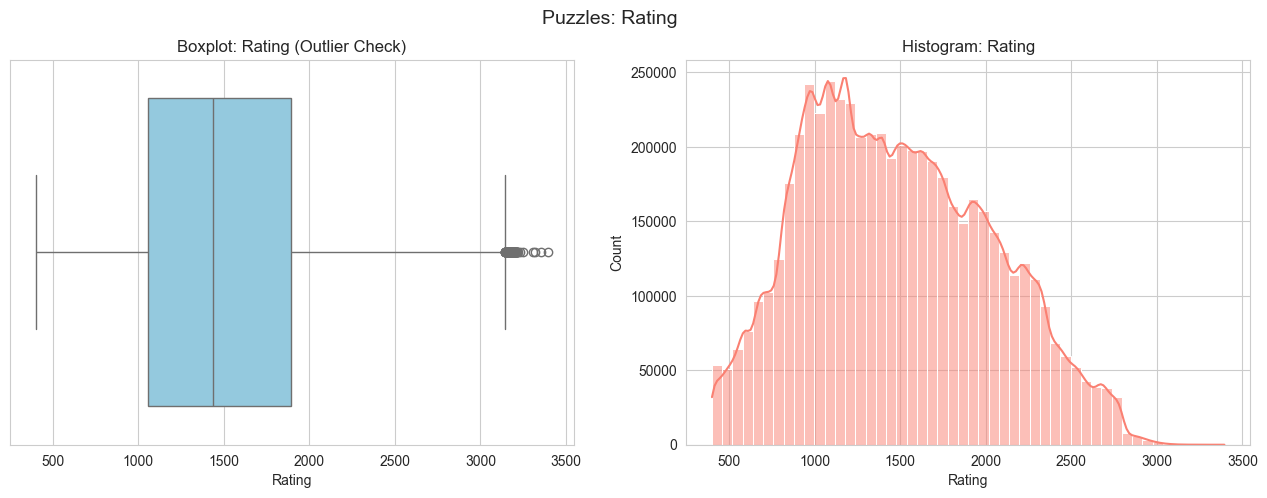

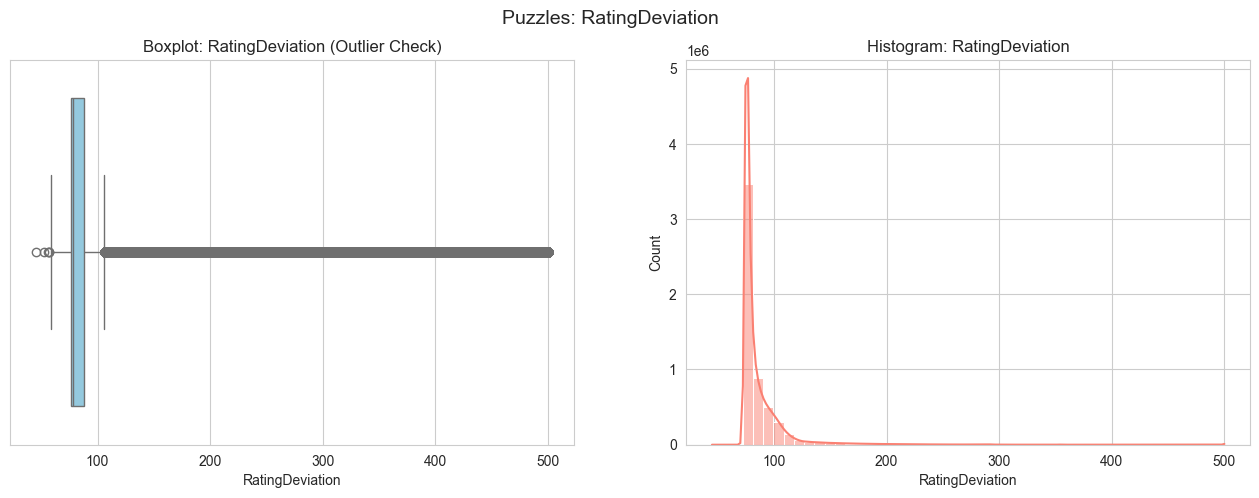

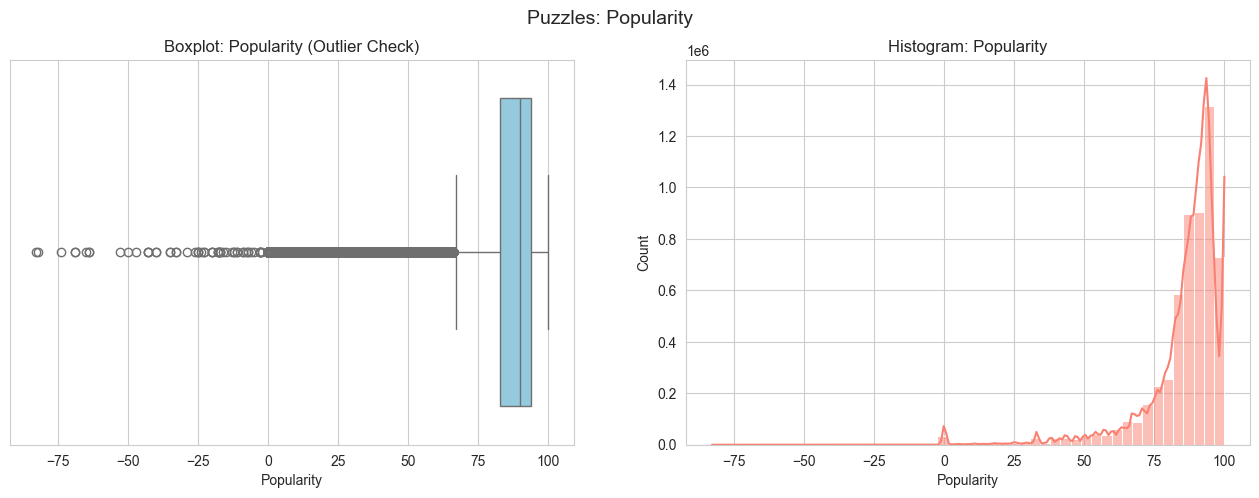

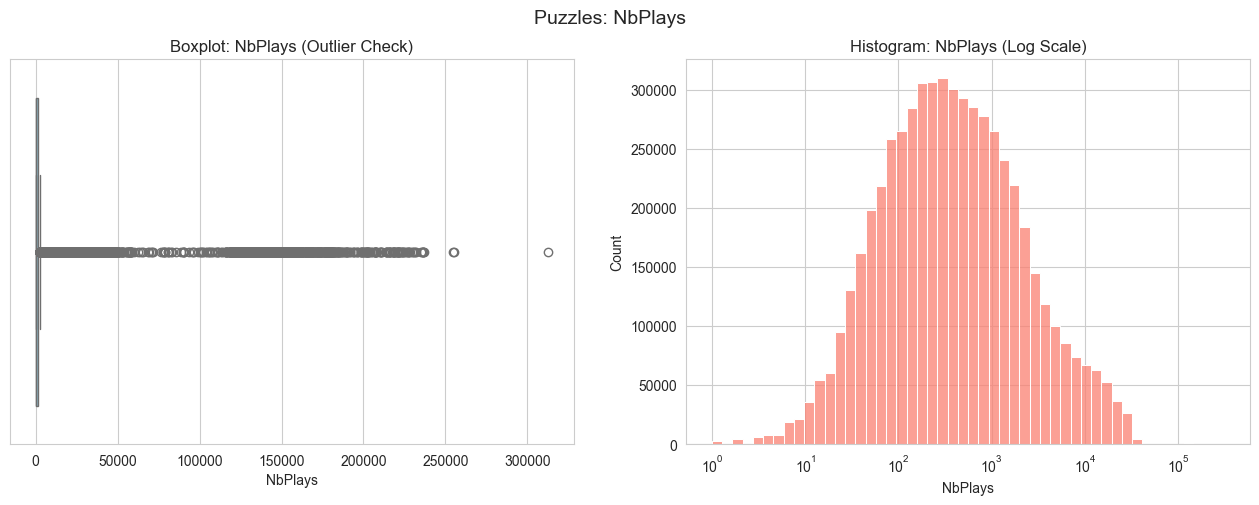

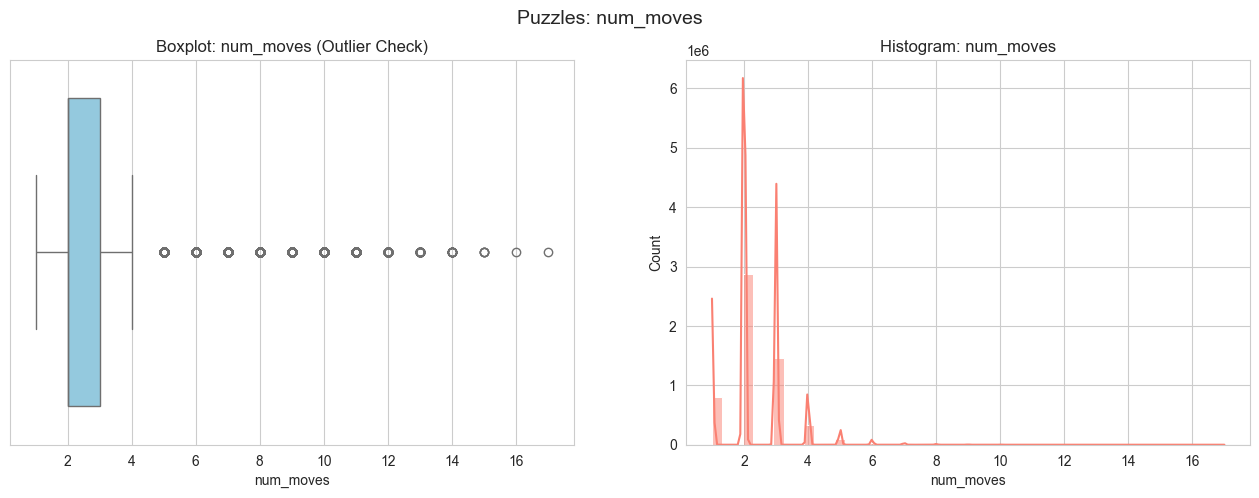


--- Visualizing Games Dataset ---


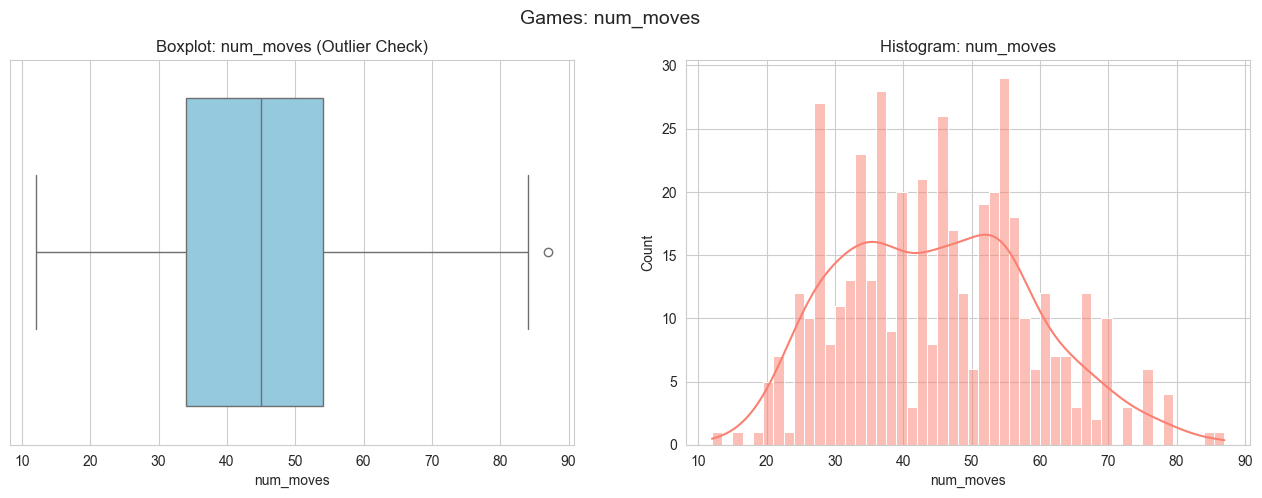

In [19]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['Rating', 'RatingDeviation', 'Popularity', 'NbPlays', 'num_moves']

# --- 1) Basic sanity checks ---
print("Summary statistics for numeric columns:")
display(puzzles_df[cols].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T)
display(games_df['num_moves'].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T)

def visualize_outliers(df, columns, dataset_name):
    """
    Plots a Boxplot (left) and Histogram (right) for each column.
    """
    sns.set_style("whitegrid")
    
    for col in columns:
        fig, axes = plt.subplots(1, 2, figsize=(16, 5))
        
        # --- Plot 1: Boxplot (Horizontal) ---
        sns.boxplot(x=df[col], ax=axes[0], color='skyblue')
        axes[0].set_title(f'Boxplot: {col} (Outlier Check)')
        
        # --- Plot 2: Histogram ---
        # We use a log scale for the histogram if the data is massive (like NbPlays)
        # This allows you to actually SEE the distribution instead of just one bar.
        if df[col].max() > 10000 and df[col].min() >= 0:
            sns.histplot(df[col], ax=axes[1], color='salmon', bins=50, log_scale=True)
            axes[1].set_title(f'Histogram: {col} (Log Scale)')
        else:
            sns.histplot(df[col], ax=axes[1], color='salmon', bins=50, kde=True)
            axes[1].set_title(f'Histogram: {col}')
            
        plt.suptitle(f'{dataset_name}: {col}', fontsize=14)
        plt.show()

# --- EXECUTE VISUALIZATION ---

# 1. Visualize Puzzles
print("--- Visualizing Puzzles Dataset ---")
visualize_outliers(puzzles_df, ['Rating', 'RatingDeviation', 'Popularity', 'NbPlays', 'num_moves'], "Puzzles")

# 2. Visualize Games
print("\n--- Visualizing Games Dataset ---")
visualize_outliers(games_df, ['num_moves'], "Games")


--- CUTOFF ANALYSIS: NbPlays (Removing Low Counts) ---
Cut < 5 plays:  Drops 23580 rows (0.4%)
Cut < 10 plays:  Drops 71762 rows (1.3%)
Cut < 20 plays:  Drops 206205 rows (3.7%)
Cut < 50 plays:  Drops 687941 rows (12.3%)
Cut < 100 plays:  Drops 1327211 rows (23.7%)

--- CUTOFF ANALYSIS: RatingDeviation (Removing Unstable Ratings) ---
Cut > 100 dev:    Drops 695541 rows (12.4%)
Cut > 90 dev:    Drops 1235065 rows (22.1%)
Cut > 85 dev:    Drops 1638123 rows (29.3%)
Cut > 80 dev:    Drops 2298734 rows (41.0%)
Cut > 75 dev:    Drops 4436659 rows (79.2%)


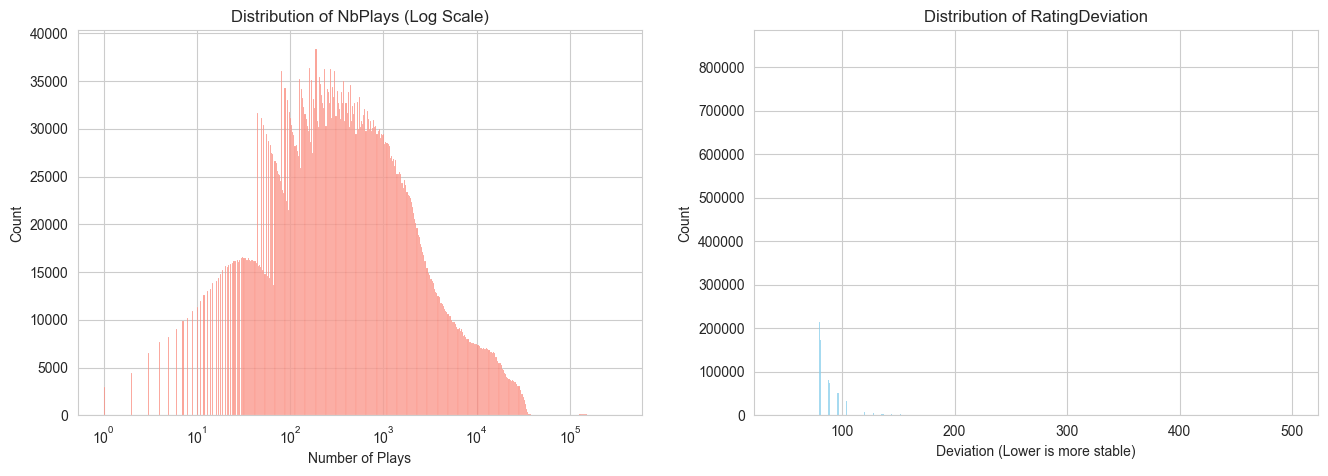

In [20]:


def suggest_cutoffs(df):
    """
    Plots histograms and prints percentiles to help choose cutoffs.
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # --- 1. Analyze NbPlays (Low is bad) ---
    sns.histplot(df['NbPlays'], ax=axes[0], color='salmon', log_scale=True)
    axes[0].set_title('Distribution of NbPlays (Log Scale)')
    axes[0].set_xlabel('Number of Plays')
    
    # Calculate "Low Count" candidates
    print("--- CUTOFF ANALYSIS: NbPlays (Removing Low Counts) ---")
    for p in [5, 10, 20, 50, 100]:
        count = len(df[df['NbPlays'] < p])
        print(f"Cut < {p} plays:  Drops {count} rows ({count/len(df):.1%})")
        
    # --- 2. Analyze RatingDeviation (High is bad) ---
    sns.histplot(df['RatingDeviation'], ax=axes[1], color='skyblue')
    axes[1].set_title('Distribution of RatingDeviation')
    axes[1].set_xlabel('Deviation (Lower is more stable)')
    
    # Calculate "High Deviation" candidates
    print("\n--- CUTOFF ANALYSIS: RatingDeviation (Removing Unstable Ratings) ---")
    for d in [100, 90, 85, 80, 75]:
        count = len(df[df['RatingDeviation'] > d])
        print(f"Cut > {d} dev:    Drops {count} rows ({count/len(df):.1%})")

    plt.show()

# Run the analysis
suggest_cutoffs(puzzles_df)

In [21]:
# --- MANUAL THRESHOLDS (We decided the according to the histograms as boxplots were too extreme and classified too many outliers which is not suitable for our dataset) ---

# 1. Puzzles: NbPlays (The "Viral" Cut-off)
# Look at the histogram. Where does the "main body" end and the "long tail" begin?
MAX_PLAYS = 412554    # Example: Delete puzzles with > 50k plays
MIN_PLAYS = 5        # Keep as 0 unless you see weird negatives

# 2. Puzzles: Rating (The "Difficulty" Cut-off)
# Chess ratings usually stay between 600 and 3000.
MIN_RATINGDIV= 0
MAX_RATINGDIV = 400

# 3. Puzzles: Popularity (Usually -100 to +100)
#MIN_POP = -100
#MAX_POP = 100

# 4. Games: Length (The "Real Game" Cut-off)
# Games < 10 moves are usually aborted. Games > 200 are rare marathons.
#MIN_MOVES = 10
#MAX_MOVES = 200

# -----------------------------------------------

def apply_manual_thresholds(df, col, min_val, max_val):
    """
    Keeps only the rows where df[col] is between min_val and max_val.
    Prints how many rows were dropped.
    """
    initial = len(df)
    
    # The Filter
    clean_df = df[(df[col] >= min_val) & (df[col] <= max_val)]
    
    dropped = initial - len(clean_df)
    print(f"[{col}] Filter ({min_val} to {max_val}): Dropped {dropped} rows ({dropped/initial:.2%})")
    
    return clean_df

# --- EXECUTE FILTERS ---

print("--- Applying Manual Filters to Puzzles ---")
puzzles_df = apply_manual_thresholds(puzzles_df, 'NbPlays', MIN_PLAYS, MAX_PLAYS)
puzzles_df = apply_manual_thresholds(puzzles_df, 'RatingDeviation', MIN_RATINGDIV, MAX_RATINGDIV)
#   puzzles_df = apply_manual_thresholds(puzzles_df, 'Popularity', MIN_POP, MAX_POP)

# print("\n--- Applying Manual Filters to Games ---")
# games_df = apply_manual_thresholds(games_df, 'num_moves', MIN_MOVES, MAX_MOVES)

--- Applying Manual Filters to Puzzles ---
[NbPlays] Filter (5 to 412554): Dropped 23580 rows (0.42%)
[RatingDeviation] Filter (0 to 400): Dropped 1812 rows (0.03%)


## check accuracy after removing outliers

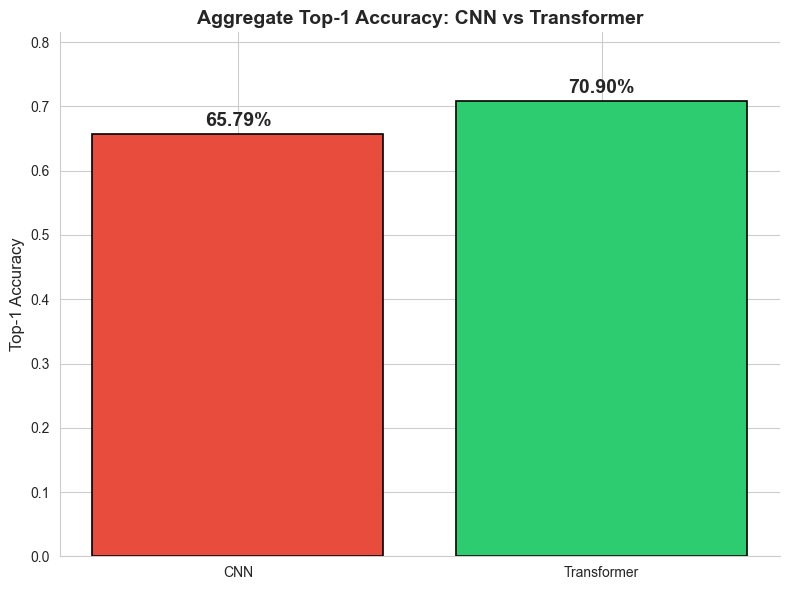

CNN Top-1 Accuracy: 0.6579
Transformer Top-1 Accuracy: 0.7090

Paradox: CNN >= Transformer in aggregate (or ties)


In [22]:

#ask about the preprocessing for the data (lke extracting the ground truth move)

# Compute Top-1 accuracy for CNN and Transformer
cnn_top1_acc = puzzles_df['cnn_first_move_correct'].mean()
tr_top1_acc = puzzles_df['transformer_first_move_correct'].mean()


# Create comparison bar plot showing aggregate accuracies
fig, ax = plt.subplots(figsize=(8, 6))

models = ['CNN', 'Transformer']
accuracies = [cnn_top1_acc, tr_top1_acc]
colors = ['#e74c3c','#2ecc71']

bars = ax.bar(models, accuracies, color=colors, edgecolor='black', linewidth=1.2)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
            f'{acc:.2%}', ha='center', va='bottom', fontsize=14, fontweight='bold')

# Formatting
ax.set_ylabel('Top-1 Accuracy', fontsize=12)
ax.set_title('Aggregate Top-1 Accuracy: CNN vs Transformer', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(accuracies) * 1.15)  # Add space for labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

#Display the paradox
print(f"CNN Top-1 Accuracy: {cnn_top1_acc:.4f}")
print(f"Transformer Top-1 Accuracy: {tr_top1_acc:.4f}")
print("\nParadox: CNN >= Transformer in aggregate (or ties)")


## Data Analysis

## statistical check

In [23]:
# import numpy as np

# # Number of iterations
# n_iterations = 1000
# n_size = int(len(puzzles_df) * 0.1) # Sample 10% for speed (or more if you have time)

# gaps = []

# print(f"Running {n_iterations} bootstrap iterations...")

# for i in range(n_iterations):
#     # Resample with replacement
#     sample = puzzles_df.sample(n=n_size, replace=True)
    
#     # Calculate Gap
#     gap = sample['transformer_first_move_correct'].mean() - sample['cnn_first_move_correct'].mean()
#     gaps.append(gap)

# # Calculate Confidence Intervals
# lower = np.percentile(gaps, 2.5)
# upper = np.percentile(gaps, 97.5)
# mean_gap = np.mean(gaps)

# print(f"\n--- Statistical Significance Analysis ---")
# print(f"Mean Gap: {mean_gap:.4f}")
# print(f"95% Confidence Interval: [{lower:.4f}, {upper:.4f}]")

# # Plot Distribution
# plt.figure(figsize=(8, 5))
# sns.histplot(gaps, kde=True, color='green')
# plt.axvline(0, color='red', linestyle='--', label='Zero Difference')
# plt.title('Bootstrap Distribution of the Accuracy Gap')
# plt.xlabel('Accuracy Gap (Transformer - CNN)')
# plt.legend()
# plt.show()

# if lower > 0:
#     print("RESULT: The difference is Statistically Significant (Interval does not contain 0).")
# else:
#     print("RESULT: The difference might be noise.")

In [24]:
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar

cnn = puzzles_df["cnn_first_move_correct"].astype(bool).to_numpy()
tr  = puzzles_df["transformer_first_move_correct"].astype(bool).to_numpy()

b = int(np.sum(cnn & ~tr))  # CNN only
c = int(np.sum(~cnn & tr))  # TR only

table = [[0, b],
         [c, 0]]

res = mcnemar(table, exact=False, correction=True)  # chi-square approx with continuity correction
print("b (cnn_only):", b, "c (tr_only):", c)
print("statistic:", res.statistic, "p-value:", res.pvalue)


b (cnn_only): 342308 c (tr_only): 627434
statistic: 83832.88093637276 p-value: 0.0


Mean Gap: 0.051147
95% CI: [0.050795, 0.051502]


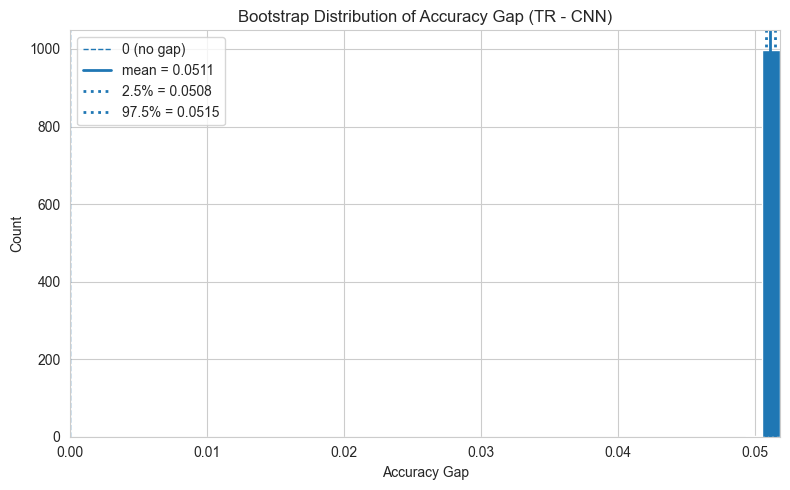

In [25]:
import numpy as np
import matplotlib.pyplot as plt

n_iterations = 1000
rng = np.random.default_rng(0)

# Use float64 for a bit more numeric stability
tr = puzzles_df["transformer_first_move_correct"].to_numpy(dtype=np.float64)
cnn = puzzles_df["cnn_first_move_correct"].to_numpy(dtype=np.float64)

N = len(tr)
gaps = np.empty(n_iterations, dtype=np.float64)

for i in range(n_iterations):
    idx = rng.integers(0, N, size=N)
    gaps[i] = tr[idx].mean() - cnn[idx].mean()

lower, upper = np.percentile(gaps, [2.5, 97.5])
mean_gap = gaps.mean()

print(f"Mean Gap: {mean_gap:.6f}")
print(f"95% CI: [{lower:.6f}, {upper:.6f}]")

# ---- FIXED PLOT ----
pad = (upper - lower) * 0.5  # padding around CI
x_min = min(0, lower - pad)  # include 0 for reference
x_max = upper + pad

plt.figure(figsize=(8, 5))
plt.hist(gaps, bins=40, range=(x_min, x_max))
plt.axvline(0, linestyle="--", linewidth=1, label="0 (no gap)")
plt.axvline(mean_gap, linewidth=2, label=f"mean = {mean_gap:.4f}")
plt.axvline(lower, linestyle=":", linewidth=2, label=f"2.5% = {lower:.4f}")
plt.axvline(upper, linestyle=":", linewidth=2, label=f"97.5% = {upper:.4f}")

plt.title("Bootstrap Distribution of Accuracy Gap (TR - CNN)")
plt.xlabel("Accuracy Gap")
plt.ylabel("Count")
plt.xlim(x_min, x_max)
plt.legend()
plt.tight_layout()
plt.show()


## New Direction: 
Which position features and tactical themes explain the performance differences between Transformers and CNNs on first-move puzzle prediction, and why do these differences translate into much higher win rates in head-to-head match play?

## Understanding the Data

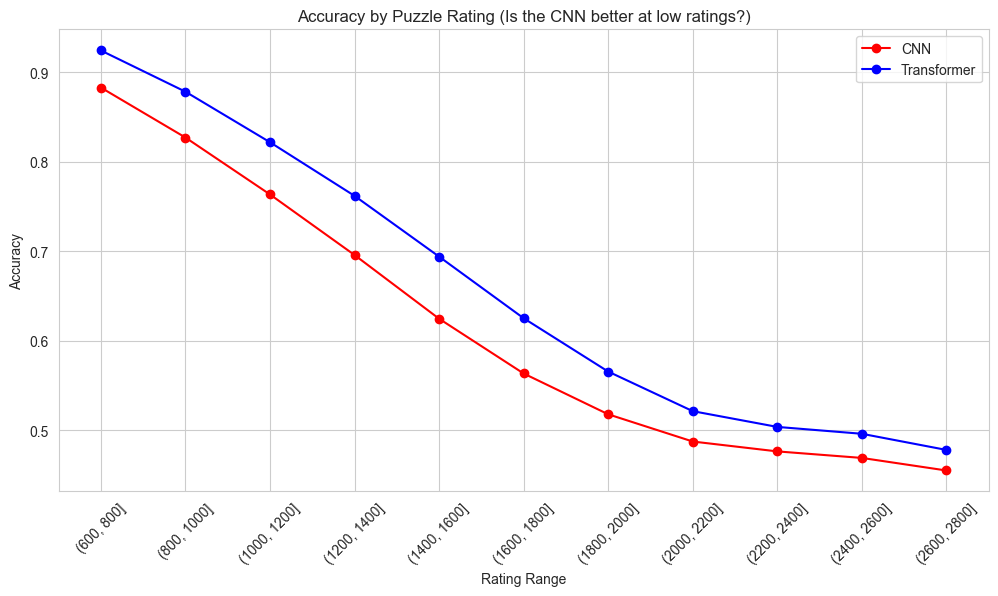

Gap by Rating:


,rating_bin,cnn_first_move_correct,transformer_first_move_correct,Gap (Trans - CNN)
0,"(600, 800]",0.882707,0.924155,0.041448
1,"(800, 1000]",0.826912,0.878108,0.051195
2,"(1000, 1200]",0.763325,0.821651,0.058326
3,"(1200, 1400]",0.695675,0.761765,0.066089
4,"(1400, 1600]",0.624514,0.693874,0.069361
5,"(1600, 1800]",0.563336,0.625068,0.061731
6,"(1800, 2000]",0.517771,0.565481,0.047711
7,"(2000, 2200]",0.487348,0.521272,0.033924
8,"(2200, 2400]",0.476322,0.503671,0.027349
9,"(2400, 2600]",0.469024,0.495999,0.026975


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create Rating Bins (e.g., 600-800, 800-1000...)
# We use the raw dataframe 'df' (or whatever you named your loaded csv)
puzzles_df['rating_bin'] = pd.cut(puzzles_df['Rating'], bins=range(600, 3000, 200))

# Calculate Accuracy per Bin
# We group by the bin and calculate the mean of the boolean 'correct' columns
bin_analysis = puzzles_df.groupby('rating_bin', observed=True)[['cnn_first_move_correct', 'transformer_first_move_correct']].mean().reset_index()

# Calculate the Gap
bin_analysis['Gap (Trans - CNN)'] = bin_analysis['transformer_first_move_correct'] - bin_analysis['cnn_first_move_correct']

# Visualization
plt.figure(figsize=(12, 6))

# Plot Accuracies
plt.plot(bin_analysis['rating_bin'].astype(str), bin_analysis['cnn_first_move_correct'], marker='o', label='CNN', color='red')
plt.plot(bin_analysis['rating_bin'].astype(str), bin_analysis['transformer_first_move_correct'], marker='o', label='Transformer', color='blue')

plt.title('Accuracy by Puzzle Rating (Is the CNN better at low ratings?)')
plt.xlabel('Rating Range')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Print the table to find the smallest gap
print("Gap by Rating:")
display(bin_analysis)

--- All Themes: accuracy + gap + support ---


,n,cnn_acc,tr_acc,Gap
Theme,,,,
enPassant,7963,0.465402,0.405249,-0.060153
xRayAttack,19708,0.511823,0.501827,-0.009996
bodenMate,3267,0.647383,0.640955,-0.006428
zugzwang,57526,0.725289,0.722560,-0.002729
pawnEndgame,203656,0.710590,0.711307,0.000717
...,...,...,...,...
capturingDefender,37890,0.436157,0.513698,0.077540
pin,337772,0.535107,0.621407,0.086301
anastasiaMate,6603,0.562472,0.650613,0.088142


<Figure size 1200x600 with 0 Axes>

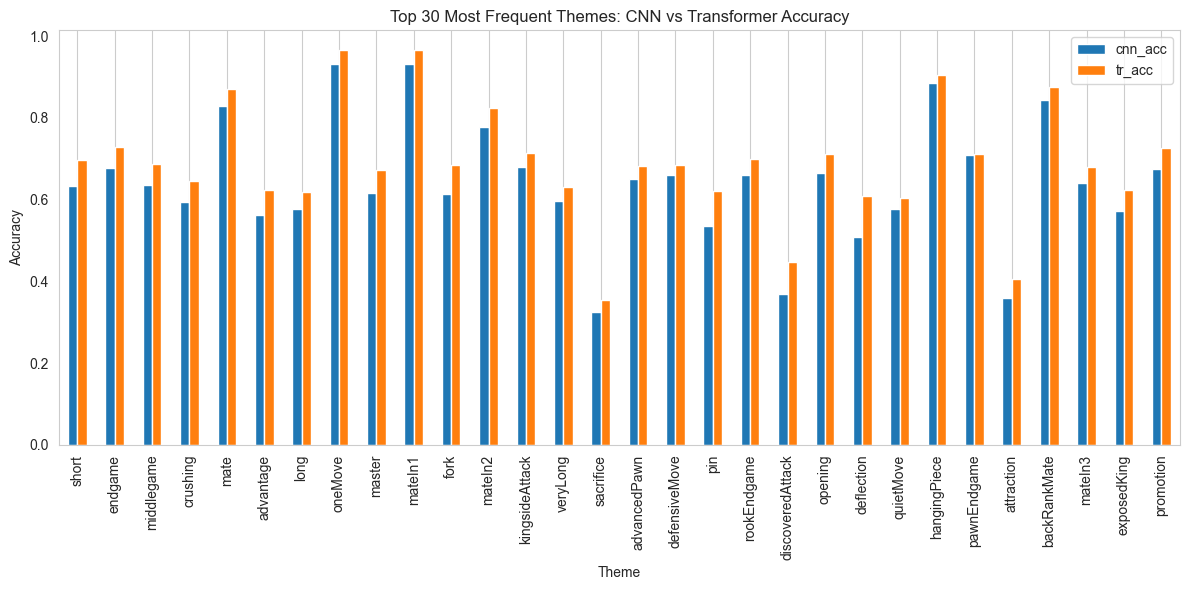

<Figure size 1200x600 with 0 Axes>

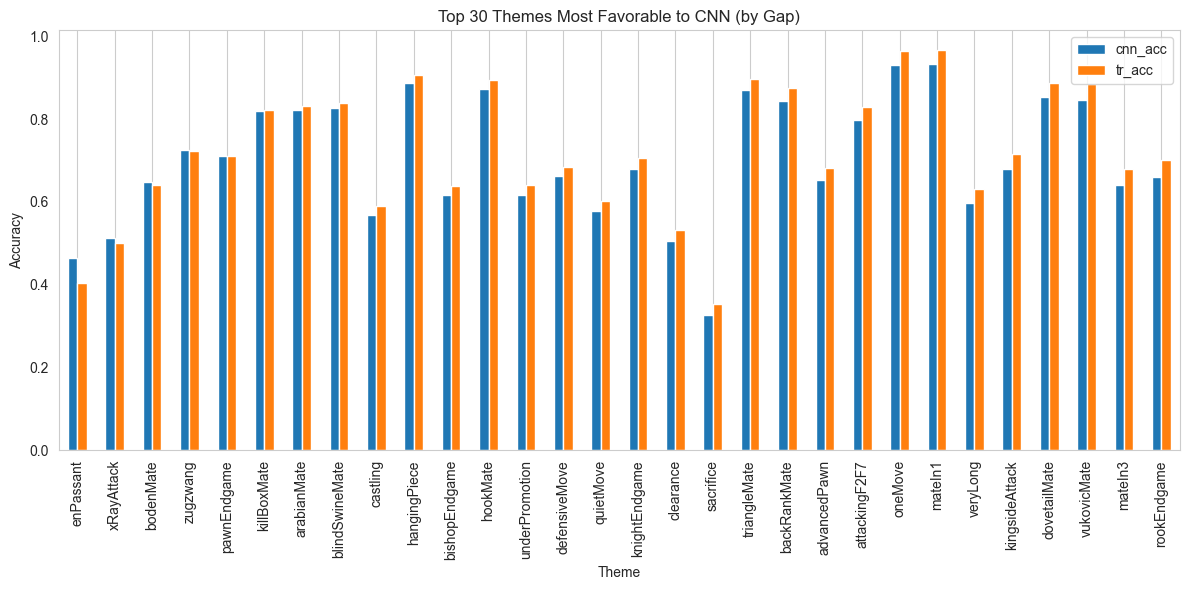

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Explode Themes (keep all themes; handle NaNs + extra spaces)
exploded = (
    puzzles_df
    .dropna(subset=["Themes"])
    .assign(Theme=puzzles_df["Themes"].astype(str).str.split())
    .explode("Theme")
)

# Remove empty tokens just in case
exploded = exploded[exploded["Theme"].notna() & exploded["Theme"].ne("")]

# 2) Accuracy + support per theme (ALL themes)
theme_stats = (
    exploded.groupby("Theme")
    .agg(
        n=("Theme", "size"),
        cnn_acc=("cnn_first_move_correct", "mean"),
        tr_acc=("transformer_first_move_correct", "mean"),
    )
)

theme_stats["Gap"] = theme_stats["tr_acc"] - theme_stats["cnn_acc"]

print("--- All Themes: accuracy + gap + support ---")
display(theme_stats.sort_values("Gap"))  # CNN-leaning at top (most negative gaps)

# Optional: save all themes table
theme_stats.to_csv("theme_stats_all.csv")

# 3) Plotting (all themes is unreadable). Plot Top-K by support or by gap.
TOP_K = 30

# Example A: most frequent themes (best for stability)
top_by_support = theme_stats.sort_values("n", ascending=False).head(TOP_K)

plt.figure(figsize=(12, 6))
top_by_support[["cnn_acc","tr_acc"]].plot(kind="bar", figsize=(12,6))
plt.title(f"Top {TOP_K} Most Frequent Themes: CNN vs Transformer Accuracy")
plt.ylabel("Accuracy")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Example B: where CNN is strongest (but avoid tiny-n noise: still show n)
top_cnn = theme_stats.sort_values("Gap").head(TOP_K)

plt.figure(figsize=(12, 6))
top_cnn[["cnn_acc","tr_acc"]].plot(kind="bar", figsize=(12,6))
plt.title(f"Top {TOP_K} Themes Most Favorable to CNN (by Gap)")
plt.ylabel("Accuracy")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


## lets take a closer look at the themes the CNN is better than the Transformer

--- Themes where CNN Outperforms Transformer ---


,cnn_first_move_correct,transformer_first_move_correct,CNN_Advantage
Theme,,,
enPassant,0.465539,0.405514,0.060025
xRayAttack,0.511499,0.501491,0.010008
bodenMate,0.647616,0.641198,0.006418
zugzwang,0.725410,0.722588,0.002823
pawnEndgame,0.710683,0.711363,-0.000680
killBoxMate,0.819151,0.822092,-0.002941
arabianMate,0.822384,0.832725,-0.010341
blindSwineMate,0.826285,0.838547,-0.012262
hangingPiece,0.886230,0.906020,-0.019790


C:\Users\yothman\AppData\Local\Temp\ipykernel_7992\1944210570.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cnn_favorites['CNN_Advantage'], y=cnn_favorites.index, palette='Reds_r')


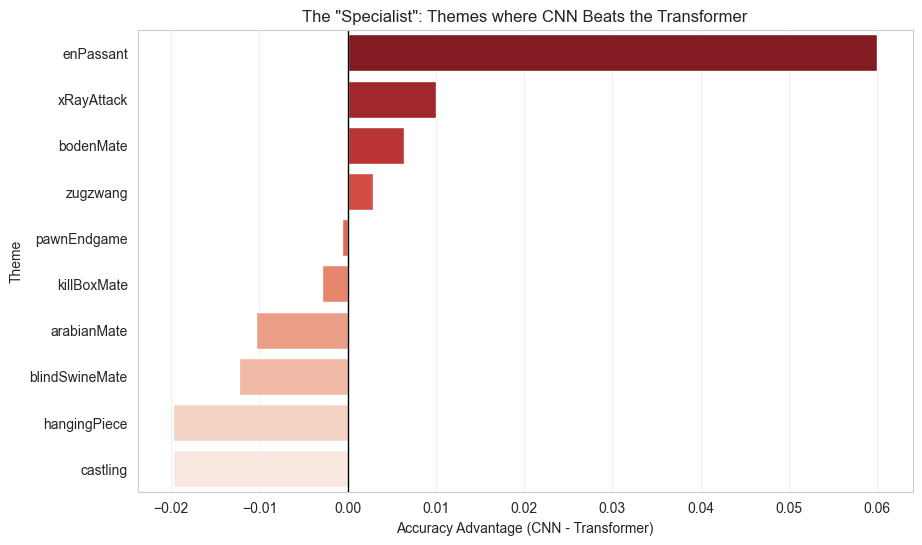


CNN 'Revenge' Count: 343786 puzzles
Avg Rating of Revenge Puzzles: 1672
Global Avg Rating: 1484


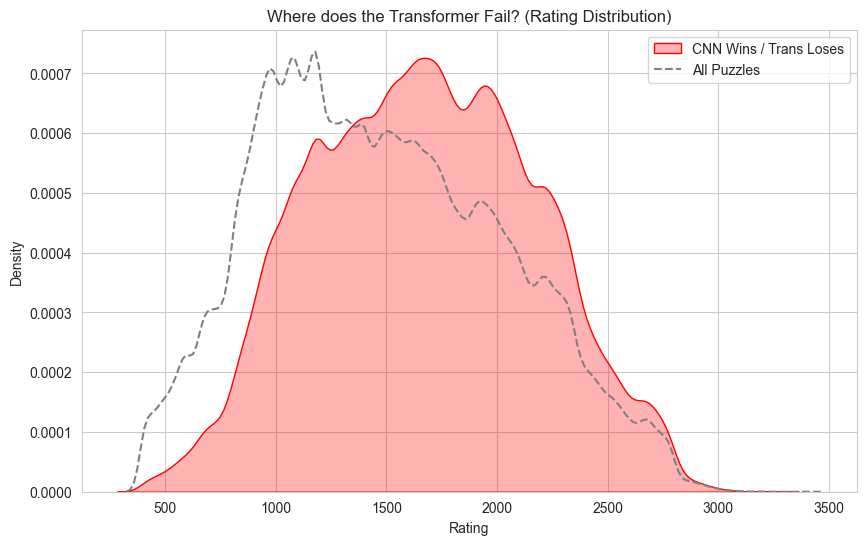

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create a copy to avoid warnings
df = raw_df.copy()

# --- 1. THEME ANALYSIS (The "Specialist" Argument) ---
# Explode themes to analyze them individually
exploded_themes = df.dropna(subset=['Themes']).assign(Theme=df['Themes'].str.split(' ')).explode('Theme')

# Filter for themes with at least 500 puzzles (to ensure statistical significance)
theme_counts = exploded_themes['Theme'].value_counts()
valid_themes = theme_counts[theme_counts > 500].index
theme_data = exploded_themes[exploded_themes['Theme'].isin(valid_themes)]

# Calculate accuracy per theme
theme_perf = theme_data.groupby('Theme')[['cnn_first_move_correct', 'transformer_first_move_correct']].mean()

# Calculate "CNN Advantage" (Positive means CNN wins)
theme_perf['CNN_Advantage'] = theme_perf['cnn_first_move_correct'] - theme_perf['transformer_first_move_correct']

# Get the top 10 themes where CNN is strongest
cnn_favorites = theme_perf.sort_values('CNN_Advantage', ascending=False).head(10)

print("--- Themes where CNN Outperforms Transformer ---")
display(cnn_favorites)

# Visualization 1: CNN's Strongest Themes
plt.figure(figsize=(10, 6))
sns.barplot(x=cnn_favorites['CNN_Advantage'], y=cnn_favorites.index, palette='Reds_r')
plt.axvline(0, color='black', linewidth=1)
plt.title('The "Specialist": Themes where CNN Beats the Transformer')
plt.xlabel('Accuracy Advantage (CNN - Transformer)')
plt.grid(axis='x', alpha=0.3)
plt.show()

# --- 2. RATING ANALYSIS (The "Complexity" Argument) ---
# Bin ratings into groups of 200
df['rating_bin'] = pd.cut(df['Rating'], bins=range(600, 3000, 200))

# Calculate accuracy per bin
rating_stats = df.groupby('rating_bin', observed=True)[['cnn_first_move_correct', 'transformer_first_move_correct']].mean()

# Visualization 2: Accuracy Curves
# plt.figure(figsize=(12, 6))
# plt.plot(rating_stats.index.astype(str), rating_stats['cnn_first_move_correct'], marker='o', label='CNN', color='red', linewidth=2)
# plt.plot(rating_stats.index.astype(str), rating_stats['transformer_first_move_correct'], marker='o', label='Transformer', color='blue', linewidth=2)

# Highlight the crossover point
# plt.title('Accuracy by Difficulty: Does CNN win on "Easy" puzzles?')
# plt.xlabel('Puzzle Rating')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.xticks(rotation=45)
# plt.show()

# --- 3. REVENGE ANALYSIS (The "Blind Spot" Argument) ---
# Isolate puzzles where CNN is RIGHT and Transformer is WRONG
revenge_df = df[(df['cnn_first_move_correct'] == 1) & (df['transformer_first_move_correct'] == 0)]

print(f"\nCNN 'Revenge' Count: {len(revenge_df)} puzzles")
print(f"Avg Rating of Revenge Puzzles: {revenge_df['Rating'].mean():.0f}")
print(f"Global Avg Rating: {df['Rating'].mean():.0f}")

# Visualization 3: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.kdeplot(revenge_df['Rating'], fill=True, color='red', label='CNN Wins / Trans Loses', alpha=0.3)
sns.kdeplot(df['Rating'], linestyle='--', color='gray', label='All Puzzles')
plt.title('Where does the Transformer Fail? (Rating Distribution)')
plt.xlabel('Rating')
plt.legend()
plt.show()

,n,cnn_acc,tr_acc,gap
puzzle_len_bin,,,,
1-2,793672,0.931904,0.965587,0.033683
3-4,2857362,0.633186,0.696611,0.063424
5-6,1460989,0.576342,0.618192,0.041850
7-10,417874,0.594430,0.629829,0.035398
11+,44797,0.627966,0.655490,0.027524


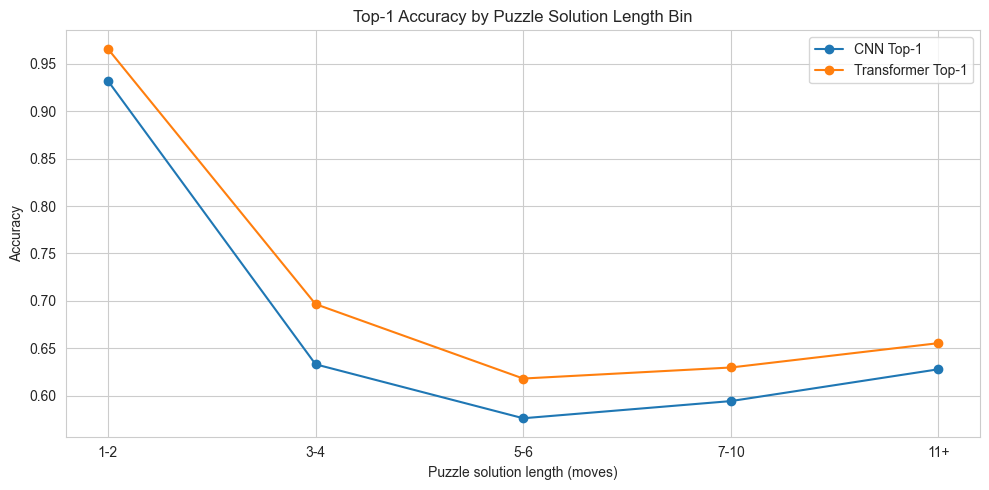

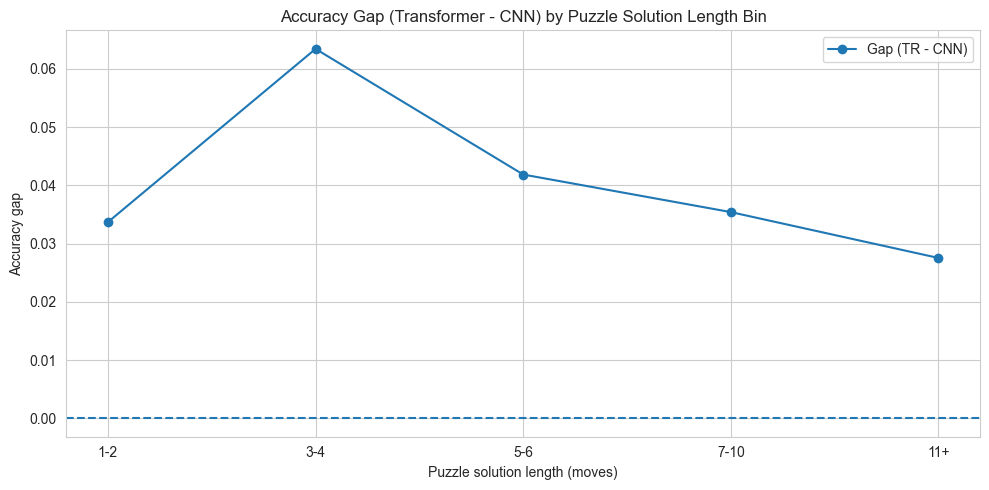

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Build/ensure puzzle solution length ---
# Uses "solution_len" if you already made it; otherwise compute from Moves
if "solution_len" not in puzzles_df.columns:
    puzzles_df["solution_len"] = puzzles_df["Moves"].fillna("").astype(str).str.split().str.len()

# Define bins (tweak as you like)
bins = [0, 2, 4, 6, 10, 1000]
labels = ["1-2", "3-4", "5-6", "7-10", "11+"]

puzzles_df["puzzle_len_bin"] = pd.cut(puzzles_df["solution_len"], bins=bins, labels=labels)

# Aggregate
puz = (puzzles_df.groupby("puzzle_len_bin", observed=True)
       .agg(n=("solution_len", "size"),
            cnn_acc=("cnn_first_move_correct", "mean"),
            tr_acc=("transformer_first_move_correct", "mean"))
       .assign(gap=lambda t: t["tr_acc"] - t["cnn_acc"]))

display(puz)

# Plot accuracies
plt.figure(figsize=(10,5))
plt.plot(puz.index.astype(str), puz["cnn_acc"], marker="o", label="CNN Top-1")
plt.plot(puz.index.astype(str), puz["tr_acc"], marker="o", label="Transformer Top-1")
plt.title("Top-1 Accuracy by Puzzle Solution Length Bin")
plt.xlabel("Puzzle solution length (moves)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot gap (TR - CNN)
plt.figure(figsize=(10,5))
plt.plot(puz.index.astype(str), puz["gap"], marker="o", label="Gap (TR - CNN)")
plt.axhline(0, linestyle="--")
plt.title("Accuracy Gap (Transformer - CNN) by Puzzle Solution Length Bin")
plt.xlabel("Puzzle solution length (moves)")
plt.ylabel("Accuracy gap")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


c:\Users\yothman\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


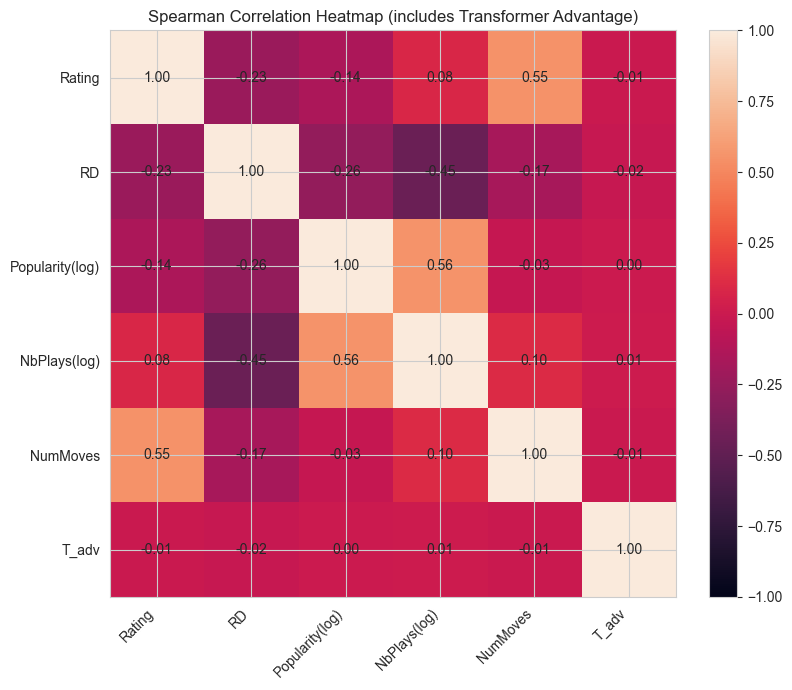

,Rating,RatingDeviation,Popularity_log,NbPlays_log,num_moves,transformer_advantage
Rating,1.000000,-0.231648,-0.144463,0.082345,0.547226,-0.007537
RatingDeviation,-0.231648,1.000000,-0.260806,-0.449407,-0.169794,-0.019784
Popularity_log,-0.144463,-0.260806,1.000000,0.555237,-0.027983,0.004074
NbPlays_log,0.082345,-0.449407,0.555237,1.000000,0.103444,0.010541
num_moves,0.547226,-0.169794,-0.027983,0.103444,1.000000,-0.006146
transformer_advantage,-0.007537,-0.019784,0.004074,0.010541,-0.006146,1.000000


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 0) Create "transformer_advantage" ---
# +1: transformer correct and cnn wrong
#  0: both same (both correct or both wrong)
# -1: transformer wrong and cnn correct
puzzles_df = puzzles_df.copy()
puzzles_df['transformer_advantage'] = (
    puzzles_df['transformer_first_move_correct'].astype(int)
    - puzzles_df['cnn_first_move_correct'].astype(int)
)

# --- 1) Select columns and build a clean numeric frame ---
base_cols = ['Rating', 'RatingDeviation', 'Popularity', 'NbPlays', 'num_moves', 'transformer_advantage']
corr_df = puzzles_df[base_cols].copy()

# log1p for heavy-tailed fields (optional; doesn't affect Spearman ranks)
corr_df['Popularity_log'] = np.log1p(corr_df['Popularity'])
corr_df['NbPlays_log'] = np.log1p(corr_df['NbPlays'])

# Use log versions instead of raw popularity/plays
use_cols = ['Rating', 'RatingDeviation', 'Popularity_log', 'NbPlays_log', 'num_moves', 'transformer_advantage']
corr_df = corr_df[use_cols].dropna()

# --- 2) Correlation (Spearman recommended here) ---
corr = corr_df.corr(method='spearman')

# --- 3) Plot heatmap (matplotlib only) ---
fig, ax = plt.subplots(figsize=(9, 7))
im = ax.imshow(corr.values, vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(use_cols)))
ax.set_yticks(np.arange(len(use_cols)))

pretty_labels = ['Rating', 'RD', 'Popularity(log)', 'NbPlays(log)', 'NumMoves', 'T_adv']
ax.set_xticklabels(pretty_labels, rotation=45, ha='right')
ax.set_yticklabels(pretty_labels)

# annotate cells
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, f"{corr.values[i, j]:.2f}", ha='center', va='center', fontsize=10)

plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.set_title("Spearman Correlation Heatmap (includes Transformer Advantage)")
plt.tight_layout()
plt.show()

corr


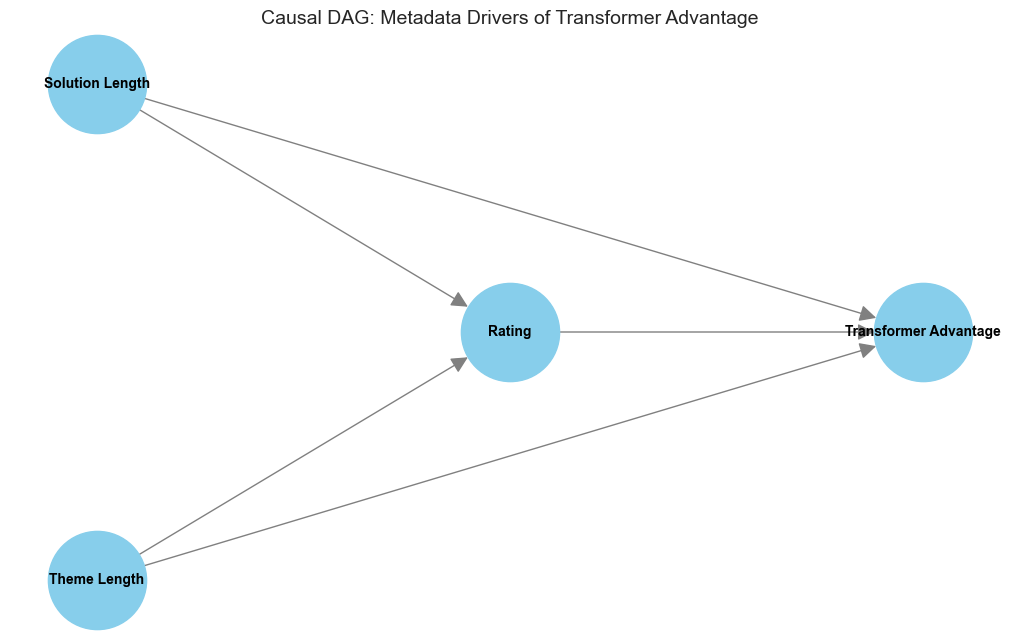

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the DAG
initial_dag = nx.DiGraph()

# Define Edges
initial_edges = [
    ("Solution Length", "Rating"),
    ("Theme Length", "Rating"),
    ("Solution Length", "Transformer Advantage"),
    ("Theme Length", "Transformer Advantage"),
    ("Rating", "Transformer Advantage")
]

initial_dag.add_edges_from(initial_edges)

# Plot
plt.figure(figsize=(10, 6))
pos = {
    "Solution Length": [0, 1],
    "Theme Length": [0, -1],
    "Rating": [2, 0],
    "Transformer Advantage": [4, 0]
}

nx.draw(initial_dag, pos, with_labels=True, node_color='skyblue', 
        node_size=5000, font_size=10, font_weight='bold', 
        arrowsize=25, edge_color='gray')

plt.title("Causal DAG: Metadata Drivers of Transformer Advantage", fontsize=14)
plt.show()

winner_class,CNN,Draw,Transformer,Total,Transformer_pct,CNN_pct,Draw_pct
game_len_bin,,,,,,,
<40,72,30,88,190,46.315789,37.894737,15.789474
40-80,73,62,126,261,48.275862,27.969349,23.754789
80-120,1,0,1,2,50.000000,50.000000,0.000000


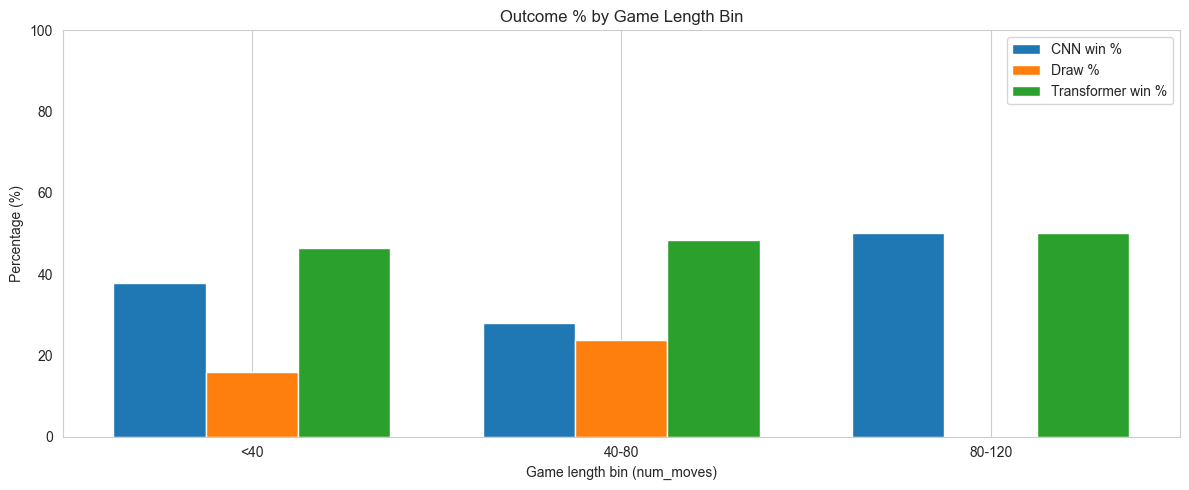

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CNN_NAME = "AuraChessCNN"
TR_NAME  = "AuraChessTransformer"

# 1) Bin game length
bins = [0, 40, 80, 120, 200, 10_000]
labels = ["<40", "40-80", "80-120", "120-200", "200+"]

games_df["game_len_bin"] = pd.cut(games_df["num_moves"], bins=bins, labels=labels)

# 2) Winner class
def winner_class(w):
    if w == TR_NAME:
        return "Transformer"
    if w == CNN_NAME:
        return "CNN"
    return "Draw"

games_df["winner_class"] = games_df["winner"].apply(winner_class)

# 3) Counts and percentages per bin
counts = (games_df.groupby(["game_len_bin", "winner_class"], observed=True)
                  .size()
                  .unstack(fill_value=0))

for col in ["Transformer", "CNN", "Draw"]:
    if col not in counts.columns:
        counts[col] = 0

counts["Total"] = counts[["Transformer", "CNN", "Draw"]].sum(axis=1)

pct = counts[["Transformer", "CNN", "Draw"]].div(counts["Total"], axis=0) * 100
display(counts.join(pct.add_suffix("_pct")))

#OPTIONAL: If you also want Draw% as a third bar:
width = 0.25
x = np.arange(len(pct))   # <-- add this line

plt.figure(figsize=(12, 5))
plt.bar(x - width, pct["CNN"].values, width, label="CNN win %")
plt.bar(x,         pct["Draw"].values, width, label="Draw %")
plt.bar(x + width, pct["Transformer"].values, width, label="Transformer win %")
plt.xticks(x, pct.index.astype(str))
plt.title("Outcome % by Game Length Bin")
plt.xlabel("Game length bin (num_moves)")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)
plt.grid(axis="y")
plt.legend()
plt.tight_layout()
plt.show()


# we want to check why in the long games the two models perform the same

# Sub-Question 2: 
"What distinct 'cognitive signatures' define the specialized expertise of each architecture?"

TR-only: 627434
CNN-only: 342308


,Theme,KL_Contribution
0,short,0.015432
9,mateIn1,0.014677
7,oneMove,0.014611
4,mate,0.012675
21,deflection,0.008793
10,fork,0.008310
1,endgame,0.006719
17,pin,0.005802
19,discoveredAttack,0.003742
11,mateIn2,0.002851


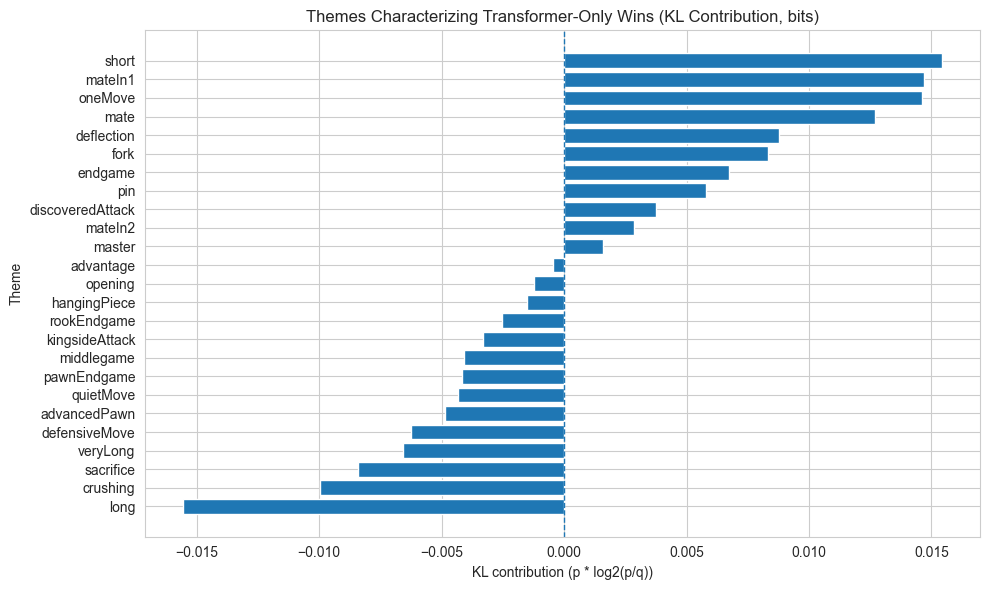

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Disagreement sets
tr_only = puzzles_df[(puzzles_df["transformer_first_move_correct"] == 1) &
                     (puzzles_df["cnn_first_move_correct"] == 0)].copy()

cnn_only = puzzles_df[(puzzles_df["cnn_first_move_correct"] == 1) &
                      (puzzles_df["transformer_first_move_correct"] == 0)].copy()

print("TR-only:", len(tr_only))
print("CNN-only:", len(cnn_only))

def theme_counts(df):
    s = df["Themes"].fillna("").astype(str).str.split()
    exploded = s.explode()
    exploded = exploded[exploded.ne("")]  # remove empties
    return exploded.value_counts()

# Vocabulary: top K themes overall (or use all themes)
K = 25
all_top = theme_counts(puzzles_df).head(K).index

dist_tr  = theme_counts(tr_only).reindex(all_top).fillna(0)
dist_cnn = theme_counts(cnn_only).reindex(all_top).fillna(0)

# Proper epsilon smoothing
eps = 1e-9
p = (dist_tr  + eps) / (dist_tr  + eps).sum()
q = (dist_cnn + eps) / (dist_cnn + eps).sum()

# KL contributions (in bits)
kl_contrib = p * np.log2(p / q)

kl_df = (pd.DataFrame({"Theme": all_top, "KL_Contribution": kl_contrib.values})
           .sort_values("KL_Contribution", ascending=False))

display(kl_df.head(25))

# Plot (horizontal bars)
plt.figure(figsize=(10, 6))
plt.barh(kl_df["Theme"][::-1], kl_df["KL_Contribution"][::-1])
plt.axvline(0, linestyle="--", linewidth=1)
plt.title("Themes Characterizing Transformer-Only Wins (KL Contribution, bits)")
plt.xlabel("KL contribution (p * log2(p/q))")
plt.ylabel("Theme")
plt.tight_layout()
plt.show()


In [34]:
pd.set_option('display.max_rows', 100)
display(kl_df)

,Theme,KL_Contribution
0,short,0.015432
9,mateIn1,0.014677
7,oneMove,0.014611
4,mate,0.012675
21,deflection,0.008793
10,fork,0.008310
1,endgame,0.006719
17,pin,0.005802
19,discoveredAttack,0.003742
11,mateIn2,0.002851


Rating distribution (TR-only vs CNN-only)  KL(P||Q) = 0.036816 bits


,bin,P_TR_only,Q_CNN_only,support,KL_contrib_bits
1,800-1k,0.091294,0.065245,79615,0.044245
2,1k-1.2k,0.131964,0.106892,119389,0.040117
3,1.2-1.4k,0.135705,0.116968,125185,0.029090
0,<800,0.044459,0.028930,37798,0.027560
4,1.4-1.6k,0.143894,0.131277,135221,0.019051
5,1.6-1.8k,0.138662,0.143003,135952,-0.006167
9,2.6k+,0.022375,0.031545,24837,-0.011087
6,1.8-2.0k,0.112237,0.132354,115727,-0.026697
7,2.0-2.2k,0.084811,0.112492,91720,-0.034561
8,2.2-2.6k,0.094600,0.131294,104298,-0.044736


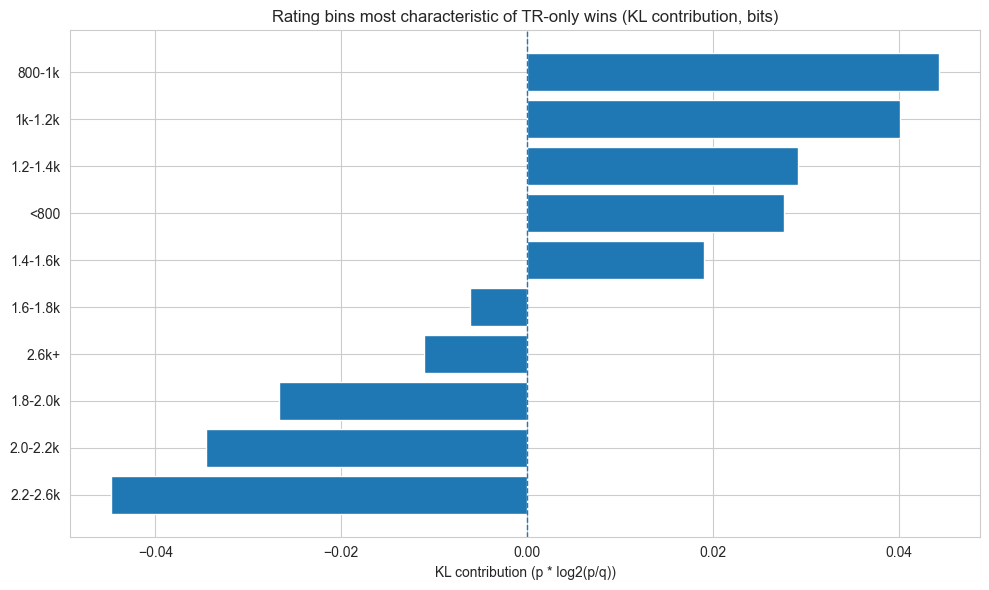

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

eps = 1e-9

# --- Disagreement sets ---
tr_only = puzzles_df[(puzzles_df["transformer_first_move_correct"] == 1) &
                     (puzzles_df["cnn_first_move_correct"] == 0)].copy()

cnn_only = puzzles_df[(puzzles_df["cnn_first_move_correct"] == 1) &
                      (puzzles_df["transformer_first_move_correct"] == 0)].copy()

def kl_binned(P_vals, Q_vals, bins, labels=None, title=""):
    # bin values
    P_bin = pd.cut(P_vals, bins=bins, labels=labels, include_lowest=True)
    Q_bin = pd.cut(Q_vals, bins=bins, labels=labels, include_lowest=True)

    # counts aligned on same bins
    p_counts = P_bin.value_counts().sort_index()
    q_counts = Q_bin.value_counts().sort_index()
    all_bins = p_counts.index.union(q_counts.index)

    p_counts = p_counts.reindex(all_bins).fillna(0)
    q_counts = q_counts.reindex(all_bins).fillna(0)

    # smoothed probabilities
    p = (p_counts + eps) / (p_counts + eps).sum()
    q = (q_counts + eps) / (q_counts + eps).sum()

    # per-bin KL contributions + total KL (in bits)
    contrib = p * np.log2(p / q)
    KL = float(contrib.sum())

    out = pd.DataFrame({
        "bin": all_bins.astype(str),
        "P_TR_only": p.values,
        "Q_CNN_only": q.values,
        "support": (p_counts + q_counts).values,
        "KL_contrib_bits": contrib.values
    }).sort_values("KL_contrib_bits", ascending=False)

    print(f"{title}  KL(P||Q) = {KL:.6f} bits")
    return out, KL

# ---- Rating bins (edit as desired) ----
rating_bins = [0, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2600, 4000]
rating_labels = ["<800","800-1k","1k-1.2k","1.2-1.4k","1.4-1.6k","1.6-1.8k","1.8-2.0k","2.0-2.2k","2.2-2.6k","2.6k+"]

rating_df, KL_rating = kl_binned(
    tr_only["Rating"], cnn_only["Rating"],
    bins=rating_bins, labels=rating_labels,
    title="Rating distribution (TR-only vs CNN-only)"
)

display(rating_df)

# plot contributions (show bins that matter most; filter tiny support if you want)
plot_df = rating_df[rating_df["support"] > 10_000].head(12).sort_values("KL_contrib_bits")

plt.figure(figsize=(10,6))
plt.barh(plot_df["bin"], plot_df["KL_contrib_bits"])
plt.axvline(0, linestyle="--", linewidth=1)
plt.title("Rating bins most characteristic of TR-only wins (KL contribution, bits)")
plt.xlabel("KL contribution (p * log2(p/q))")
plt.tight_layout()
plt.show()


Solution length distribution (TR-only vs CNN-only)  KL(P||Q) = 0.028137 bits


,bin,P_TR_only,Q_CNN_only,support,KL_contrib_bits
1,3-4,0.586916,0.546365,555276,0.060622
0,1-2,0.058223,0.028623,46329,0.059643
6,26+,0.000005,0.000009,6,-0.000004
5,16-25,0.001023,0.001376,1113,-0.000437
4,11-15,0.006256,0.008364,6788,-0.002621
3,7-10,0.074405,0.093168,78576,-0.024139
2,5-6,0.273173,0.322096,281654,-0.064927


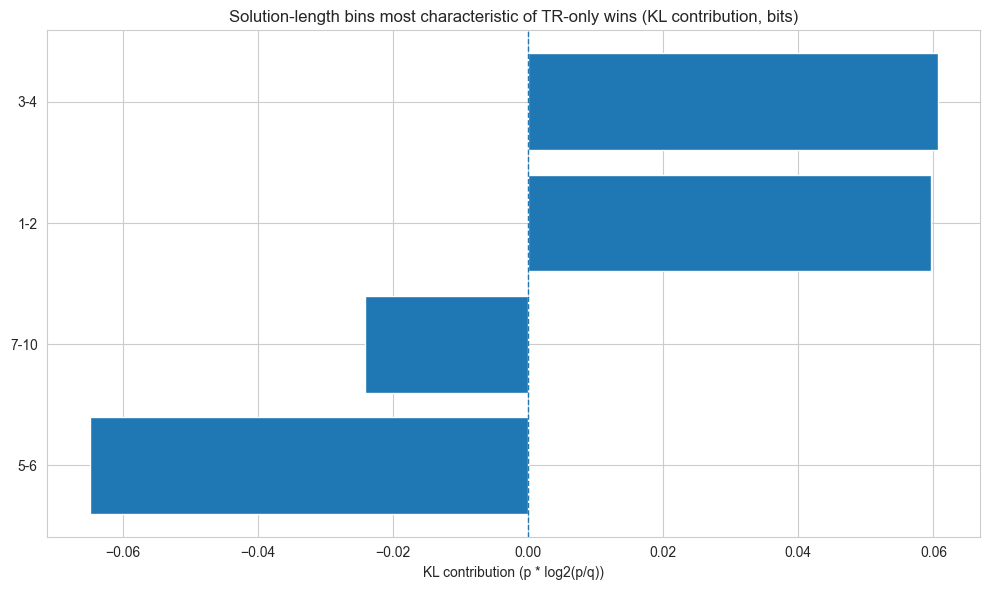

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make sure solution_len exists
if "solution_len" not in puzzles_df.columns:
    puzzles_df["solution_len"] = puzzles_df["Moves"].fillna("").astype(str).str.split().str.len()

# Rebuild disagreement sets with the new column available
tr_only = puzzles_df[(puzzles_df["transformer_first_move_correct"] == 1) &
                     (puzzles_df["cnn_first_move_correct"] == 0)].copy()

cnn_only = puzzles_df[(puzzles_df["cnn_first_move_correct"] == 1) &
                      (puzzles_df["transformer_first_move_correct"] == 0)].copy()

# Length bins (edit)
len_bins = [0, 2, 4, 6, 10, 15, 25, 10_000]
len_labels = ["1-2","3-4","5-6","7-10","11-15","16-25","26+"]

len_df, KL_len = kl_binned(
    tr_only["solution_len"], cnn_only["solution_len"],
    bins=len_bins, labels=len_labels,
    title="Solution length distribution (TR-only vs CNN-only)"
)

display(len_df)

plot_df = len_df[len_df["support"] > 10_000].head(12).sort_values("KL_contrib_bits")

plt.figure(figsize=(10,6))
plt.barh(plot_df["bin"], plot_df["KL_contrib_bits"])
plt.axvline(0, linestyle="--", linewidth=1)
plt.title("Solution-length bins most characteristic of TR-only wins (KL contribution, bits)")
plt.xlabel("KL contribution (p * log2(p/q))")
plt.tight_layout()
plt.show()


# Insights: 

Transformer Signature (Positive KL): Characterized by Fundamentals & Breadth. The Transformer excels in short, mateIn1, and oneMove puzzles, primarily at lower ratings (<1600 Elo). It has nearly double the unique win support (627k vs 342k).

CNN Signature (Negative KL): Characterized by Complexity & Depth. The CNN specializes in long and veryLong puzzles (5+ moves) and high-rated challenges (>2200 Elo). It also leads in "quiet" positional motifs like quietMove and defensiveMove.


Our KL Divergence analysis reveals a Strategic Paradox: while we hypothesized the Transformer would excel in long-horizon strategic sequences, the data shows its advantage is built on Superior Consistency in short-horizon tactical fundamentals.

The CNN functions as a 'Deep Calculator' (specializing in long and high-rated puzzles), but it is more 'brittle' than the Transformer. The Transformer's ~18% win-rate advantage is not driven by deeper calculation, but by a 'Higher Floor'—a robust ability to resolve immediate geometric patterns across the board that the CNN occasionally overlooks.

# Research Question Add-on: The "Knight Hypothesis"

"Does the Transformer’s 'Global Vision' (Attention) handle the non-linear complexity of Knight movements better than the CNN’s local pattern matching?"

In [37]:
def get_piece_from_fen(row):
    try:
        fen = row['FEN']
        # UCI move format is 'e2e4' -> start is 'e2'
        move = row['Moves'].split()[0]
        start_sq = move[:2]
        
        # Convert chess notation (e2) to array indices
        col_map = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4, 'f':5, 'g':6, 'h':7}
        target_col = col_map[start_sq[0]]
        target_row = 8 - int(start_sq[1]) # Rank 8 is index 0 in FEN
        
        # Get board part of FEN
        board_layout = fen.split()[0]
        rows = board_layout.split('/')
        
        # Focus on the specific row
        row_str = rows[target_row]
        
        # FEN rows use numbers for empty squares (e.g., "p3p" means pawn, 3 empty, pawn)
        current_col = 0
        for char in row_str:
            if char.isdigit():
                current_col += int(char)
            else:
                if current_col == target_col:
                    # Return the piece name based on the letter
                    piece_map = {
                        'p': 'Pawn', 'n': 'Knight', 'b': 'Bishop', 
                        'r': 'Rook', 'q': 'Queen', 'k': 'King'
                    }
                    return piece_map[char.lower()]
                current_col += 1
        return 'Unknown'
    except:
        return 'Unknown'

# Apply to your dataframe
puzzles_df['piece_type'] = puzzles_df.apply(get_piece_from_fen, axis=1)

# Now re-run your Gap analysis
piece_stats = puzzles_df.groupby('piece_type')[['cnn_first_move_correct', 'transformer_first_move_correct']].mean() * 100
piece_stats['Gap'] = piece_stats['transformer_first_move_correct'] - piece_stats['cnn_first_move_correct']

display(piece_stats.sort_values('Gap', ascending=False))

,cnn_first_move_correct,transformer_first_move_correct,Gap
piece_type,,,
Queen,62.955484,68.465913,5.510429
Bishop,64.442575,69.945466,5.502891
Rook,66.772038,72.118034,5.345997
Knight,66.511068,71.668324,5.157256
King,67.968023,73.004115,5.036093
Pawn,65.756097,69.918889,4.162793


In [38]:
import chess

def get_piece_at_start(row):
    try:
        # 1. Initialize the board with the FEN
        board = chess.Board(row['FEN'])
        
        # 2. Get the starting square of the first move (e.g., 'g1' from 'g1f3')
        move_uci = row['Moves'].split()[0]
        start_square_name = move_uci[:2]
        
        # 3. Convert 'g1' to the chess.Square index
        start_square_index = chess.parse_square(start_square_name)
        
        # 4. Get the piece at that square
        piece = board.piece_at(start_square_index)
        
        if piece:
            # Return full name for clarity
            piece_type_map = {
                chess.PAWN: "Pawn",
                chess.KNIGHT: "Knight",
                chess.BISHOP: "Bishop",
                chess.ROOK: "Rook",
                chess.QUEEN: "Queen",
                chess.KING: "King"
            }
            return piece_type_map[piece.piece_type]
        return "Unknown"
    except Exception as e:
        return "Unknown"

# Apply to the 5.6M dataset
puzzles_df['piece_type'] = puzzles_df.apply(get_piece_at_start, axis=1)

C:\Users\yothman\AppData\Local\Temp\ipykernel_7992\3365058989.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=piece_performance['Gap'], y=piece_performance.index, palette='coolwarm')


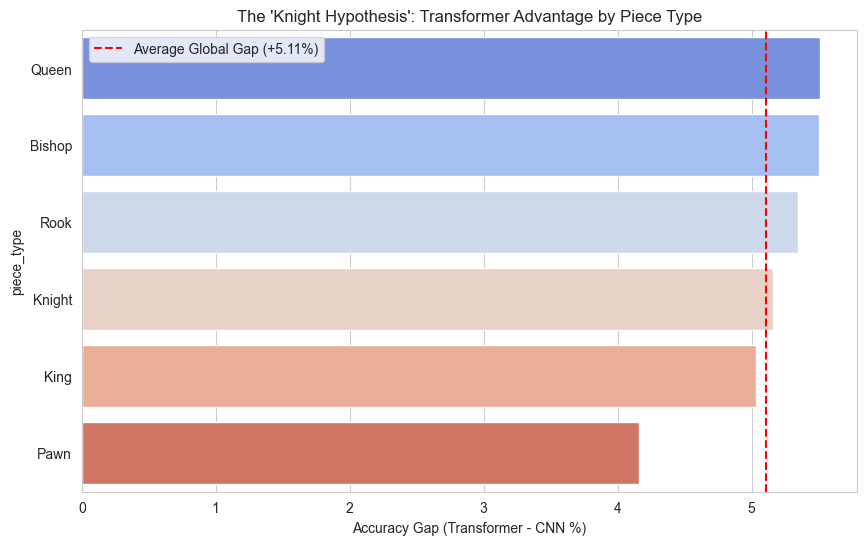

,cnn_first_move_correct,transformer_first_move_correct,Gap
piece_type,,,
Queen,62.955484,68.465913,5.510429
Bishop,64.442575,69.945466,5.502891
Rook,66.772038,72.118034,5.345997
Knight,66.511068,71.668324,5.157256
King,67.968023,73.004115,5.036093
Pawn,65.756097,69.918889,4.162793


In [39]:
# Calculate mean accuracy by piece
piece_performance = puzzles_df.groupby('piece_type')[['cnn_first_move_correct', 'transformer_first_move_correct']].mean() * 100

# Calculate the Transformer's Advantage (Gap)
piece_performance['Gap'] = piece_performance['transformer_first_move_correct'] - piece_performance['cnn_first_move_correct']

# Sort by where the Transformer is strongest
piece_performance = piece_performance.sort_values('Gap', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=piece_performance['Gap'], y=piece_performance.index, palette='coolwarm')
plt.axvline(5.11, color='red', linestyle='--', label='Average Global Gap (+5.11%)')
plt.title("The 'Knight Hypothesis': Transformer Advantage by Piece Type")
plt.xlabel("Accuracy Gap (Transformer - CNN %)")
plt.legend()
plt.show()

display(piece_performance)

## explain here the results

## add here maybe lets try to look at the board and try to analyse it, maybe try to look at the number of peices on the board and then causal DAG

## Section 4: Structural Complexity & Board Openness Analysis

### Why are we doing this?
To move beyond qualitative theme labels, we are now quantifying the **physical state of the board**. Our previous results suggest that the Transformer's advantage is not just about piece types, but about **spatial coordination**. 

By extracting structural metrics directly from the FEN strings, we can test how the environment (congestion vs. open space) influences architectural performance. This data will be the foundation for our **Causal DAG**.

### Objectives of this Analysis:
We are adding four key structural columns to evaluate the following hypotheses:

1. **Board Openness (`openness_score`):** * **Definition:** (Total Empty Squares / Total Pieces).
    * **Hypothesis:** This is our primary metric for "Spatial Gap." We expect the Transformer's advantage to grow as the board opens up, requiring its **Global Attention** to coordinate pieces across vast empty spaces that the CNN's local kernels may struggle to bridge.
2. **Structural Congestion (`pawn_count`):** * **Hypothesis:** Pawns act as physical barriers. High pawn counts create "closed" positions where interactions are local. We expect the CNN to be most competitive here, while the Transformer should pull ahead as pawns are cleared.
3. **Material Count (`total_pieces`):** * **Hypothesis:** Serves as a proxy for the Game Phase (Middlegame vs. Endgame). 
4. **Branching Factor (`num_legal_moves`):** * **Hypothesis:** Measures "Search Complexity." It tests if the Transformer's attention mechanism is more effective at filtering out "noise" as the number of legal move options increases.

In [40]:
import chess
import pandas as pd
import numpy as np

def extract_advanced_metrics(row):
    try:
        # Initialize board from FEN
        board = chess.Board(row['FEN'])
        
        # 1. Total Pieces (Material Count)
        total_pieces = len(board.piece_map())
        
        # 2. Pawn Count (Structural Congestion)
        pawn_count = len(board.pieces(chess.PAWN, chess.WHITE)) + \
                     len(board.pieces(chess.PAWN, chess.BLACK))
        
        # 3. Legal Moves (Branching Factor)
        num_legal_moves = board.legal_moves.count()
        
        # 4. Board Openness (The "Spatial Gap" Metric)
        # Ratio of empty squares to occupied pieces
        empty_squares = 64 - total_pieces
        openness_score = empty_squares / total_pieces if total_pieces > 0 else 64
        
        return total_pieces, pawn_count, num_legal_moves, openness_score
    except:
        return np.nan, np.nan, np.nan, np.nan

# Applying to the dataframe
print("Extracting board structural metrics...")
metrics_data = puzzles_df.apply(extract_advanced_metrics, axis=1)

# Assign to new columns
puzzles_df[['total_pieces', 'pawn_count', 'num_legal_moves', 'openness_score']] = pd.DataFrame(
    metrics_data.tolist(), index=puzzles_df.index
)

print("Columns added: 'total_pieces', 'pawn_count', 'num_legal_moves', 'openness_score'")
display(puzzles_df[['total_pieces', 'pawn_count', 'num_legal_moves', 'openness_score']].head())

Extracting board structural metrics...
Columns added: 'total_pieces', 'pawn_count', 'num_legal_moves', 'openness_score'


,total_pieces,pawn_count,num_legal_moves,openness_score
0,20,10,35,2.200000
1,18,10,40,2.555556
2,11,7,16,4.818182
3,30,14,39,1.133333
4,14,8,34,3.571429


### Section 4.1: Correlation Heatmap - Structural Drivers of the Advantage

Now that we have quantified the board state using metrics like **Openness** and **Branching Factor**, we will use a correlation heatmap to identify the "structural drivers" of the performance gap. 

We are specifically looking for the relationship between our new metrics and the **Transformer Advantage**.
* **Positive Correlation with Openness:** Would suggest the Transformer's Global Attention thrives when pieces are scattered across empty space.
* **Correlation with Pawn Count:** Helps us see if the CNN's local kernels become more competitive in "closed" (high pawn) vs "open" (low pawn) positions.
* **Correlation with Legal Moves:** Tests if search space complexity (noise) favors one architecture over the other.

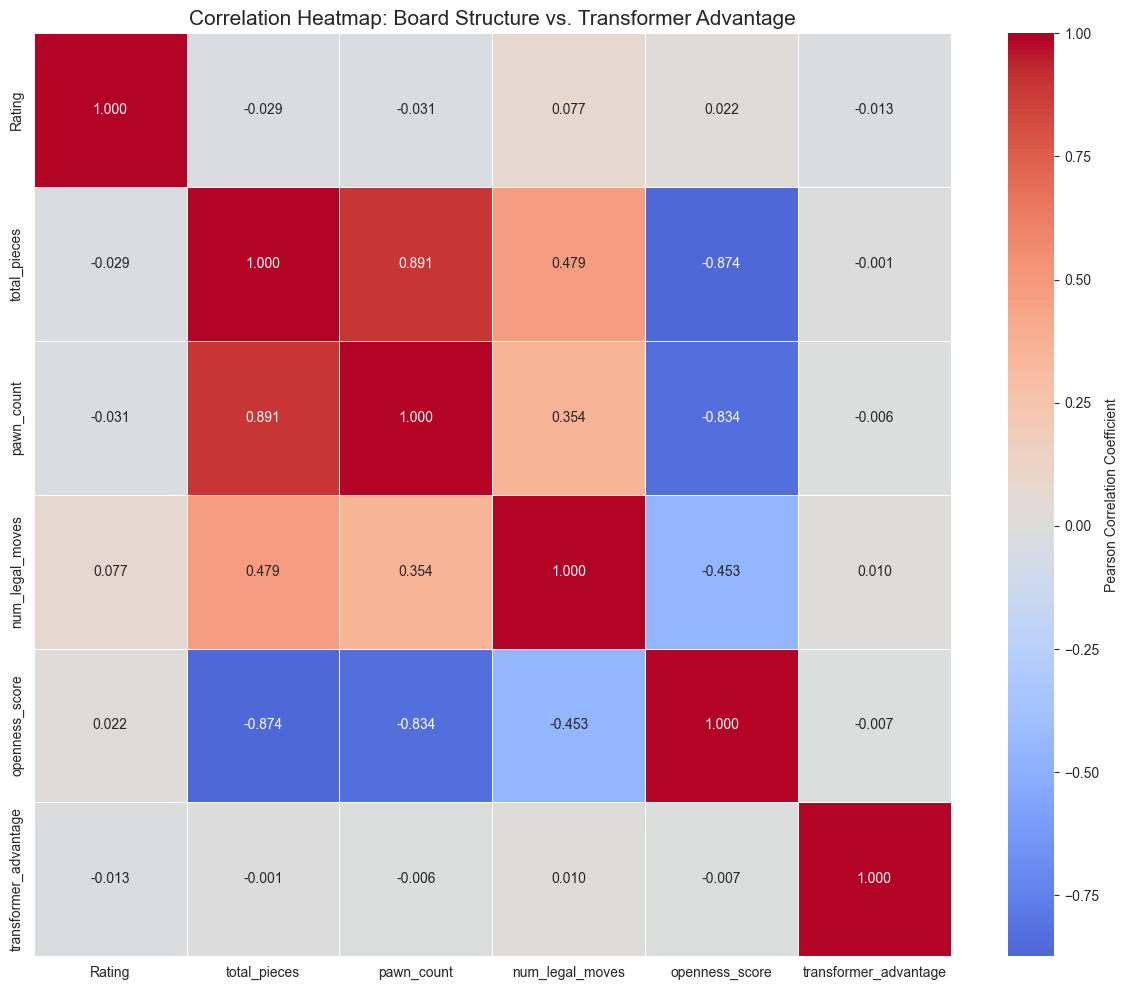

--- Correlation with Transformer Advantage ---
transformer_advantage    1.000000
num_legal_moves          0.009633
total_pieces            -0.000500
pawn_count              -0.005833
openness_score          -0.006599
Rating                  -0.012517
Name: transformer_advantage, dtype: float64


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define the Transformer Advantage 
# (1: Trans won alone, -1: CNN won alone, 0: both same)
puzzles_df['transformer_advantage'] = (
    puzzles_df['transformer_first_move_correct'].astype(int) - 
    puzzles_df['cnn_first_move_correct'].astype(int)
)

# 2. Select the structural features for the heatmap
# We include Rating to see how structure relates to difficulty
corr_cols = [
    'Rating', 
    'total_pieces', 
    'pawn_count', 
    'num_legal_moves', 
    'openness_score', 
    'transformer_advantage'
]

# 3. Compute the Correlation Matrix
corr_matrix = puzzles_df[corr_cols].corr()

# 4. Plot the Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0, 
    fmt=".3f", 
    linewidths=0.5,
    cbar_kws={"label": "Pearson Correlation Coefficient"}
)

plt.title("Correlation Heatmap: Board Structure vs. Transformer Advantage", fontsize=15)
plt.tight_layout()
plt.savefig("structural_correlation_heatmap.png")
plt.show()

# 5. Display the specific correlation with our target variable
print("--- Correlation with Transformer Advantage ---")
print(corr_matrix['transformer_advantage'].sort_values(ascending=False))

## Section 5: Causal Analysis & Structural Equation Modeling

### Why a DAG?
To truly explain the **"Amplification Paradox"** (+5% accuracy leading to +18% win rate), we cannot rely on correlations alone. We need to map the causal dependencies. A Directed Acyclic Graph (DAG) allows us to visualize how board structure, puzzle difficulty, and model architecture interact.

### The Causal Hypotheses
Based on our Correlation Heatmap, we are modeling the following causal paths:

1.  **Complexity Path:** `Rating` $\rightarrow$ `Puzzle Difficulty` $\rightarrow$ `Model Accuracy`. 
2.  **Structural Path:** `Openness` / `Total Pieces` $\rightarrow$ `Spatial Coordination Requirement`.
3.  **The "Noise" Mediator:** `num_legal_moves` acts as a mediator for complexity.

### The DAG Structure
* **Exogenous Variables:** `Total Pieces`, `Pawn Count`.
* **Mediators:** `Openness`, `Rating`, `num_legal_moves`.
* **Outcome:** `Transformer Advantage` (Correctness Gap).

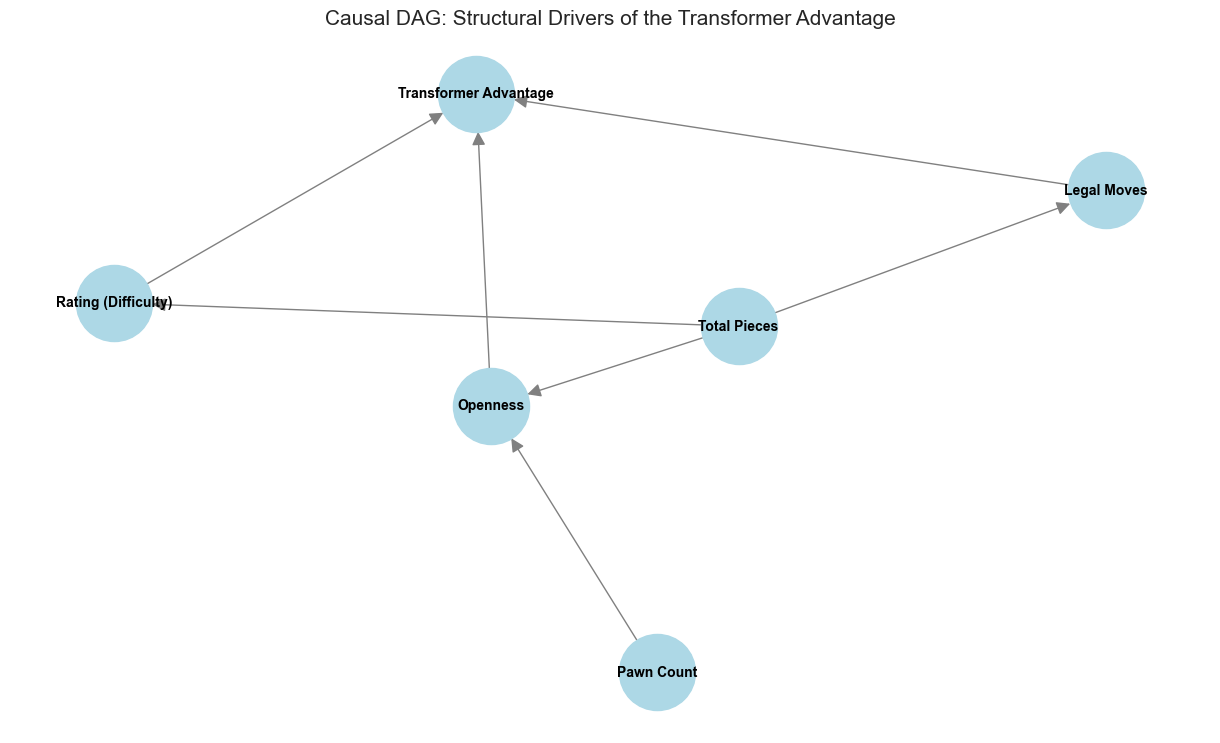

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the DAG structure
dag = nx.DiGraph()

# Add nodes
nodes = [
    "Total Pieces", "Pawn Count", "Openness", 
    "Rating (Difficulty)", "Legal Moves", "Transformer Advantage"
]
dag.add_nodes_from(nodes)

# Add causal edges based on our theory
edges = [
    ("Total Pieces", "Openness"),          # Fewer pieces = higher openness
    ("Pawn Count", "Openness"),           # Fewer pawns = higher openness
    ("Total Pieces", "Rating (Difficulty)"),# Piece count affects how hard the puzzle is
    ("Openness", "Transformer Advantage"),# OPENNESS is the main architectural driver
    ("Rating (Difficulty)", "Transformer Advantage"), # Difficulty affects the gap
    ("Total Pieces", "Legal Moves"),      # More pieces usually = more potential moves
    ("Legal Moves", "Transformer Advantage") # Branching factor complexity
]
dag.add_edges_from(edges)

# Plot the DAG
plt.figure(figsize=(12, 7))
pos = nx.spring_layout(dag, seed=42)
nx.draw(dag, pos, with_labels=True, node_color='lightblue', 
        node_size=3000, font_size=10, font_weight='bold', 
        arrowsize=20, edge_color='gray')

plt.title("Causal DAG: Structural Drivers of the Transformer Advantage", fontsize=15)
plt.show()

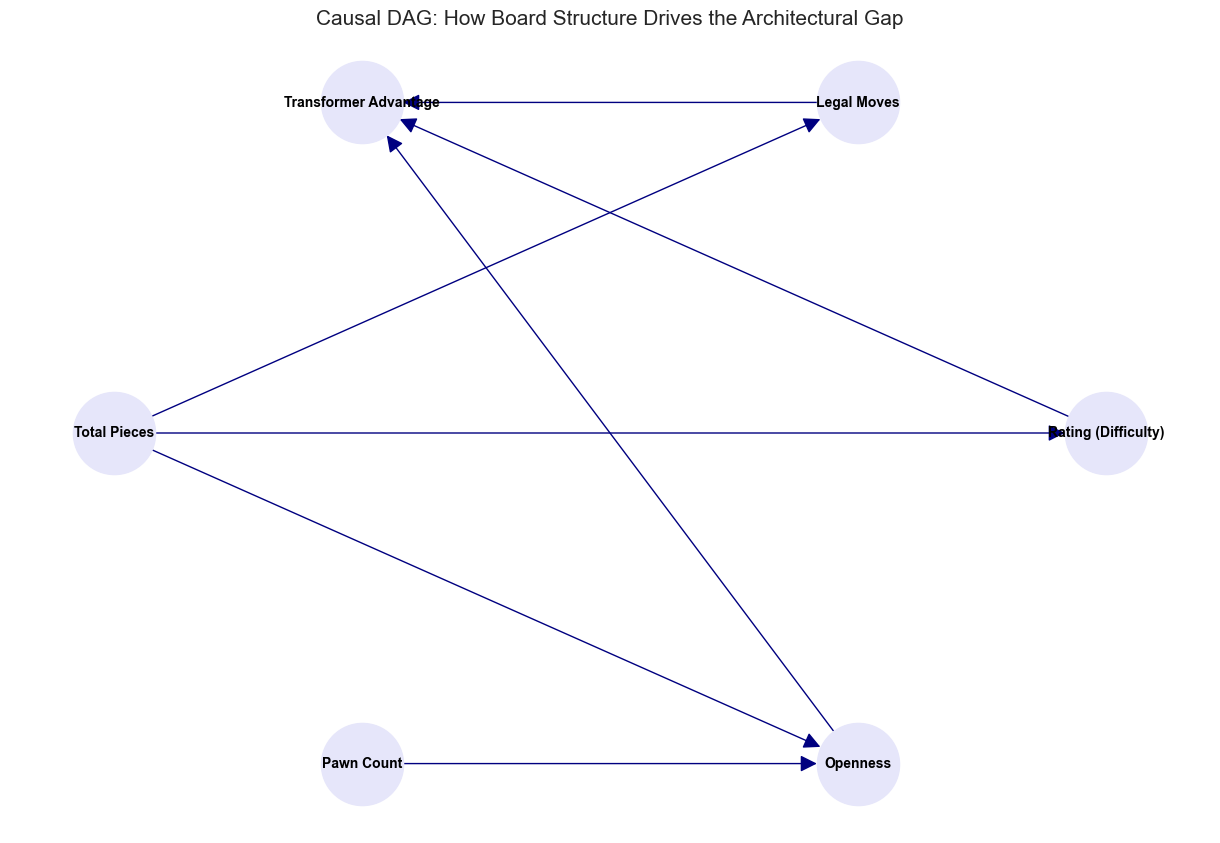

In [43]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the DAG structure
dag = nx.DiGraph()

# Add nodes representing our variables
nodes = ["Total Pieces", "Pawn Count", "Openness", "Rating (Difficulty)", "Legal Moves", "Transformer Advantage"]
dag.add_nodes_from(nodes)

# Add causal paths based on our structural logic
edges = [
    ("Total Pieces", "Openness"),          # Fewer pieces -> Higher openness
    ("Pawn Count", "Openness"),           # Pawn structure dictates openness
    ("Total Pieces", "Rating (Difficulty)"),# Material count influences puzzle difficulty
    ("Total Pieces", "Legal Moves"),      # More pieces usually increase the search space
    ("Openness", "Transformer Advantage"), # Theory: Open space favors Attention
    ("Rating (Difficulty)", "Transformer Advantage"), # Theory: CNN closes gap in high-calc puzzles
    ("Legal Moves", "Transformer Advantage")  # Theory: Transformer filters 'noise' better
]
dag.add_edges_from(edges)

# Visualization
plt.figure(figsize=(12, 8))
pos = nx.shell_layout(dag) # Shell layout keeps it organized
nx.draw(dag, pos, with_labels=True, node_color='lavender', node_size=3500, 
        font_size=10, font_weight='bold', arrowsize=25, edge_color='navy')

plt.title("Causal DAG: How Board Structure Drives the Architectural Gap", fontsize=15)
plt.show()

## Section 5.1: Confounder Adjustment - Isolating the Structural Effect

To validate our DAG, we must adjust for **Rating** as a confounder. If we observe a correlation between `openness_score` and `transformer_advantage`, we need to ensure this isn't simply because endgames (high openness) tend to have different difficulty levels than middlegames.

We will use **Stratified Residual Analysis**:
1. We bin the puzzles by `Rating` (Difficulty).
2. We calculate the `Transformer Advantage` within each bin.
3. We observe if the relationship with `openness_score` remains consistent across all difficulty levels.

<Figure size 1200x600 with 0 Axes>

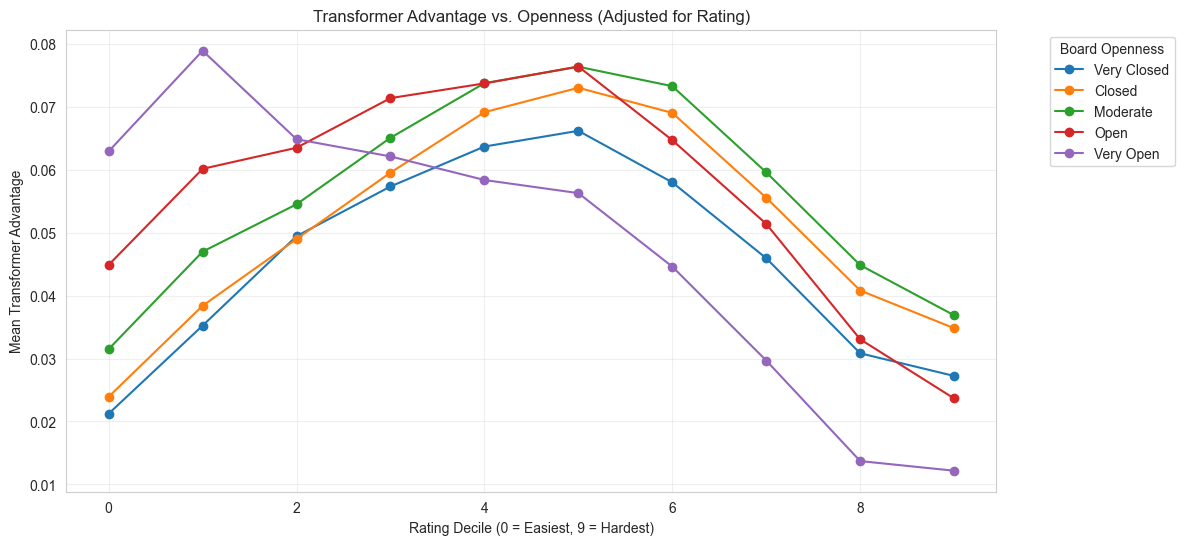

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create Rating Bins (Deciles) to control for difficulty
puzzles_df['rating_bin'] = pd.qcut(puzzles_df['Rating'], 10, labels=False)

# 2. Group by Rating Bin and Openness (binned for visualization)
puzzles_df['openness_bin'] = pd.qcut(puzzles_df['openness_score'], 5, labels=['Very Closed', 'Closed', 'Moderate', 'Open', 'Very Open'])

# 3. Calculate Mean Advantage across these strata
stratified_gap = puzzles_df.groupby(['rating_bin', 'openness_bin'], observed=True)['transformer_advantage'].mean().unstack()

# 4. Plot the results
plt.figure(figsize=(12, 6))
stratified_gap.plot(marker='o', figsize=(12,6))
plt.title("Transformer Advantage vs. Openness (Adjusted for Rating)")
plt.xlabel("Rating Decile (0 = Easiest, 9 = Hardest)")
plt.ylabel("Mean Transformer Advantage")
plt.legend(title="Board Openness", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

In [5]:
# Derive top-3 / top-5 correctness flags from the model top-5 move lists
import json

def _parse_move_list(val):
    """Return a list of moves"""
    return json.loads(val)


def _first_move(row):
    moves = str(row.get("Moves", ""))
    return moves.split()[1] if moves else None

# Compute flags for CNN
cnn_move_lists = puzzles_df["cnn_top5_moves"].apply(_parse_move_list)
ground_truth = puzzles_df.apply(_first_move, axis=1)

puzzles_df["cnn_first_move_correct_top3"] = pd.Series(
    [gt in moves[:3] if gt else False for gt, moves in zip(ground_truth, cnn_move_lists)],
    index=puzzles_df.index,
    dtype=int,
)

puzzles_df["cnn_first_move_correct_top5"] = pd.Series(
    [gt in moves[:5] if gt else False for gt, moves in zip(ground_truth, cnn_move_lists)],
    index=puzzles_df.index,
    dtype=int,
)

# Compute flags for Transformer
tr_move_lists = puzzles_df["transformer_top5_moves"].apply(_parse_move_list)

puzzles_df["transformer_first_move_correct_top3"] = pd.Series(
    [gt in moves[:3] if gt else False for gt, moves in zip(ground_truth, tr_move_lists)],
    index=puzzles_df.index,
    dtype=int,
)

puzzles_df["transformer_first_move_correct_top5"] = pd.Series(
    [gt in moves[:5] if gt else False for gt, moves in zip(ground_truth, tr_move_lists)],
    index=puzzles_df.index,
    dtype=int,
)

# Quick sanity check: report new aggregate top-k accuracies (rounded to 4 decimals)
print("CNN top-3 acc:", f"{puzzles_df['cnn_first_move_correct_top3'].mean():.4f}")
print("CNN top-5 acc:", f"{puzzles_df['cnn_first_move_correct_top5'].mean():.4f}")
print("Transformer top-3 acc:", f"{puzzles_df['transformer_first_move_correct_top3'].mean():.4f}")
print("Transformer top-5 acc:", f"{puzzles_df['transformer_first_move_correct_top5'].mean():.4f}")


CNN top-3 acc: 0.8408
CNN top-5 acc: 0.8963
Transformer top-3 acc: 0.8837
Transformer top-5 acc: 0.9336


# Extended Analysis: Top-3 and Top-5 Predictions

## Research Question Extension:
**Does the Amplification Paradox hold when considering Top-3 and Top-5 predictions?** 

Now we extend our analysis to examine not just the first move prediction, but the top-3 and top-5 candidate moves. This reveals:
- How prediction confidence evolves across multiple candidates
- Whether architectural advantages amplify or compress at different k-levels  
- If the "cognitive signatures" of each model persist when examining broader move distributions

## Aggregate Top-3 and Top-5 Accuracy Comparison

Visual comparison of model performance at different k-levels. This side-by-side bar chart shows:
- How accuracy improves as we consider more candidate moves (from top-1 → top-3 → top-5)
- Whether the Transformer's advantage persists, grows, or shrinks with additional candidates
- The absolute performance levels: both models should improve, but at different rates

**Expected pattern**: Both models gain accuracy with more candidates, but if the Transformer maintains its lead, it suggests consistent superiority across the full prediction distribution, not just at the top.

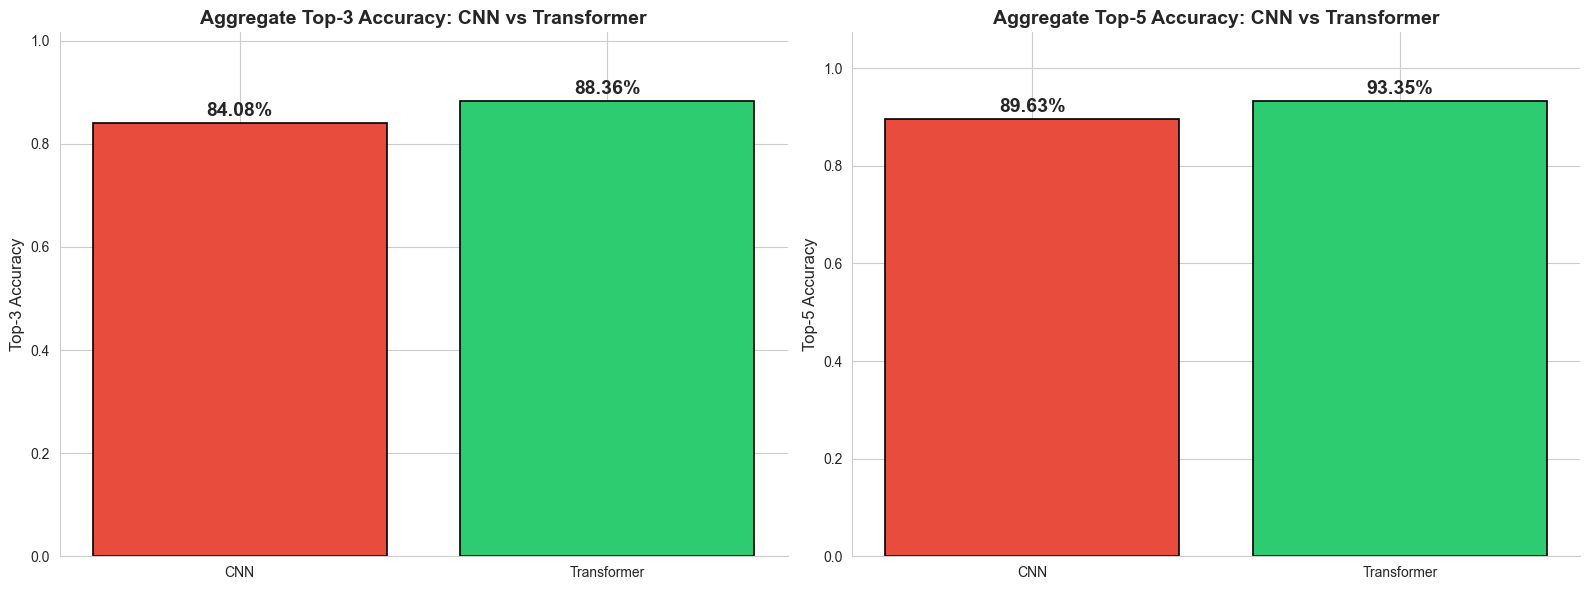

TOP-3 ACCURACY
CNN Top-3 Accuracy: 0.8408
Transformer Top-3 Accuracy: 0.8836
Gap (Transformer - CNN): 0.0428

TOP-5 ACCURACY
CNN Top-5 Accuracy: 0.8963
Transformer Top-5 Accuracy: 0.9335
Gap (Transformer - CNN): 0.0373


In [46]:
# Visualize Top-3 and Top-5 Accuracies

# Compute accuracies
cnn_top3_acc = puzzles_df['cnn_first_move_correct_top3'].mean()
tr_top3_acc = puzzles_df['transformer_first_move_correct_top3'].mean()
cnn_top5_acc = puzzles_df['cnn_first_move_correct_top5'].mean()
tr_top5_acc = puzzles_df['transformer_first_move_correct_top5'].mean()

# Create side-by-side bar plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top-3 Accuracy Plot
models = ['CNN', 'Transformer']
accuracies_top3 = [cnn_top3_acc, tr_top3_acc]
colors = ['#e74c3c', '#2ecc71']

bars3 = ax1.bar(models, accuracies_top3, color=colors, edgecolor='black', linewidth=1.2)

# Add value labels on bars
for bar, acc in zip(bars3, accuracies_top3):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
            f'{acc:.2%}', ha='center', va='bottom', fontsize=14, fontweight='bold')

# Formatting
ax1.set_ylabel('Top-3 Accuracy', fontsize=12)
ax1.set_title('Aggregate Top-3 Accuracy: CNN vs Transformer', fontsize=14, fontweight='bold')
ax1.set_ylim(0, max(accuracies_top3) * 1.15)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Top-5 Accuracy Plot
accuracies_top5 = [cnn_top5_acc, tr_top5_acc]

bars5 = ax2.bar(models, accuracies_top5, color=colors, edgecolor='black', linewidth=1.2)

# Add value labels on bars
for bar, acc in zip(bars5, accuracies_top5):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
            f'{acc:.2%}', ha='center', va='bottom', fontsize=14, fontweight='bold')

# Formatting
ax2.set_ylabel('Top-5 Accuracy', fontsize=12)
ax2.set_title('Aggregate Top-5 Accuracy: CNN vs Transformer', fontsize=14, fontweight='bold')
ax2.set_ylim(0, max(accuracies_top5) * 1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Display the results
print("=" * 60)
print("TOP-3 ACCURACY")
print("=" * 60)
print(f"CNN Top-3 Accuracy: {cnn_top3_acc:.4f}")
print(f"Transformer Top-3 Accuracy: {tr_top3_acc:.4f}")
print(f"Gap (Transformer - CNN): {tr_top3_acc - cnn_top3_acc:.4f}")

print("\n" + "=" * 60)
print("TOP-5 ACCURACY")
print("=" * 60)
print(f"CNN Top-5 Accuracy: {cnn_top5_acc:.4f}")
print(f"Transformer Top-5 Accuracy: {tr_top5_acc:.4f}")
print(f"Gap (Transformer - CNN): {tr_top5_acc - cnn_top5_acc:.4f}")


## McNemar's Test for Top-3 and Top-5 Statistical Significance

**Statistical Validation**: We apply McNemar's test to the top-3 and top-5 predictions to determine if the observed differences are statistically significant.

This paired test analyzes:
- **Discordant pairs**: Puzzles where exactly one model got it right
  - `b`: CNN correct, Transformer wrong (within top-k)
  - `c`: Transformer correct, CNN wrong (within top-k)
- **Test statistic**: If b ≠ c significantly, the difference is real

**Why this matters**: As k increases, both models should improve. McNemar's test reveals whether their relative advantage remains statistically meaningful when we give both models more "chances" to get the answer right.

In [47]:
# McNemar's Test for Top-3 and Top-5 Accuracies
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar

print("=" * 60)
print("McNEMAR'S TEST: TOP-3 ACCURACY")
print("=" * 60)

cnn_top3 = puzzles_df["cnn_first_move_correct_top3"].astype(bool).to_numpy()
tr_top3  = puzzles_df["transformer_first_move_correct_top3"].astype(bool).to_numpy()

b_top3 = int(np.sum(cnn_top3 & ~tr_top3))  # CNN correct, Transformer wrong
c_top3 = int(np.sum(~cnn_top3 & tr_top3))  # Transformer correct, CNN wrong

table_top3 = [[0, b_top3],
              [c_top3, 0]]

res_top3 = mcnemar(table_top3, exact=False, correction=True)
print(f"b (cnn_only): {b_top3}, c (tr_only): {c_top3}")
print(f"statistic: {res_top3.statistic:.4f}, p-value: {res_top3.pvalue:.6f}")

print("\n" + "=" * 60)
print("McNEMAR'S TEST: TOP-5 ACCURACY")
print("=" * 60)

cnn_top5 = puzzles_df["cnn_first_move_correct_top5"].astype(bool).to_numpy()
tr_top5  = puzzles_df["transformer_first_move_correct_top5"].astype(bool).to_numpy()

b_top5 = int(np.sum(cnn_top5 & ~tr_top5))  # CNN correct, Transformer wrong
c_top5 = int(np.sum(~cnn_top5 & tr_top5))  # Transformer correct, CNN wrong

table_top5 = [[0, b_top5],
              [c_top5, 0]]

res_top5 = mcnemar(table_top5, exact=False, correction=True)
print(f"b (cnn_only): {b_top5}, c (tr_only): {c_top5}")
print(f"statistic: {res_top5.statistic:.4f}, p-value: {res_top5.pvalue:.6f}")

McNEMAR'S TEST: TOP-3 ACCURACY
b (cnn_only): 166057, c (tr_only): 404923
statistic: 99927.2973, p-value: 0.000000

McNEMAR'S TEST: TOP-5 ACCURACY
b (cnn_only): 98509, c (tr_only): 306184
statistic: 106570.8828, p-value: 0.000000


## Bootstrap Confidence Intervals for Top-3 and Top-5

**Robustness Check**: Bootstrap resampling (1000 iterations) to estimate the distribution of the accuracy gap at top-3 and top-5 levels.

This analysis:
- Resamples the dataset with replacement 1000 times
- Calculates the gap (Transformer - CNN) for each resample
- Constructs 95% confidence intervals
- Visualizes the distribution of possible gap values

**Interpretation**: 
- If the CI excludes zero → statistically significant advantage
- Narrower CI → more stable/reliable estimate
- Distribution shape → reveals sampling variability

This complements McNemar's test by showing the magnitude and stability of the difference, not just its existence.

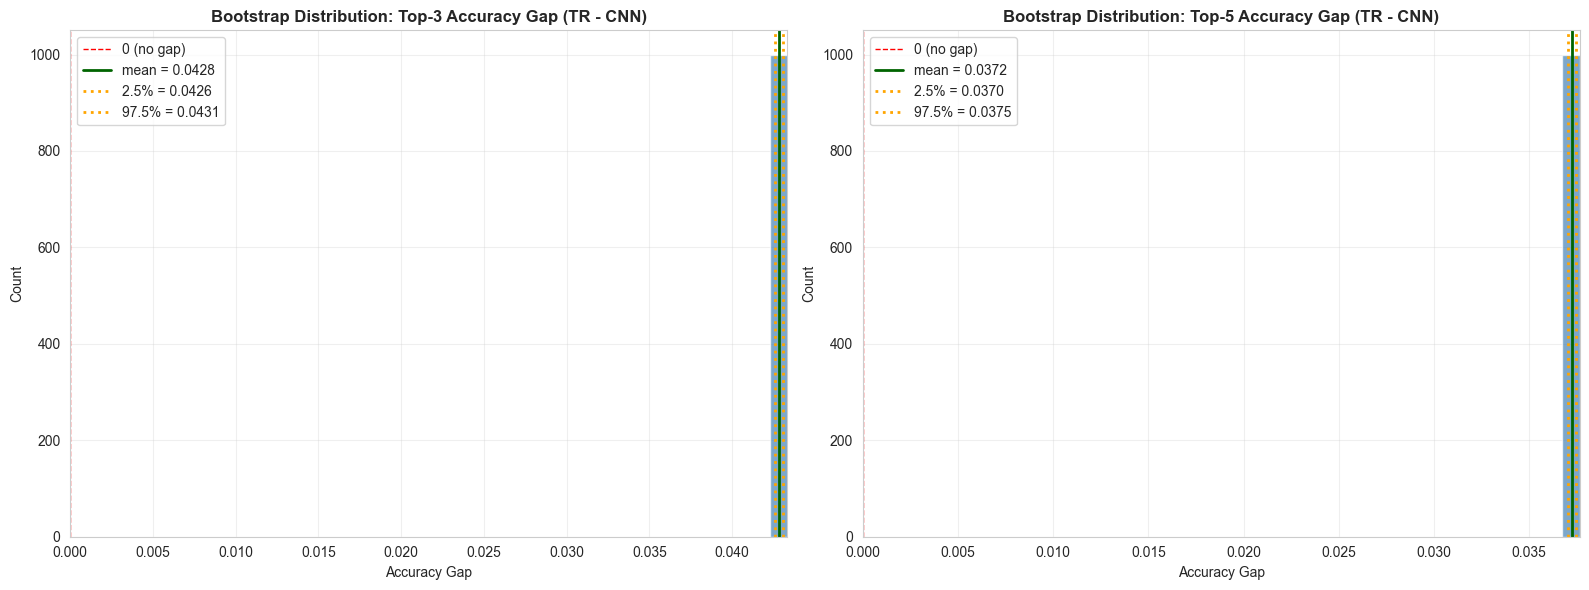

BOOTSTRAP CONFIDENCE INTERVALS

Top-3 Accuracy Gap:
  Mean Gap: 0.042846
  95% CI: [0.042597, 0.043099]

Top-5 Accuracy Gap:
  Mean Gap: 0.037248
  95% CI: [0.037037, 0.037462]


In [48]:
# Bootstrap Analysis for Top-3 and Top-5 Accuracies
import numpy as np
import matplotlib.pyplot as plt

n_iterations = 1000
rng = np.random.default_rng(42)

# Top-3 Bootstrap
tr_top3 = puzzles_df["transformer_first_move_correct_top3"].to_numpy(dtype=np.float64)
cnn_top3 = puzzles_df["cnn_first_move_correct_top3"].to_numpy(dtype=np.float64)

N = len(tr_top3)
gaps_top3 = np.empty(n_iterations, dtype=np.float64)

for i in range(n_iterations):
    idx = rng.integers(0, N, size=N)
    gaps_top3[i] = tr_top3[idx].mean() - cnn_top3[idx].mean()

lower_top3, upper_top3 = np.percentile(gaps_top3, [2.5, 97.5])
mean_gap_top3 = gaps_top3.mean()

# Top-5 Bootstrap
tr_top5 = puzzles_df["transformer_first_move_correct_top5"].to_numpy(dtype=np.float64)
cnn_top5 = puzzles_df["cnn_first_move_correct_top5"].to_numpy(dtype=np.float64)

gaps_top5 = np.empty(n_iterations, dtype=np.float64)

for i in range(n_iterations):
    idx = rng.integers(0, N, size=N)
    gaps_top5[i] = tr_top5[idx].mean() - cnn_top5[idx].mean()

lower_top5, upper_top5 = np.percentile(gaps_top5, [2.5, 97.5])
mean_gap_top5 = gaps_top5.mean()

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot Top-3
pad_top3 = (upper_top3 - lower_top3) * 0.5
x_min_top3 = min(0, lower_top3 - pad_top3)
x_max_top3 = upper_top3 + pad_top3

ax1.hist(gaps_top3, bins=40, range=(x_min_top3, x_max_top3), color='steelblue', alpha=0.7)
ax1.axvline(0, linestyle="--", linewidth=1, color='red', label="0 (no gap)")
ax1.axvline(mean_gap_top3, linewidth=2, color='darkgreen', label=f"mean = {mean_gap_top3:.4f}")
ax1.axvline(lower_top3, linestyle=":", linewidth=2, color='orange', label=f"2.5% = {lower_top3:.4f}")
ax1.axvline(upper_top3, linestyle=":", linewidth=2, color='orange', label=f"97.5% = {upper_top3:.4f}")

ax1.set_title("Bootstrap Distribution: Top-3 Accuracy Gap (TR - CNN)", fontweight='bold')
ax1.set_xlabel("Accuracy Gap")
ax1.set_ylabel("Count")
ax1.set_xlim(x_min_top3, x_max_top3)
ax1.legend()
ax1.grid(alpha=0.3)

# Plot Top-5
pad_top5 = (upper_top5 - lower_top5) * 0.5
x_min_top5 = min(0, lower_top5 - pad_top5)
x_max_top5 = upper_top5 + pad_top5

ax2.hist(gaps_top5, bins=40, range=(x_min_top5, x_max_top5), color='steelblue', alpha=0.7)
ax2.axvline(0, linestyle="--", linewidth=1, color='red', label="0 (no gap)")
ax2.axvline(mean_gap_top5, linewidth=2, color='darkgreen', label=f"mean = {mean_gap_top5:.4f}")
ax2.axvline(lower_top5, linestyle=":", linewidth=2, color='orange', label=f"2.5% = {lower_top5:.4f}")
ax2.axvline(upper_top5, linestyle=":", linewidth=2, color='orange', label=f"97.5% = {upper_top5:.4f}")

ax2.set_title("Bootstrap Distribution: Top-5 Accuracy Gap (TR - CNN)", fontweight='bold')
ax2.set_xlabel("Accuracy Gap")
ax2.set_ylabel("Count")
ax2.set_xlim(x_min_top5, x_max_top5)
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print results
print("=" * 60)
print("BOOTSTRAP CONFIDENCE INTERVALS")
print("=" * 60)
print(f"\nTop-3 Accuracy Gap:")
print(f"  Mean Gap: {mean_gap_top3:.6f}")
print(f"  95% CI: [{lower_top3:.6f}, {upper_top3:.6f}]")

print(f"\nTop-5 Accuracy Gap:")
print(f"  Mean Gap: {mean_gap_top5:.6f}")
print(f"  95% CI: [{lower_top5:.6f}, {upper_top5:.6f}]")


## Rating Bin Analysis (Top-3 and Top-5)

**Difficulty-Stratified Performance**: How do the models perform across different puzzle difficulties when considering top-k predictions?

This analysis:
- Creates 200-point rating bins (800-1000, 1000-1200, etc.)
- Calculates top-3 and top-5 accuracy within each bin
- Plots accuracy curves and gap curves by difficulty level

**Key questions**:
- Does the Transformer's advantage grow or shrink at higher difficulties?
- Do both models improve uniformly with more candidates, or does one benefit more?
- At what rating levels does the gap emerge or disappear?

**Expected insight**: If the Transformer's advantage is architectural (global attention), it should persist across difficulty levels. If it's about "easier patterns," the gap might vanish at high ratings.

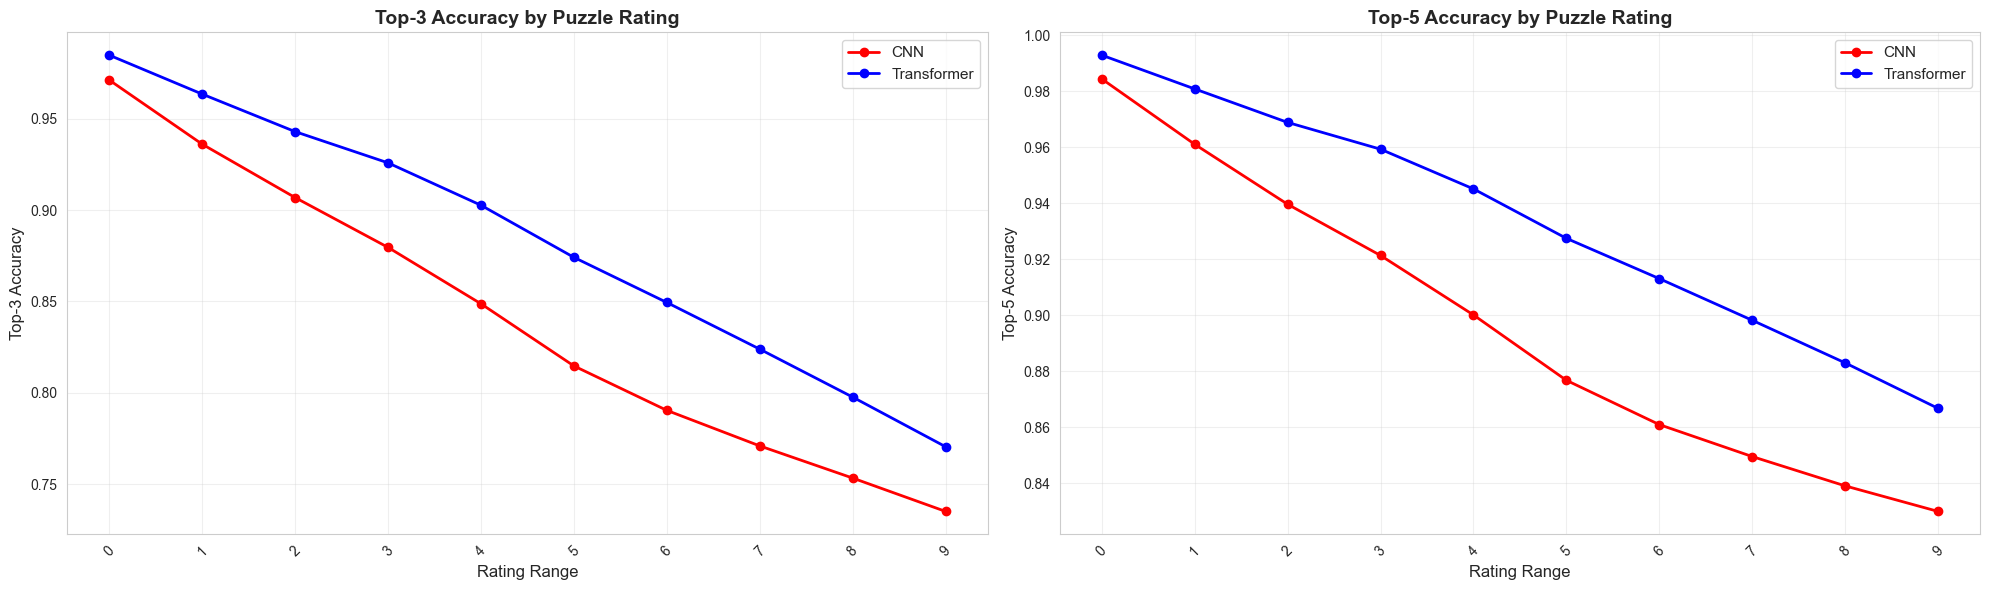

TOP-3 ACCURACY BY RATING:


,rating_bin,cnn_first_move_correct_top3,transformer_first_move_correct_top3,Gap (Trans - CNN)
0,0,0.971244,0.984871,0.013628
1,1,0.936129,0.963550,0.027420
2,2,0.906901,0.942999,0.036098
3,3,0.879617,0.925893,0.046276
4,4,0.848737,0.902690,0.053953
5,5,0.814702,0.874153,0.059451
6,6,0.790374,0.849448,0.059074
7,7,0.770911,0.823887,0.052976
8,8,0.753303,0.797627,0.044324
9,9,0.735037,0.770451,0.035414



TOP-5 ACCURACY BY RATING:


,rating_bin,cnn_first_move_correct_top5,transformer_first_move_correct_top5,Gap (Trans - CNN)
0,0,0.984377,0.992848,0.008471
1,1,0.961020,0.980794,0.019774
2,2,0.939595,0.968827,0.029232
3,3,0.921304,0.959256,0.037952
4,4,0.900054,0.945071,0.045018
5,5,0.876709,0.927414,0.050705
6,6,0.860891,0.913023,0.052132
7,7,0.849479,0.898144,0.048665
8,8,0.839004,0.882929,0.043925
9,9,0.829882,0.866678,0.036796


In [49]:
# Accuracy by Rating Bins for Top-3 and Top-5
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Accuracy per Bin for Top-3 and Top-5
bin_analysis_top3 = puzzles_df.groupby('rating_bin', observed=True)[['cnn_first_move_correct_top3', 'transformer_first_move_correct_top3']].mean().reset_index()
bin_analysis_top3['Gap (Trans - CNN)'] = bin_analysis_top3['transformer_first_move_correct_top3'] - bin_analysis_top3['cnn_first_move_correct_top3']

bin_analysis_top5 = puzzles_df.groupby('rating_bin', observed=True)[['cnn_first_move_correct_top5', 'transformer_first_move_correct_top5']].mean().reset_index()
bin_analysis_top5['Gap (Trans - CNN)'] = bin_analysis_top5['transformer_first_move_correct_top5'] - bin_analysis_top5['cnn_first_move_correct_top5']

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Top-3 Plot
ax1.plot(bin_analysis_top3['rating_bin'].astype(str), bin_analysis_top3['cnn_first_move_correct_top3'], 
         marker='o', label='CNN', color='red', linewidth=2)
ax1.plot(bin_analysis_top3['rating_bin'].astype(str), bin_analysis_top3['transformer_first_move_correct_top3'], 
         marker='o', label='Transformer', color='blue', linewidth=2)

ax1.set_title('Top-3 Accuracy by Puzzle Rating', fontsize=14, fontweight='bold')
ax1.set_xlabel('Rating Range', fontsize=12)
ax1.set_ylabel('Top-3 Accuracy', fontsize=12)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Top-5 Plot
ax2.plot(bin_analysis_top5['rating_bin'].astype(str), bin_analysis_top5['cnn_first_move_correct_top5'], 
         marker='o', label='CNN', color='red', linewidth=2)
ax2.plot(bin_analysis_top5['rating_bin'].astype(str), bin_analysis_top5['transformer_first_move_correct_top5'], 
         marker='o', label='Transformer', color='blue', linewidth=2)

ax2.set_title('Top-5 Accuracy by Puzzle Rating', fontsize=14, fontweight='bold')
ax2.set_xlabel('Rating Range', fontsize=12)
ax2.set_ylabel('Top-5 Accuracy', fontsize=12)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print the tables
print("=" * 60)
print("TOP-3 ACCURACY BY RATING:")
print("=" * 60)
display(bin_analysis_top3)

print("\n" + "=" * 60)
print("TOP-5 ACCURACY BY RATING:")
print("=" * 60)
display(bin_analysis_top5)


## Theme Analysis (Top-3 and Top-5)

**Tactical Pattern Recognition**: Which chess themes show the largest model differences at top-k levels?

This analysis explodes the multi-theme labels and examines:
- CNN's strongest themes (where CNN advantage is largest)
- Most frequent themes (for statistical stability)
- How advantages shift from top-1 to top-3 to top-5

**Memory optimization**: We select only necessary columns before exploding to avoid memory errors with the 5M+ puzzle dataset.

**Key insight**: 
- If CNN leads on "quiet" positional themes even at top-5, it suggests genuine pattern recognition
- If Transformer dominates "forcing" tactical themes across all k-levels, it reveals architectural strengths in calculation trees

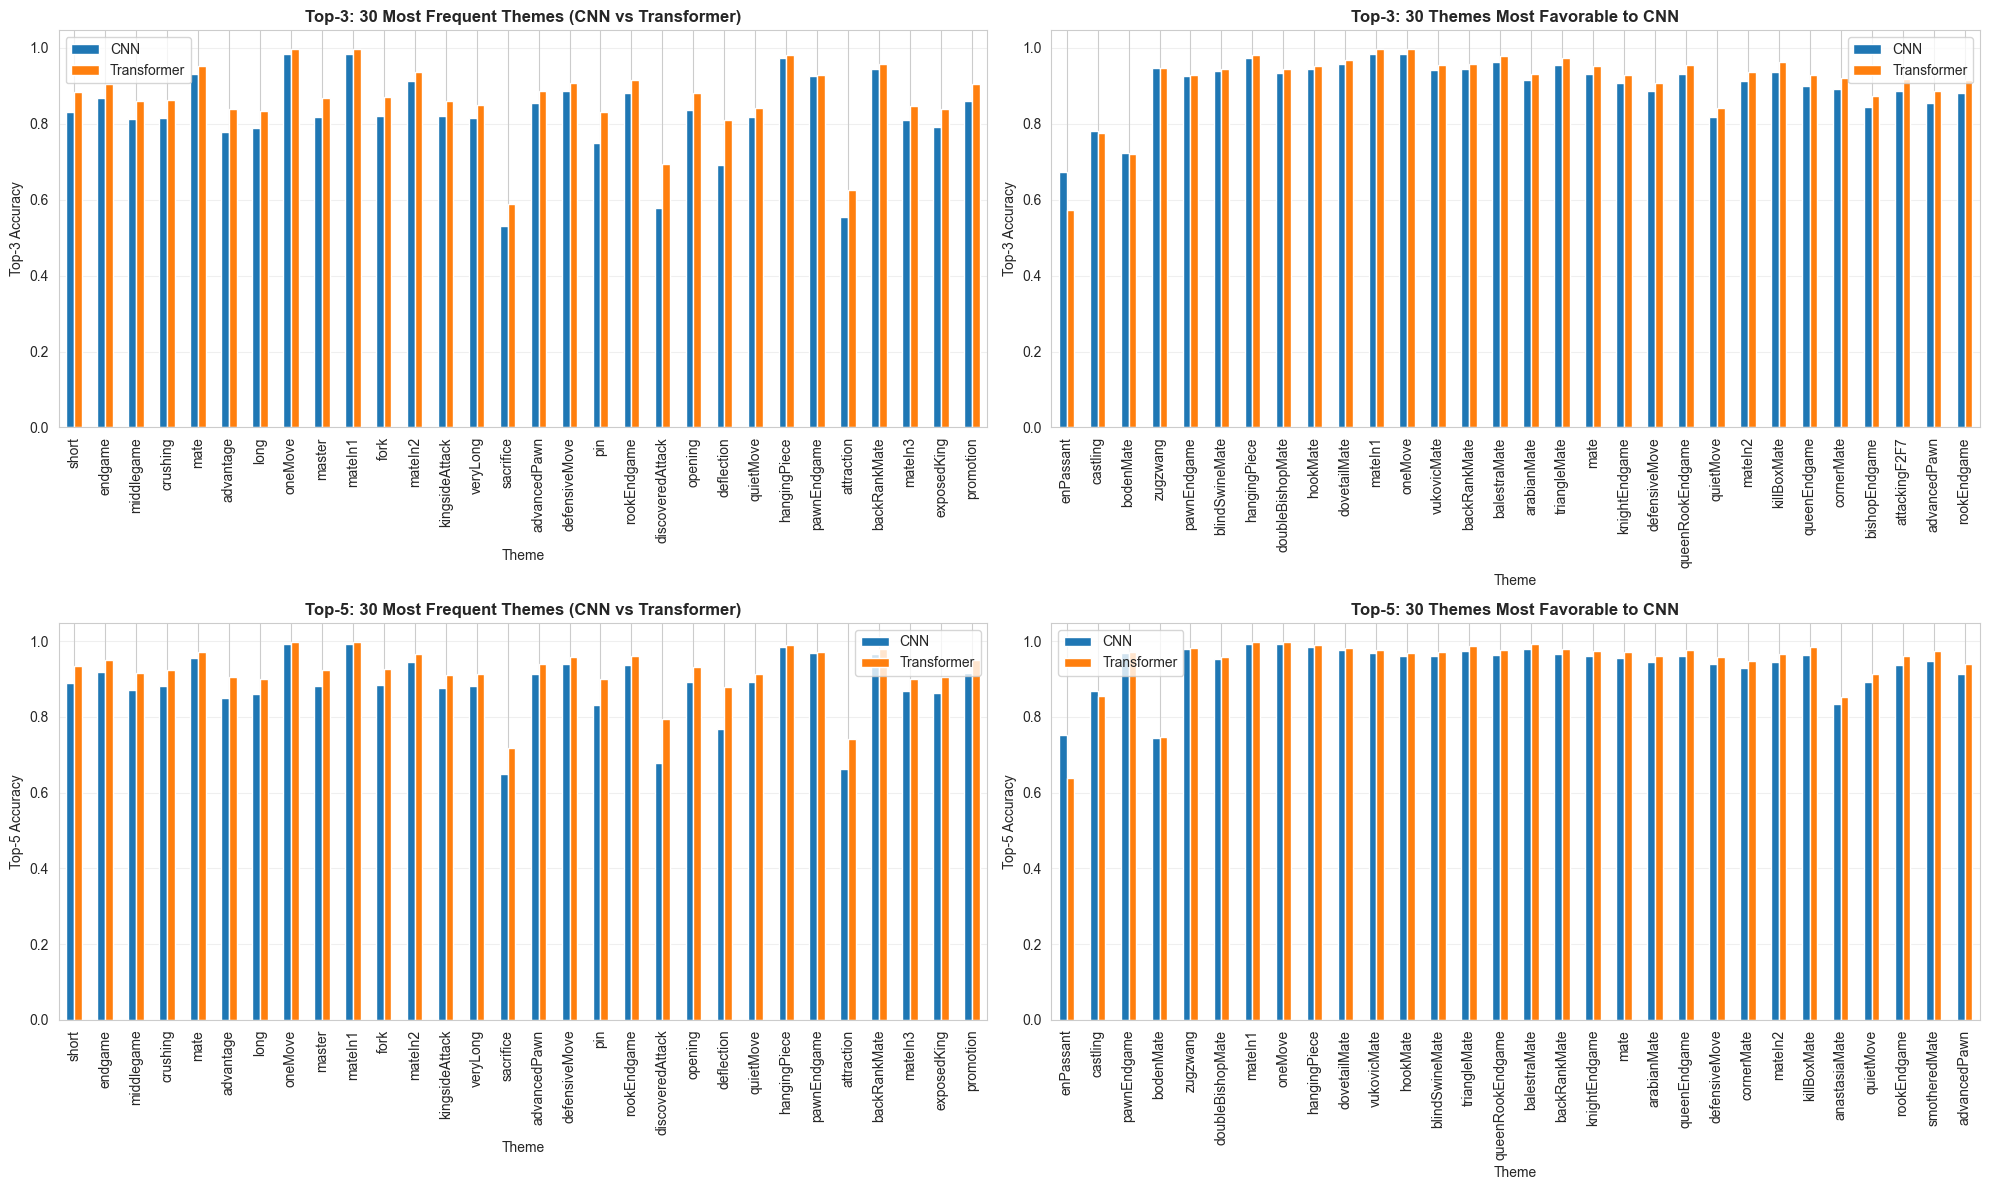

TOP-3 THEME STATISTICS (sorted by Gap)


,n,cnn_acc,tr_acc,Gap
Theme,,,,
enPassant,7963,0.671732,0.571769,-0.099962
castling,2371,0.780261,0.775200,-0.005061
bodenMate,3267,0.723906,0.719927,-0.003979
zugzwang,57526,0.946459,0.947919,0.001460
pawnEndgame,203656,0.926302,0.928036,0.001733
blindSwineMate,6349,0.938100,0.944558,0.006458
hangingPiece,203806,0.974260,0.980781,0.006521
doubleBishopMate,3218,0.935053,0.943754,0.008701
hookMate,9341,0.944224,0.953431,0.009207



TOP-5 THEME STATISTICS (sorted by Gap)


,n,cnn_acc,tr_acc,Gap
Theme,,,,
enPassant,7963,0.753234,0.638578,-0.114655
castling,2371,0.868832,0.855757,-0.013075
pawnEndgame,203656,0.969566,0.971319,0.001753
bodenMate,3267,0.744108,0.746250,0.002143
zugzwang,57526,0.980374,0.982982,0.002608
doubleBishopMate,3218,0.953076,0.958359,0.005283
mateIn1,779483,0.992124,0.998394,0.006270
oneMove,781932,0.991989,0.998297,0.006307
hangingPiece,203806,0.984240,0.990756,0.006516


In [50]:
# Theme Analysis for Top-3 and Top-5 Accuracies
import pandas as pd
import matplotlib.pyplot as plt

# Create exploded dataframe with only the columns we need (to save memory)
exploded_top_k = (
    puzzles_df[['Themes', 'cnn_first_move_correct_top3', 'transformer_first_move_correct_top3', 
                 'cnn_first_move_correct_top5', 'transformer_first_move_correct_top5']]
    .assign(Theme=puzzles_df["Themes"].str.split())
    .explode("Theme")
)

# 2) Accuracy + support per theme for Top-3
theme_stats_top3 = (
    exploded_top_k.groupby("Theme")
    .agg(
        n=("Theme", "size"),
        cnn_acc=("cnn_first_move_correct_top3", "mean"),
        tr_acc=("transformer_first_move_correct_top3", "mean"),
    )
)

theme_stats_top3["Gap"] = theme_stats_top3["tr_acc"] - theme_stats_top3["cnn_acc"]

# Accuracy + support per theme for Top-5
theme_stats_top5 = (
    exploded_top_k.groupby("Theme")
    .agg(
        n=("Theme", "size"),
        cnn_acc=("cnn_first_move_correct_top5", "mean"),
        tr_acc=("transformer_first_move_correct_top5", "mean"),
    )
)

theme_stats_top5["Gap"] = theme_stats_top5["tr_acc"] - theme_stats_top5["cnn_acc"]

# Save to CSV
theme_stats_top3.to_csv("theme_stats_top3.csv")
theme_stats_top5.to_csv("theme_stats_top5.csv")

# 3) Plotting Top-K by support
TOP_K = 30

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Top-3: Most Frequent Themes
top_by_support_top3 = theme_stats_top3.sort_values("n", ascending=False).head(TOP_K)
top_by_support_top3[["cnn_acc","tr_acc"]].plot(kind="bar", ax=axes[0, 0])
axes[0, 0].set_title(f"Top-3: {TOP_K} Most Frequent Themes (CNN vs Transformer)", fontweight='bold')
axes[0, 0].set_ylabel("Top-3 Accuracy")
axes[0, 0].grid(axis="y", alpha=0.3)
axes[0, 0].legend(['CNN', 'Transformer'])

# Top-3: CNN Strongest Themes
top_cnn_top3 = theme_stats_top3.sort_values("Gap").head(TOP_K)
top_cnn_top3[["cnn_acc","tr_acc"]].plot(kind="bar", ax=axes[0, 1])
axes[0, 1].set_title(f"Top-3: {TOP_K} Themes Most Favorable to CNN", fontweight='bold')
axes[0, 1].set_ylabel("Top-3 Accuracy")
axes[0, 1].grid(axis="y", alpha=0.3)
axes[0, 1].legend(['CNN', 'Transformer'])

# Top-5: Most Frequent Themes
top_by_support_top5 = theme_stats_top5.sort_values("n", ascending=False).head(TOP_K)
top_by_support_top5[["cnn_acc","tr_acc"]].plot(kind="bar", ax=axes[1, 0])
axes[1, 0].set_title(f"Top-5: {TOP_K} Most Frequent Themes (CNN vs Transformer)", fontweight='bold')
axes[1, 0].set_ylabel("Top-5 Accuracy")
axes[1, 0].grid(axis="y", alpha=0.3)
axes[1, 0].legend(['CNN', 'Transformer'])

# Top-5: CNN Strongest Themes
top_cnn_top5 = theme_stats_top5.sort_values("Gap").head(TOP_K)
top_cnn_top5[["cnn_acc","tr_acc"]].plot(kind="bar", ax=axes[1, 1])
axes[1, 1].set_title(f"Top-5: {TOP_K} Themes Most Favorable to CNN", fontweight='bold')
axes[1, 1].set_ylabel("Top-5 Accuracy")
axes[1, 1].grid(axis="y", alpha=0.3)
axes[1, 1].legend(['CNN', 'Transformer'])

plt.tight_layout()
plt.show()

# Display summary statistics
print("=" * 60)
print("TOP-3 THEME STATISTICS (sorted by Gap)")
print("=" * 60)
display(theme_stats_top3.sort_values("Gap").head(20))

print("\n" + "=" * 60)
print("TOP-5 THEME STATISTICS (sorted by Gap)")
print("=" * 60)
display(theme_stats_top5.sort_values("Gap").head(20))


## Complete Specialist + Revenge Analysis (Top-3 and Top-5)

**The "Specialist" and "Revenge" Phenomena**: This analysis has two parts:

### Part 1: CNN Specialist Themes (Top-k Perspective)
- Identifies themes where CNN outperforms Transformer at top-3 and top-5 levels
- Shows which tactical patterns the CNN "specializes" in, even with multiple candidates
- Filters for statistical significance (>500 puzzles per theme)

### Part 2: Revenge Puzzles (The Transformer's "Recovery")
- **Revenge set**: Puzzles where Transformer was wrong at top-1 but CNN was right
- Now we check: How many of these does Transformer "recover" in top-3/top-5?
- Includes KDE plots showing rating distribution of revenge puzzles

**Key insight**: If the Transformer "recovers" many revenge puzzles at top-k, it suggests the correct move was in its consideration set but lost to another candidate—revealing confidence calibration issues rather than fundamental inability.

PART 1: THEME ANALYSIS - WHERE CNN OUTPERFORMS (TOP-3)

--- Top-3: Themes where CNN Outperforms Transformer ---


,cnn_first_move_correct_top3,transformer_first_move_correct_top3,CNN_Advantage
Theme,,,
enPassant,0.672055,0.571930,0.100125
castling,0.780261,0.775200,0.005061
bodenMate,0.724022,0.720049,0.003973
zugzwang,0.946526,0.947998,-0.001472
pawnEndgame,0.926300,0.928056,-0.001755
blindSwineMate,0.938060,0.944506,-0.006446
hangingPiece,0.974227,0.980786,-0.006559
doubleBishopMate,0.935113,0.943806,-0.008693
hookMate,0.944284,0.953464,-0.009179



PART 1: THEME ANALYSIS - WHERE CNN OUTPERFORMS (TOP-5)

--- Top-5: Themes where CNN Outperforms Transformer ---


,cnn_first_move_correct_top5,transformer_first_move_correct_top5,CNN_Advantage
Theme,,,
enPassant,0.753383,0.638722,0.114662
castling,0.868832,0.855757,0.013075
pawnEndgame,0.969551,0.971321,-0.001770
bodenMate,0.744193,0.746333,-0.002139
zugzwang,0.980415,0.983047,-0.002632
doubleBishopMate,0.953120,0.958398,-0.005278
mateIn1,0.992124,0.998392,-0.006268
oneMove,0.991985,0.998292,-0.006307
hangingPiece,0.984219,0.990750,-0.006530


C:\Users\yothman\AppData\Local\Temp\ipykernel_18520\3693335476.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cnn_favorites_top3['CNN_Advantage'], y=cnn_favorites_top3.index, palette='Reds_r', ax=ax1)
C:\Users\yothman\AppData\Local\Temp\ipykernel_18520\3693335476.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cnn_favorites_top5['CNN_Advantage'], y=cnn_favorites_top5.index, palette='Reds_r', ax=ax2)


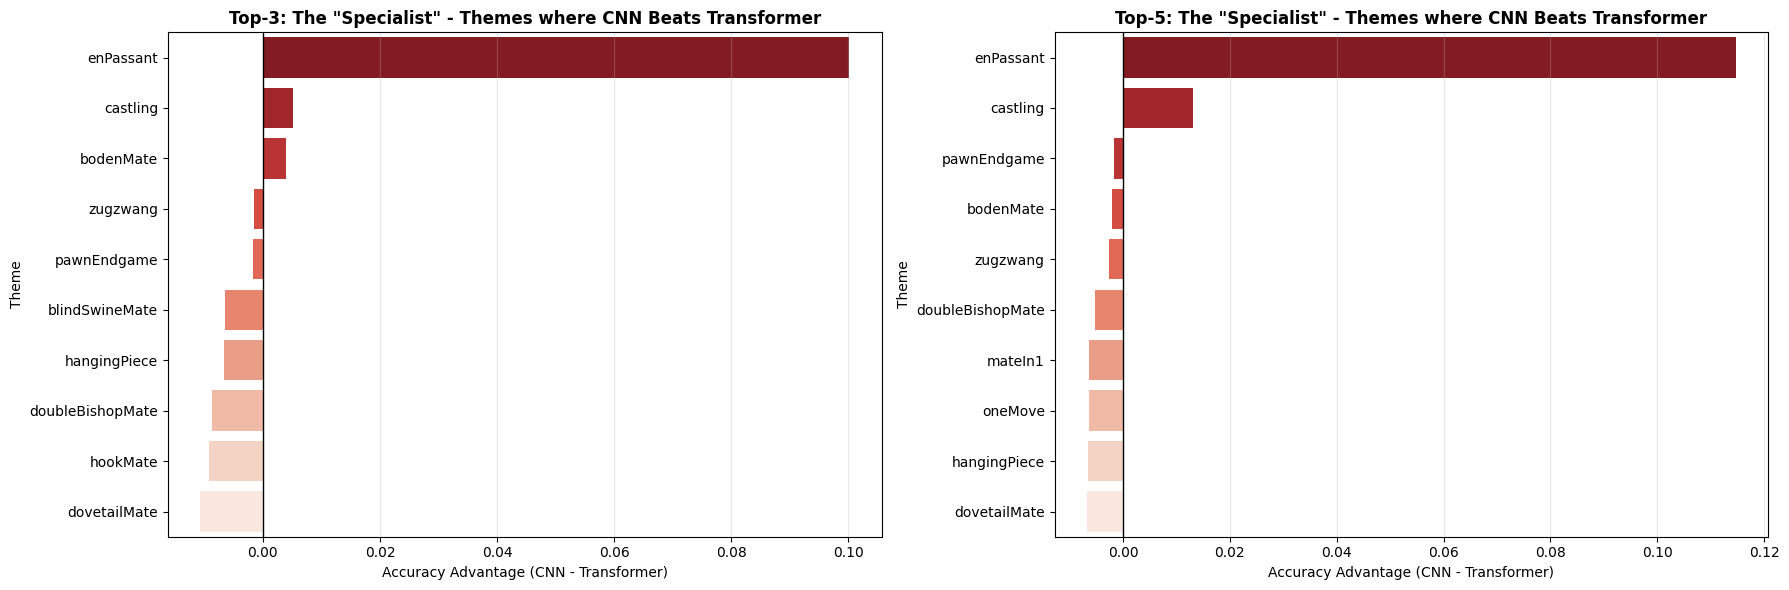


PART 2: REVENGE ANALYSIS - TRANSFORMER'S BLIND SPOTS

--- Top-3 Revenge Analysis ---
CNN 'Revenge' Count (Top-3): 166746 puzzles
Percentage of total: 2.98%
Avg Rating of Revenge Puzzles: 1787
Global Avg Rating: 1484
Rating Difference: 303

--- Top-5 Revenge Analysis ---
CNN 'Revenge' Count (Top-5): 98924 puzzles
Percentage of total: 1.77%
Avg Rating of Revenge Puzzles: 1826
Global Avg Rating: 1484
Rating Difference: 343


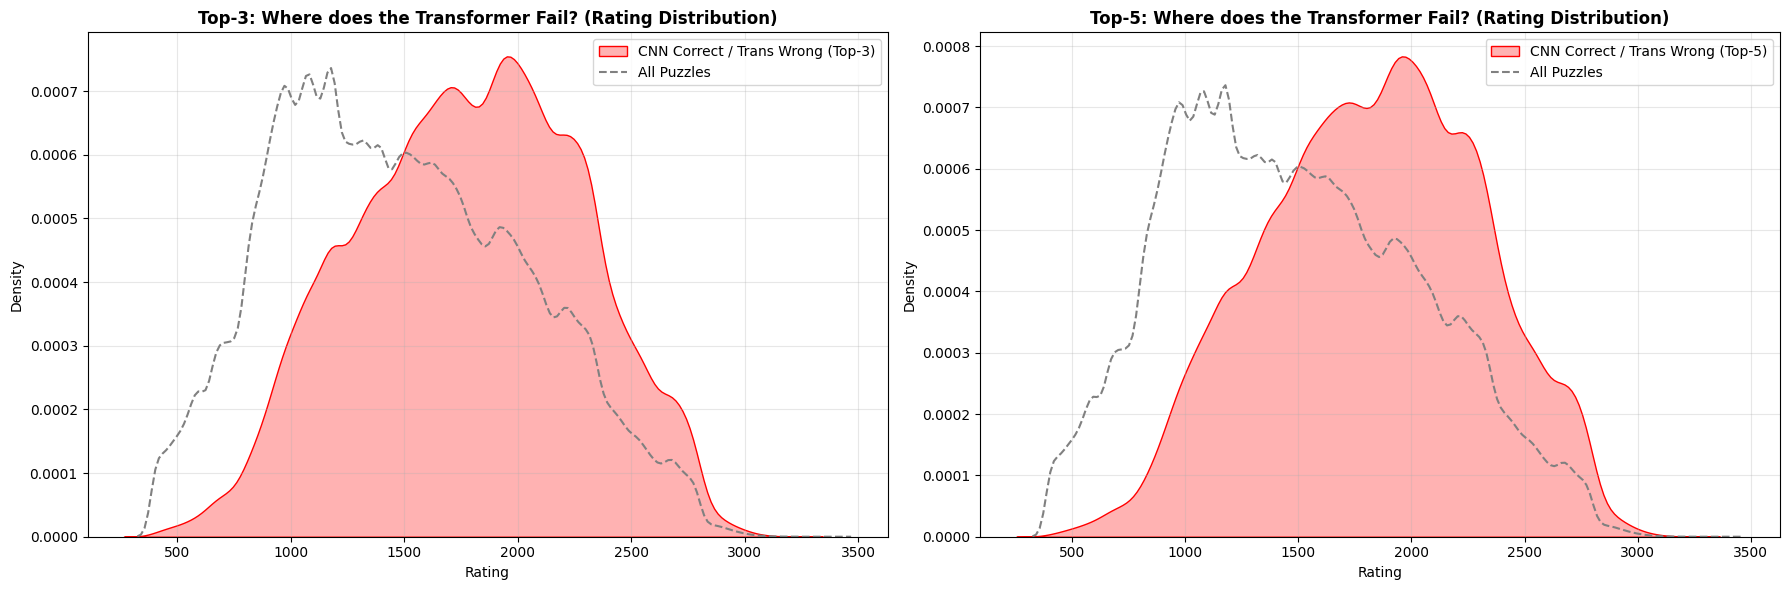

In [6]:
# Complete Analysis for Top-3 and Top-5
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# 1. THEME ANALYSIS (The "Specialist" Argument) - TOP-3
print("PART 1: THEME ANALYSIS - WHERE CNN OUTPERFORMS (TOP-3)")

# Explode themes to analyze them individually
exploded_themes_top3 = puzzles_df.dropna(subset=['Themes']).assign(Theme=puzzles_df['Themes'].str.split(' ')).explode('Theme')

# Filter for themes with at least 500 puzzles (to ensure statistical significance)
theme_counts_top3 = exploded_themes_top3['Theme'].value_counts()
valid_themes_top3 = theme_counts_top3[theme_counts_top3 > 500].index
theme_data_top3 = exploded_themes_top3[exploded_themes_top3['Theme'].isin(valid_themes_top3)]

# Calculate accuracy per theme for Top-3
theme_perf_top3 = theme_data_top3.groupby('Theme')[['cnn_first_move_correct_top3', 'transformer_first_move_correct_top3']].mean()

# Calculate "CNN Advantage" (Positive means CNN wins)
theme_perf_top3['CNN_Advantage'] = theme_perf_top3['cnn_first_move_correct_top3'] - theme_perf_top3['transformer_first_move_correct_top3']

# Get the top 10 themes where CNN is strongest
cnn_favorites_top3 = theme_perf_top3.sort_values('CNN_Advantage', ascending=False).head(10)

print("\n--- Top-3: Themes where CNN Outperforms Transformer ---")
display(cnn_favorites_top3)

# 1. THEME ANALYSIS (The "Specialist" Argument) - TOP-5
print("PART 1: THEME ANALYSIS - WHERE CNN OUTPERFORMS (TOP-5)")

# Explode themes to analyze them individually
exploded_themes_top5 = puzzles_df.dropna(subset=['Themes']).assign(Theme=puzzles_df['Themes'].str.split(' ')).explode('Theme')

# Filter for themes with at least 500 puzzles (to ensure statistical significance)
theme_counts_top5 = exploded_themes_top5['Theme'].value_counts()
valid_themes_top5 = theme_counts_top5[theme_counts_top5 > 500].index
theme_data_top5 = exploded_themes_top5[exploded_themes_top5['Theme'].isin(valid_themes_top5)]

# Calculate accuracy per theme for Top-5
theme_perf_top5 = theme_data_top5.groupby('Theme')[['cnn_first_move_correct_top5', 'transformer_first_move_correct_top5']].mean()

# Calculate "CNN Advantage" (Positive means CNN wins)
theme_perf_top5['CNN_Advantage'] = theme_perf_top5['cnn_first_move_correct_top5'] - theme_perf_top5['transformer_first_move_correct_top5']

# Get the top 10 themes where CNN is strongest
cnn_favorites_top5 = theme_perf_top5.sort_values('CNN_Advantage', ascending=False).head(10)

print("\n--- Top-5: Themes where CNN Outperforms Transformer ---")
display(cnn_favorites_top5)

# Visualization 1: CNN's Strongest Themes (Side-by-Side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Top-3
sns.barplot(x=cnn_favorites_top3['CNN_Advantage'], y=cnn_favorites_top3.index, palette='Reds_r', ax=ax1)
ax1.axvline(0, color='black', linewidth=1)
ax1.set_title('Top-3: The "Specialist" - Themes where CNN Beats Transformer', fontweight='bold')
ax1.set_xlabel('Accuracy Advantage (CNN - Transformer)')
ax1.grid(axis='x', alpha=0.3)

# Top-5
sns.barplot(x=cnn_favorites_top5['CNN_Advantage'], y=cnn_favorites_top5.index, palette='Reds_r', ax=ax2)
ax2.axvline(0, color='black', linewidth=1)
ax2.set_title('Top-5: The "Specialist" - Themes where CNN Beats Transformer', fontweight='bold')
ax2.set_xlabel('Accuracy Advantage (CNN - Transformer)')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


# 2. REVENGE ANALYSIS (The "Blind Spot" Argument)
print("\nPART 2: REVENGE ANALYSIS - TRANSFORMER'S BLIND SPOTS")

# --- TOP-3 REVENGE ANALYSIS ---
# Isolate puzzles where CNN is RIGHT (in top-3) and Transformer is WRONG
revenge_df_top3 = puzzles_df[(puzzles_df['cnn_first_move_correct_top3'] == 1) & (puzzles_df['transformer_first_move_correct_top3'] == 0)]

print("\n--- Top-3 Revenge Analysis ---")
print(f"CNN 'Revenge' Count (Top-3): {len(revenge_df_top3)} puzzles")
print(f"Percentage of total: {len(revenge_df_top3) / len(puzzles_df) * 100:.2f}%")
print(f"Avg Rating of Revenge Puzzles: {revenge_df_top3['Rating'].mean():.0f}")
print(f"Global Avg Rating: {puzzles_df['Rating'].mean():.0f}")
print(f"Rating Difference: {revenge_df_top3['Rating'].mean() - puzzles_df['Rating'].mean():.0f}")

# --- TOP-5 REVENGE ANALYSIS ---
# Isolate puzzles where CNN is RIGHT (in top-5) and Transformer is WRONG
revenge_df_top5 = puzzles_df[(puzzles_df['cnn_first_move_correct_top5'] == 1) & (puzzles_df['transformer_first_move_correct_top5'] == 0)]

print("\n--- Top-5 Revenge Analysis ---")
print(f"CNN 'Revenge' Count (Top-5): {len(revenge_df_top5)} puzzles")
print(f"Percentage of total: {len(revenge_df_top5) / len(puzzles_df) * 100:.2f}%")
print(f"Avg Rating of Revenge Puzzles: {revenge_df_top5['Rating'].mean():.0f}")
print(f"Global Avg Rating: {puzzles_df['Rating'].mean():.0f}")
print(f"Rating Difference: {revenge_df_top5['Rating'].mean() - puzzles_df['Rating'].mean():.0f}")

# --- VISUALIZATION: Distribution of Ratings (Side-by-Side) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Top-3 Distribution
sns.kdeplot(revenge_df_top3['Rating'], fill=True, color='red', label='CNN Correct / Trans Wrong (Top-3)', alpha=0.3, ax=ax1)
sns.kdeplot(puzzles_df['Rating'], linestyle='--', color='gray', label='All Puzzles', ax=ax1)
ax1.set_title('Top-3: Where does the Transformer Fail? (Rating Distribution)', fontweight='bold')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Density')
ax1.legend()
ax1.grid(alpha=0.3)

# Top-5 Distribution
sns.kdeplot(revenge_df_top5['Rating'], fill=True, color='red', label='CNN Correct / Trans Wrong (Top-5)', alpha=0.3, ax=ax2)
sns.kdeplot(puzzles_df['Rating'], linestyle='--', color='gray', label='All Puzzles', ax=ax2)
ax2.set_title('Top-5: Where does the Transformer Fail? (Rating Distribution)', fontweight='bold')
ax2.set_xlabel('Rating')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## Puzzle Solution Length Analysis (Top-3 and Top-5)

**Complexity by Move Count**: How does puzzle complexity (measured by solution length) affect top-k performance?

This analysis:
- Bins puzzles by number of moves in solution: 1-2, 3-4, 5-6, 7-10, 11+ moves
- Calculates top-3 and top-5 accuracy within each length category
- Plots accuracy curves and gap curves by puzzle length

**Why solution length matters**:
- **Short puzzles** (1-2 moves): Tactical "tricks" requiring pattern recognition
- **Long puzzles** (7+ moves): Deep calculation requiring long-horizon planning

**Key hypothesis**: If the Transformer's global attention provides strategic advantage, its lead should grow with longer solutions. If it's about local pattern matching, the gap might be constant or shrink.

PUZZLE SOLUTION LENGTH ANALYSIS - TOP-3

Top-3 Accuracy by Solution Length:


,n,cnn_acc,tr_acc,gap
puzzle_len_bin,,,,
1-2,797457,0.984812,0.996024,0.011212
3-4,2871557,0.831275,0.883807,0.052532
5-6,1466634,0.789547,0.832761,0.043214
7-10,419468,0.810987,0.847926,0.036940
11+,44970,0.849344,0.876206,0.026862



PUZZLE SOLUTION LENGTH ANALYSIS - TOP-5

Top-5 Accuracy by Solution Length:


,n,cnn_acc,tr_acc,gap
puzzle_len_bin,,,,
1-2,797457,0.991986,0.998293,0.006308
3-4,2871557,0.890866,0.935459,0.044593
5-6,1466634,0.859733,0.900621,0.040889
7-10,419468,0.878284,0.912585,0.034301
11+,44970,0.911341,0.934445,0.023104


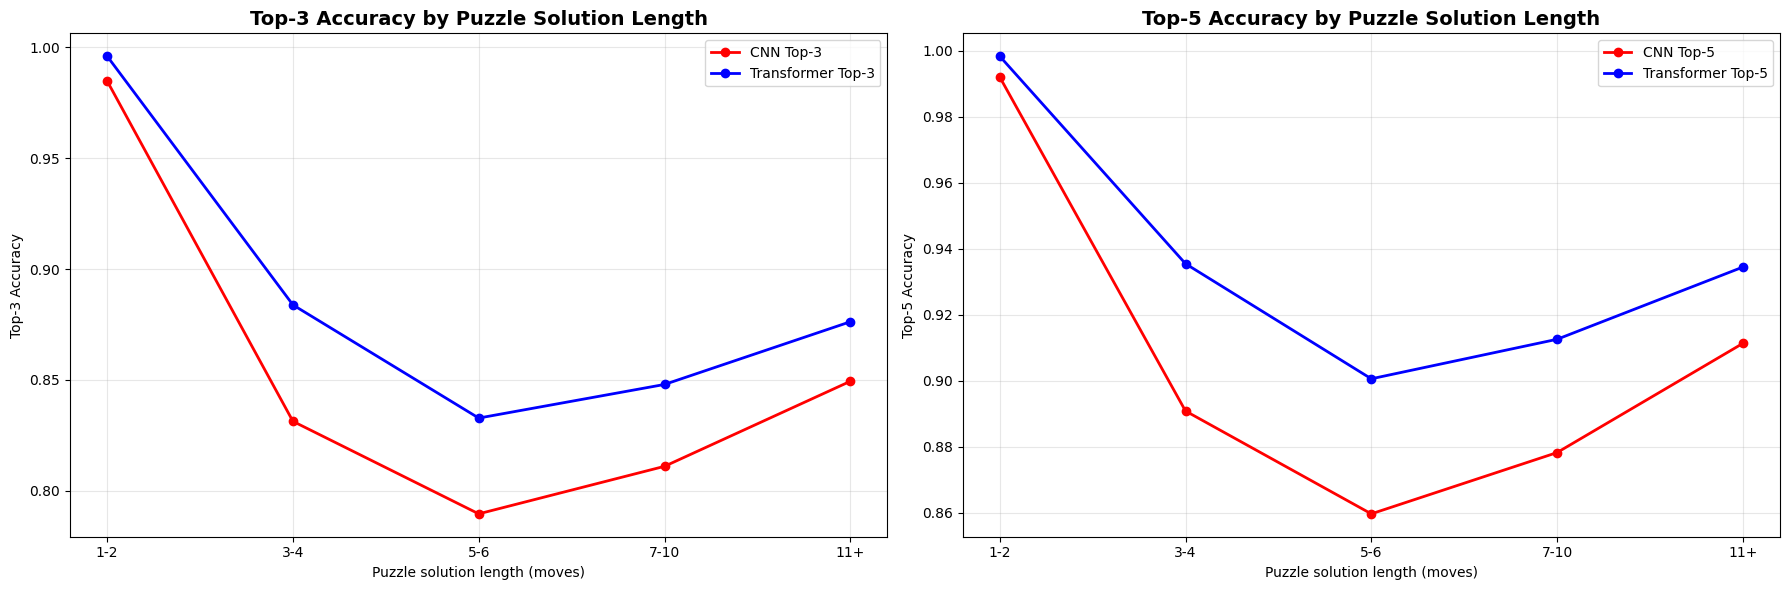

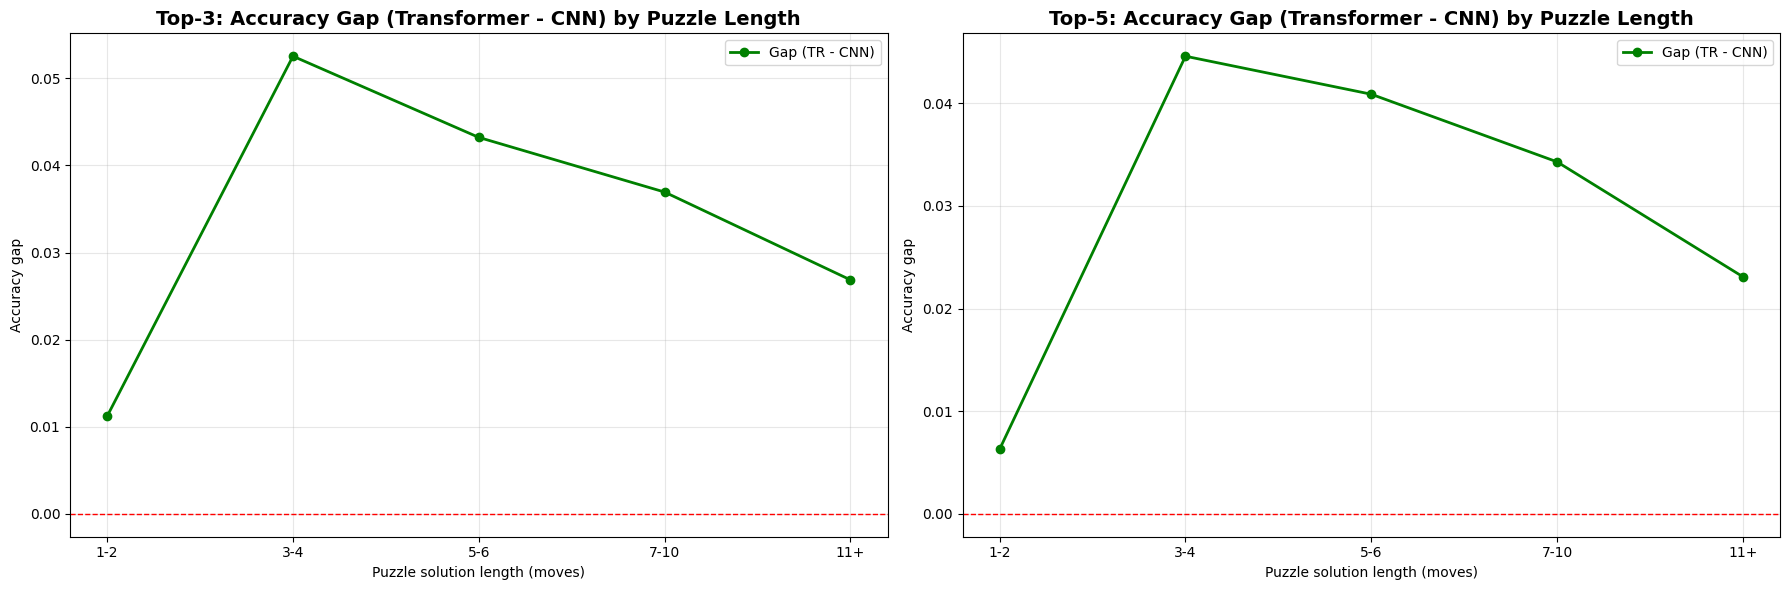

In [ ]:
# Puzzle Solution Length Analysis for Top-3 and Top-5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Build/ensure puzzle solution length ---
# Uses "solution_len" if you already made it; otherwise compute from Moves
if "solution_len" not in puzzles_df.columns:
    puzzles_df["solution_len"] = puzzles_df["Moves"].fillna("").astype(str).str.split().str.len()

# Define bins (tweak as you like)
bins = [0, 2, 4, 6, 10, 1000]
labels = ["1-2", "3-4", "5-6", "7-10", "11+"]

puzzles_df["puzzle_len_bin"] = pd.cut(puzzles_df["solution_len"], bins=bins, labels=labels)

# TOP-3 ANALYSIS
print("PUZZLE SOLUTION LENGTH ANALYSIS - TOP-3")


# Aggregate for Top-3
puz_top3 = (puzzles_df.groupby("puzzle_len_bin", observed=True)
       .agg(n=("solution_len", "size"),
            cnn_acc=("cnn_first_move_correct_top3", "mean"),
            tr_acc=("transformer_first_move_correct_top3", "mean"))
       .assign(gap=lambda t: t["tr_acc"] - t["cnn_acc"]))

print("\nTop-3 Accuracy by Solution Length:")
display(puz_top3)


# TOP-5 ANALYSIS
print("PUZZLE SOLUTION LENGTH ANALYSIS - TOP-5")


# Aggregate for Top-5
puz_top5 = (puzzles_df.groupby("puzzle_len_bin", observed=True)
       .agg(n=("solution_len", "size"),
            cnn_acc=("cnn_first_move_correct_top5", "mean"),
            tr_acc=("transformer_first_move_correct_top5", "mean"))
       .assign(gap=lambda t: t["tr_acc"] - t["cnn_acc"]))

print("\nTop-5 Accuracy by Solution Length:")
display(puz_top5)


# VISUALIZATION 1: Accuracy Curves (Side-by-Side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Top-3 Accuracy Plot
ax1.plot(puz_top3.index.astype(str), puz_top3["cnn_acc"], marker="o", label="CNN Top-3", color='red', linewidth=2)
ax1.plot(puz_top3.index.astype(str), puz_top3["tr_acc"], marker="o", label="Transformer Top-3", color='blue', linewidth=2)
ax1.set_title("Top-3 Accuracy by Puzzle Solution Length", fontweight='bold', fontsize=14)
ax1.set_xlabel("Puzzle solution length (moves)")
ax1.set_ylabel("Top-3 Accuracy")
ax1.grid(True, alpha=0.3)
ax1.legend()

# Top-5 Accuracy Plot
ax2.plot(puz_top5.index.astype(str), puz_top5["cnn_acc"], marker="o", label="CNN Top-5", color='red', linewidth=2)
ax2.plot(puz_top5.index.astype(str), puz_top5["tr_acc"], marker="o", label="Transformer Top-5", color='blue', linewidth=2)
ax2.set_title("Top-5 Accuracy by Puzzle Solution Length", fontweight='bold', fontsize=14)
ax2.set_xlabel("Puzzle solution length (moves)")
ax2.set_ylabel("Top-5 Accuracy")
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()


# VISUALIZATION 2: Accuracy Gap (Side-by-Side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Top-3 Gap Plot
ax1.plot(puz_top3.index.astype(str), puz_top3["gap"], marker="o", label="Gap (TR - CNN)", color='green', linewidth=2)
ax1.axhline(0, linestyle="--", color='red', linewidth=1)
ax1.set_title("Top-3: Accuracy Gap (Transformer - CNN) by Puzzle Length", fontweight='bold', fontsize=14)
ax1.set_xlabel("Puzzle solution length (moves)")
ax1.set_ylabel("Accuracy gap")
ax1.grid(True, alpha=0.3)
ax1.legend()

# Top-5 Gap Plot
ax2.plot(puz_top5.index.astype(str), puz_top5["gap"], marker="o", label="Gap (TR - CNN)", color='green', linewidth=2)
ax2.axhline(0, linestyle="--", color='red', linewidth=1)
ax2.set_title("Top-5: Accuracy Gap (Transformer - CNN) by Puzzle Length", fontweight='bold', fontsize=14)
ax2.set_xlabel("Puzzle solution length (moves)")
ax2.set_ylabel("Accuracy gap")
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()


## Correlation Analysis with Puzzle Features (Top-3 and Top-5)

**Feature-Performance Relationships**: How do puzzle characteristics correlate with model advantage at top-k levels?

This analysis computes **Spearman correlations** between:
- **Puzzle features**: Rating, RatingDeviation, Popularity, NbPlays, solution length
- **Outcome metrics**: Top-3 and Top-5 correctness and advantage

**Why Spearman?** It captures monotonic relationships without assuming linearity, ideal for:
- Skewed distributions (popularity, play counts)
- Ordinal relationships (rating difficulty)

**Key patterns to look for**:
- Does Transformer advantage correlate with Rating (harder = bigger gap)?
- Does popularity/play count predict which puzzles show larger differences?
- How does solution complexity (num_moves) relate to top-k performance?

Side-by-side heatmaps reveal if correlations strengthen, weaken, or persist from top-3 to top-5.

CORRELATION ANALYSIS - TOP-3


c:\Users\yothman\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)



Top-3 Spearman Correlation Matrix:


,Rating,RatingDeviation,Popularity_log,NbPlays_log,num_moves,transformer_advantage_top3
Rating,1.000000,-0.230271,-0.142801,0.081938,0.546473,0.027200
RatingDeviation,-0.230271,1.000000,-0.263940,-0.456884,-0.169074,-0.033653
Popularity_log,-0.142801,-0.263940,1.000000,0.554644,-0.027076,0.003377
NbPlays_log,0.081938,-0.456884,0.554644,1.000000,0.103265,0.020092
num_moves,0.546473,-0.169074,-0.027076,0.103265,1.000000,0.015868
transformer_advantage_top3,0.027200,-0.033653,0.003377,0.020092,0.015868,1.000000



CORRELATION ANALYSIS - TOP-5


c:\Users\yothman\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)



Top-5 Spearman Correlation Matrix:


,Rating,RatingDeviation,Popularity_log,NbPlays_log,num_moves,transformer_advantage_top5
Rating,1.000000,-0.230271,-0.142801,0.081938,0.546473,0.039312
RatingDeviation,-0.230271,1.000000,-0.263940,-0.456884,-0.169074,-0.036194
Popularity_log,-0.142801,-0.263940,1.000000,0.554644,-0.027076,0.002886
NbPlays_log,0.081938,-0.456884,0.554644,1.000000,0.103265,0.022670
num_moves,0.546473,-0.169074,-0.027076,0.103265,1.000000,0.024159
transformer_advantage_top5,0.039312,-0.036194,0.002886,0.022670,0.024159,1.000000


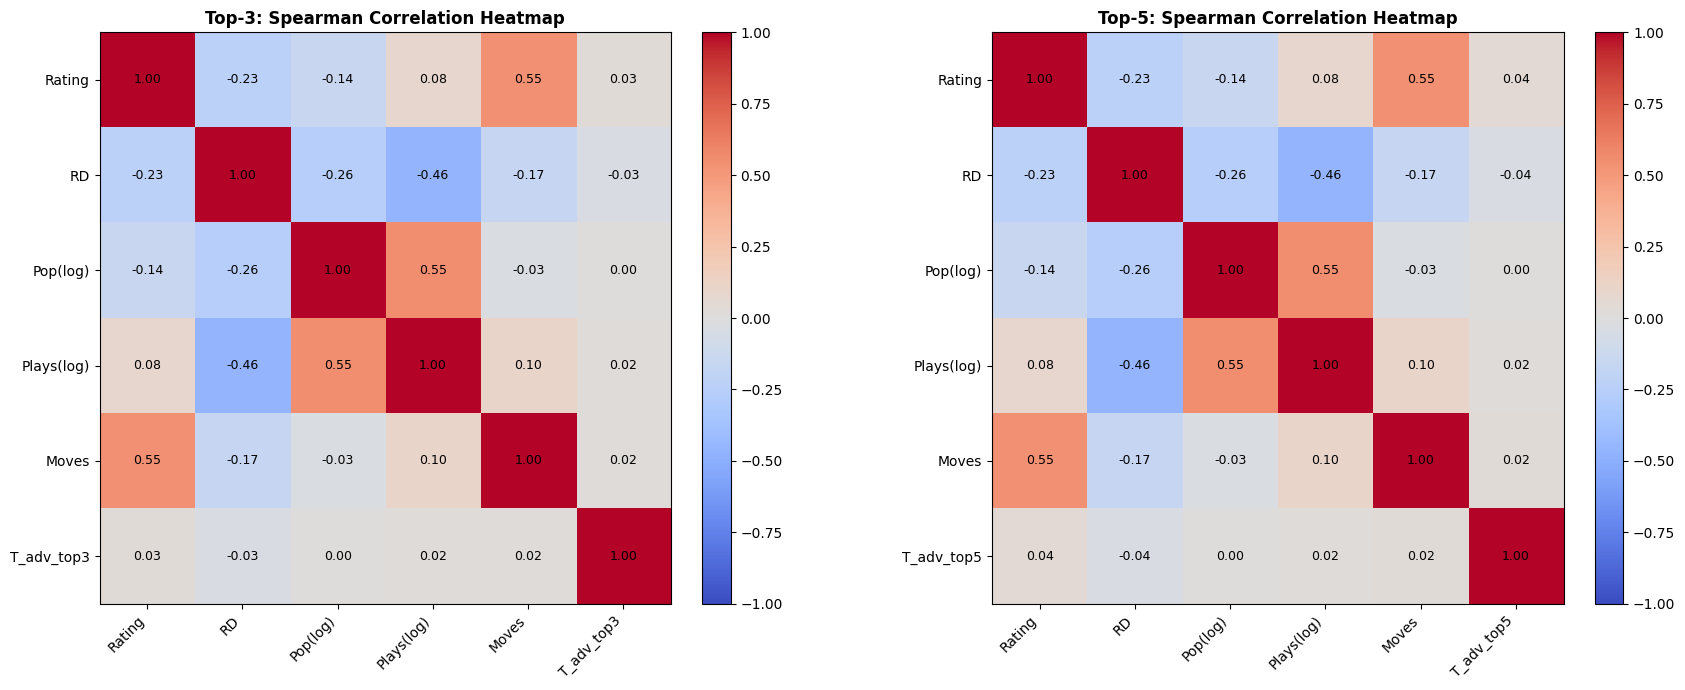


KEY INSIGHTS

Top-3 - Correlation with Transformer Advantage:
transformer_advantage_top3    1.000000
Rating                        0.027200
NbPlays_log                   0.020092
num_moves                     0.015868
Popularity_log                0.003377
RatingDeviation              -0.033653
Name: transformer_advantage_top3, dtype: float64

Top-5 - Correlation with Transformer Advantage:
transformer_advantage_top5    1.000000
Rating                        0.039312
num_moves                     0.024159
NbPlays_log                   0.022670
Popularity_log                0.002886
RatingDeviation              -0.036194
Name: transformer_advantage_top5, dtype: float64


In [ ]:
# Correlation Analysis for Top-3 and Top-5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# TOP-3 CORRELATION ANALYSIS
print("CORRELATION ANALYSIS - TOP-3")

# --- Create "transformer_advantage_top3" ---
puzzles_df['transformer_advantage_top3'] = (
    puzzles_df['transformer_first_move_correct_top3'].astype(int)
    - puzzles_df['cnn_first_move_correct_top3'].astype(int)
)

# --- Build clean numeric frame for Top-3 ---
base_cols_top3 = ['Rating', 'RatingDeviation', 'Popularity', 'NbPlays', 'num_moves', 'transformer_advantage_top3']
corr_df_top3 = puzzles_df[base_cols_top3].copy()

# Log transform
corr_df_top3['Popularity_log'] = np.log1p(corr_df_top3['Popularity'])
corr_df_top3['NbPlays_log'] = np.log1p(corr_df_top3['NbPlays'])

# Use log versions
use_cols_top3 = ['Rating', 'RatingDeviation', 'Popularity_log', 'NbPlays_log', 'num_moves', 'transformer_advantage_top3']
corr_df_top3 = corr_df_top3[use_cols_top3].dropna()

# --- Correlation (Spearman) ---
corr_top3 = corr_df_top3.corr(method='spearman')

print("\nTop-3 Spearman Correlation Matrix:")
display(corr_top3)


# TOP-5 CORRELATION ANALYSIS
print("CORRELATION ANALYSIS - TOP-5")

# --- Create "transformer_advantage_top5" ---
puzzles_df['transformer_advantage_top5'] = (
    puzzles_df['transformer_first_move_correct_top5'].astype(int)
    - puzzles_df['cnn_first_move_correct_top5'].astype(int)
)

# --- Build clean numeric frame for Top-5 ---
base_cols_top5 = ['Rating', 'RatingDeviation', 'Popularity', 'NbPlays', 'num_moves', 'transformer_advantage_top5']
corr_df_top5 = puzzles_df[base_cols_top5].copy()

# Log transform
corr_df_top5['Popularity_log'] = np.log1p(corr_df_top5['Popularity'])
corr_df_top5['NbPlays_log'] = np.log1p(corr_df_top5['NbPlays'])

# Use log versions
use_cols_top5 = ['Rating', 'RatingDeviation', 'Popularity_log', 'NbPlays_log', 'num_moves', 'transformer_advantage_top5']
corr_df_top5 = corr_df_top5[use_cols_top5].dropna()

# --- Correlation (Spearman) ---
corr_top5 = corr_df_top5.corr(method='spearman')

print("\nTop-5 Spearman Correlation Matrix:")
display(corr_top5)


# VISUALIZATION: Heatmaps (Side-by-Side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

pretty_labels_top3 = ['Rating', 'RD', 'Pop(log)', 'Plays(log)', 'Moves', 'T_adv_top3']
pretty_labels_top5 = ['Rating', 'RD', 'Pop(log)', 'Plays(log)', 'Moves', 'T_adv_top5']

# Top-3 Heatmap
im1 = ax1.imshow(corr_top3.values, vmin=-1, vmax=1, cmap='coolwarm')
ax1.set_xticks(np.arange(len(use_cols_top3)))
ax1.set_yticks(np.arange(len(use_cols_top3)))
ax1.set_xticklabels(pretty_labels_top3, rotation=45, ha='right')
ax1.set_yticklabels(pretty_labels_top3)

# Annotate cells for Top-3
for i in range(corr_top3.shape[0]):
    for j in range(corr_top3.shape[1]):
        ax1.text(j, i, f"{corr_top3.values[i, j]:.2f}", ha='center', va='center', fontsize=9)

ax1.set_title("Top-3: Spearman Correlation Heatmap", fontweight='bold', fontsize=12)
plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

# Top-5 Heatmap
im2 = ax2.imshow(corr_top5.values, vmin=-1, vmax=1, cmap='coolwarm')
ax2.set_xticks(np.arange(len(use_cols_top5)))
ax2.set_yticks(np.arange(len(use_cols_top5)))
ax2.set_xticklabels(pretty_labels_top5, rotation=45, ha='right')
ax2.set_yticklabels(pretty_labels_top5)

# Annotate cells for Top-5
for i in range(corr_top5.shape[0]):
    for j in range(corr_top5.shape[1]):
        ax2.text(j, i, f"{corr_top5.values[i, j]:.2f}", ha='center', va='center', fontsize=9)

ax2.set_title("Top-5: Spearman Correlation Heatmap", fontweight='bold', fontsize=12)
plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


## KL Divergence Theme Analysis (Top-3 and Top-5)

**Cognitive Signatures via Information Theory**: Which tactical themes are most characteristic of each model's unique successes at top-k levels?

### Methodology:
1. Create **disagreement sets**:
   - TR-only: Transformer correct within top-k, CNN wrong
   - CNN-only: CNN correct within top-k, Transformer wrong

2. Calculate **theme distributions** in each set (top 25 most frequent themes)

3. Compute **KL Divergence** D(P || Q) where:
   - P = theme distribution in TR-only wins
   - Q = theme distribution in CNN-only wins
   - **Positive KL**: Themes over-represented in Transformer's unique wins
   - **Negative KL**: Themes over-represented in CNN's unique wins

4. Plot **KL contributions** (in bits) to identify signature themes

**Interpretation**: High KL themes reveal what makes each model's unique wins special—tactical patterns that define their "cognitive fingerprint" when considering multiple candidate moves.

KL DIVERGENCE ANALYSIS - TOP-3

Top-3 TR-only wins: 406618
Top-3 CNN-only wins: 166746

Top-3 KL Contribution (Top 25 Themes):


,Theme,KL_Contribution
0,short,0.024167
21,deflection,0.021479
19,discoveredAttack,0.014295
8,mateIn1,0.010552
7,oneMove,0.010434
1,endgame,0.009475
17,pin,0.007065
10,fork,0.005750
5,advantage,0.005036
9,master,0.001289



KL DIVERGENCE ANALYSIS - TOP-5

Top-5 TR-only wins: 307402
Top-5 CNN-only wins: 98924

Top-5 KL Contribution (Top 25 Themes):


,Theme,KL_Contribution
0,short,0.030733
21,deflection,0.025964
19,discoveredAttack,0.016862
1,endgame,0.014549
5,advantage,0.009214
8,mateIn1,0.008205
7,oneMove,0.008033
10,fork,0.005352
17,pin,0.005142
3,crushing,0.002393


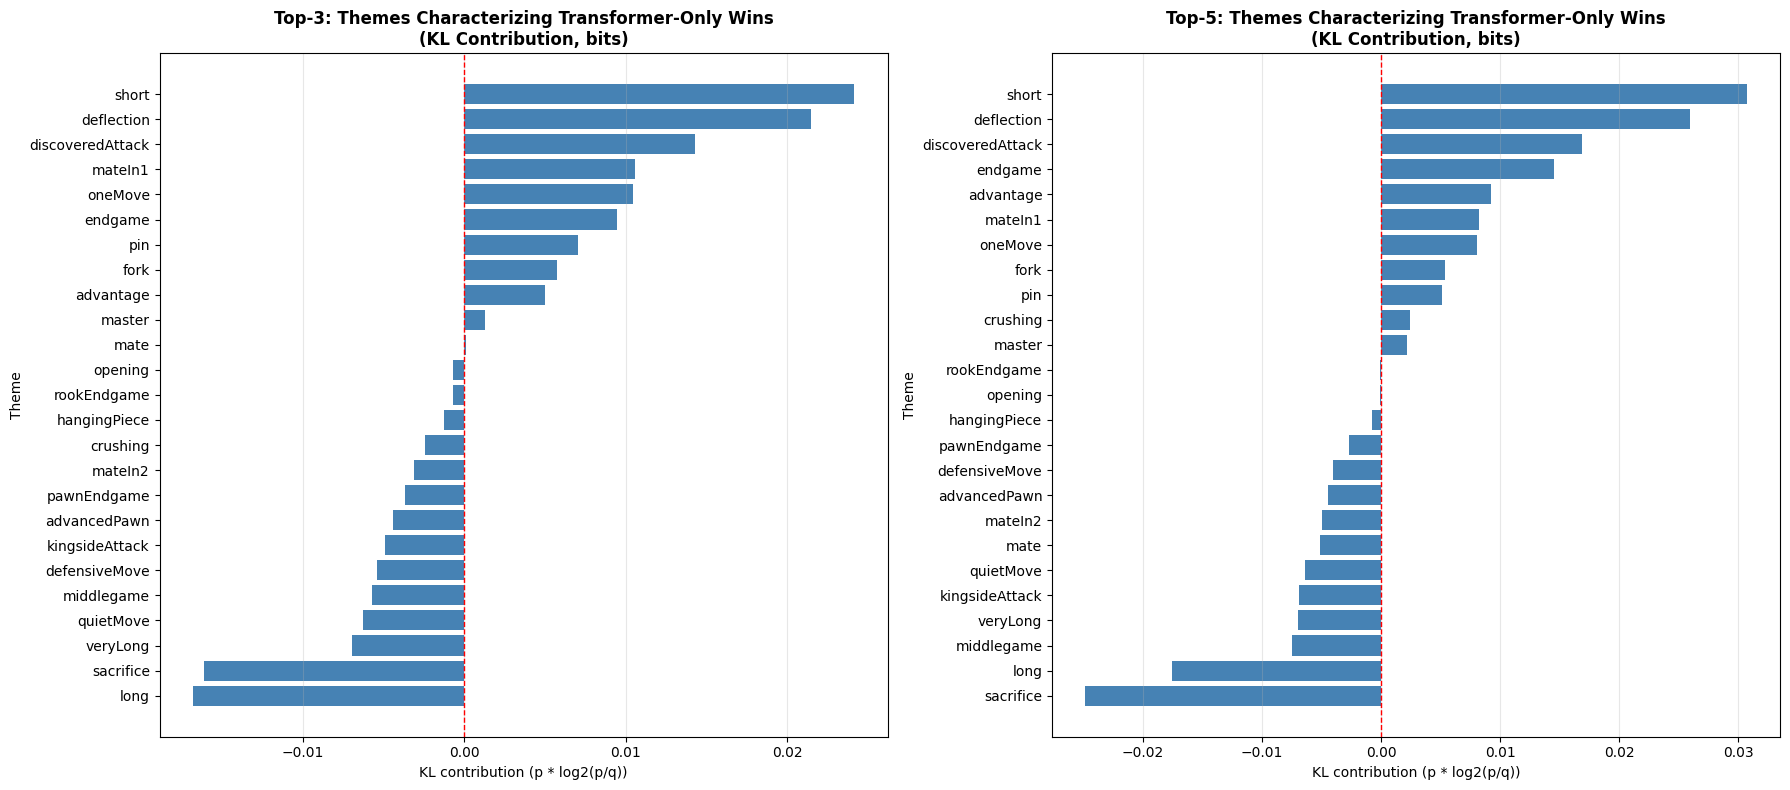


SUMMARY STATISTICS

Top-3 Total KL Divergence: 0.0314 bits
Top-5 Total KL Divergence: 0.0362 bits

Top-3 - Top 5 Themes by KL Contribution:
           Theme  KL_Contribution
           short         0.024167
      deflection         0.021479
discoveredAttack         0.014295
         mateIn1         0.010552
         oneMove         0.010434

Top-5 - Top 5 Themes by KL Contribution:
           Theme  KL_Contribution
           short         0.030733
      deflection         0.025964
discoveredAttack         0.016862
         endgame         0.014549
       advantage         0.009214


In [ ]:
# KL Divergence Analysis for Top-3 and Top-5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# TOP-3 KL DIVERGENCE ANALYSIS
print("KL DIVERGENCE ANALYSIS - TOP-3")


# Disagreement sets for Top-3
tr_only_top3 = puzzles_df[(puzzles_df["transformer_first_move_correct_top3"] == 1) &
                          (puzzles_df["cnn_first_move_correct_top3"] == 0)].copy()

cnn_only_top3 = puzzles_df[(puzzles_df["cnn_first_move_correct_top3"] == 1) &
                           (puzzles_df["transformer_first_move_correct_top3"] == 0)].copy()

print(f"\nTop-3 TR-only wins: {len(tr_only_top3)}")
print(f"Top-3 CNN-only wins: {len(cnn_only_top3)}")

def theme_counts(df):
    s = df["Themes"].fillna("").astype(str).str.split()
    exploded = s.explode()
    exploded = exploded[exploded.ne("")]  # remove empties
    return exploded.value_counts()

# Vocabulary: top K themes overall
K = 25
all_top = theme_counts(puzzles_df).head(K).index

# Top-3 distributions
dist_tr_top3 = theme_counts(tr_only_top3).reindex(all_top).fillna(0)
dist_cnn_top3 = theme_counts(cnn_only_top3).reindex(all_top).fillna(0)

# Proper epsilon smoothing
eps = 1e-9
p_top3 = (dist_tr_top3 + eps) / (dist_tr_top3 + eps).sum()
q_top3 = (dist_cnn_top3 + eps) / (dist_cnn_top3 + eps).sum()

# KL contributions (in bits)
kl_contrib_top3 = p_top3 * np.log2(p_top3 / q_top3)

kl_df_top3 = (pd.DataFrame({"Theme": all_top, "KL_Contribution": kl_contrib_top3.values})
              .sort_values("KL_Contribution", ascending=False))

print("\nTop-3 KL Contribution (Top 25 Themes):")
display(kl_df_top3.head(25))


# TOP-5 KL DIVERGENCE ANALYSIS
print("KL DIVERGENCE ANALYSIS - TOP-5")

# Disagreement sets for Top-5
tr_only_top5 = puzzles_df[(puzzles_df["transformer_first_move_correct_top5"] == 1) &
                          (puzzles_df["cnn_first_move_correct_top5"] == 0)].copy()

cnn_only_top5 = puzzles_df[(puzzles_df["cnn_first_move_correct_top5"] == 1) &
                           (puzzles_df["transformer_first_move_correct_top5"] == 0)].copy()

print(f"\nTop-5 TR-only wins: {len(tr_only_top5)}")
print(f"Top-5 CNN-only wins: {len(cnn_only_top5)}")

# Top-5 distributions
dist_tr_top5 = theme_counts(tr_only_top5).reindex(all_top).fillna(0)
dist_cnn_top5 = theme_counts(cnn_only_top5).reindex(all_top).fillna(0)

# Proper epsilon smoothing
p_top5 = (dist_tr_top5 + eps) / (dist_tr_top5 + eps).sum()
q_top5 = (dist_cnn_top5 + eps) / (dist_cnn_top5 + eps).sum()

# KL contributions (in bits)
kl_contrib_top5 = p_top5 * np.log2(p_top5 / q_top5)

kl_df_top5 = (pd.DataFrame({"Theme": all_top, "KL_Contribution": kl_contrib_top5.values})
              .sort_values("KL_Contribution", ascending=False))

print("\nTop-5 KL Contribution (Top 25 Themes):")
display(kl_df_top5.head(25))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Top-3 Plot
ax1.barh(kl_df_top3["Theme"][::-1], kl_df_top3["KL_Contribution"][::-1], color='steelblue')
ax1.axvline(0, linestyle="--", linewidth=1, color='red')
ax1.set_title("Top-3: Themes Characterizing Transformer-Only Wins\n(KL Contribution, bits)", 
              fontweight='bold', fontsize=12)
ax1.set_xlabel("KL contribution (p * log2(p/q))")
ax1.set_ylabel("Theme")
ax1.grid(axis='x', alpha=0.3)

# Top-5 Plot
ax2.barh(kl_df_top5["Theme"][::-1], kl_df_top5["KL_Contribution"][::-1], color='steelblue')
ax2.axvline(0, linestyle="--", linewidth=1, color='red')
ax2.set_title("Top-5: Themes Characterizing Transformer-Only Wins\n(KL Contribution, bits)", 
              fontweight='bold', fontsize=12)
ax2.set_xlabel("KL contribution (p * log2(p/q))")
ax2.set_ylabel("Theme")
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()



## Binned KL Divergence: Rating Analysis (Top-3 and Top-5)

**Difficulty-Based Cognitive Signatures**: Which difficulty levels are most characteristic of each model's top-k unique wins?

### Methodology:
1. Create **10 rating bins** from <800 to 2600+ (difficulty spectrum)

2. For each model's unique win set (top-3 and top-5):
   - Calculate rating distribution across bins
   - Compute KL Divergence contributions

3. Visualize **horizontal bar charts** showing:
   - **Positive values**: Rating ranges over-represented in Transformer-only wins
   - **Negative values**: Rating ranges over-represented in CNN-only wins

4. Filter for **statistical significance** (>10k puzzles per bin)

**Key questions**:
- Does the Transformer dominate easy puzzles (short-horizon tactics)?
- Does the CNN specialize in hard puzzles (deep calculation)?
- Do these patterns persist or shift from top-3 to top-5?

**Expected insight**: KL divergence reveals not just "where" models differ, but which difficulty ranges define their unique strategic niches.

BINNED KL DIVERGENCE ANALYSIS (RATING) - TOP-3

Top-3 TR-only wins: 406618
Top-3 CNN-only wins: 166746
Top-3 Rating distribution (TR-only vs CNN-only)  KL(P||Q) = 0.051220 bits

Top-3 Rating KL Contributions:


,bin,P_TR_only,Q_CNN_only,support,KL_contrib_bits
2,1k-1.2k,0.111872,0.081633,59101,0.050859
3,1.2-1.4k,0.127803,0.097759,68268,0.049410
4,1.4-1.6k,0.144561,0.120531,78879,0.037915
1,800-1k,0.063910,0.043000,33157,0.036539
0,<800,0.023275,0.016384,12196,0.011788
5,1.6-1.8k,0.146718,0.139032,82841,0.011389
9,2.6k+,0.030395,0.047701,20313,-0.019763
6,1.8-2.0k,0.127508,0.144279,75905,-0.022732
7,2.0-2.2k,0.103382,0.134180,64411,-0.038891
8,2.2-2.6k,0.120578,0.175500,78293,-0.065294



BINNED KL DIVERGENCE ANALYSIS (RATING) - TOP-5

Top-5 TR-only wins: 307402
Top-5 CNN-only wins: 98924
Top-5 Rating distribution (TR-only vs CNN-only)  KL(P||Q) = 0.064724 bits

Top-5 Rating KL Contributions:


,bin,P_TR_only,Q_CNN_only,support,KL_contrib_bits
2,1k-1.2k,0.107625,0.070731,40081,0.065176
3,1.2-1.4k,0.125282,0.090999,47514,0.057787
4,1.4-1.6k,0.145773,0.120395,56721,0.040225
1,800-1k,0.055611,0.034259,20484,0.038867
5,1.6-1.8k,0.149960,0.140017,59949,0.014843
0,<800,0.017153,0.011858,6446,0.009137
9,2.6k+,0.032632,0.054486,15421,-0.024135
6,1.8-2.0k,0.131369,0.150176,55239,-0.025358
7,2.0-2.2k,0.107849,0.140219,47024,-0.040839
8,2.2-2.6k,0.126746,0.186861,57447,-0.070981


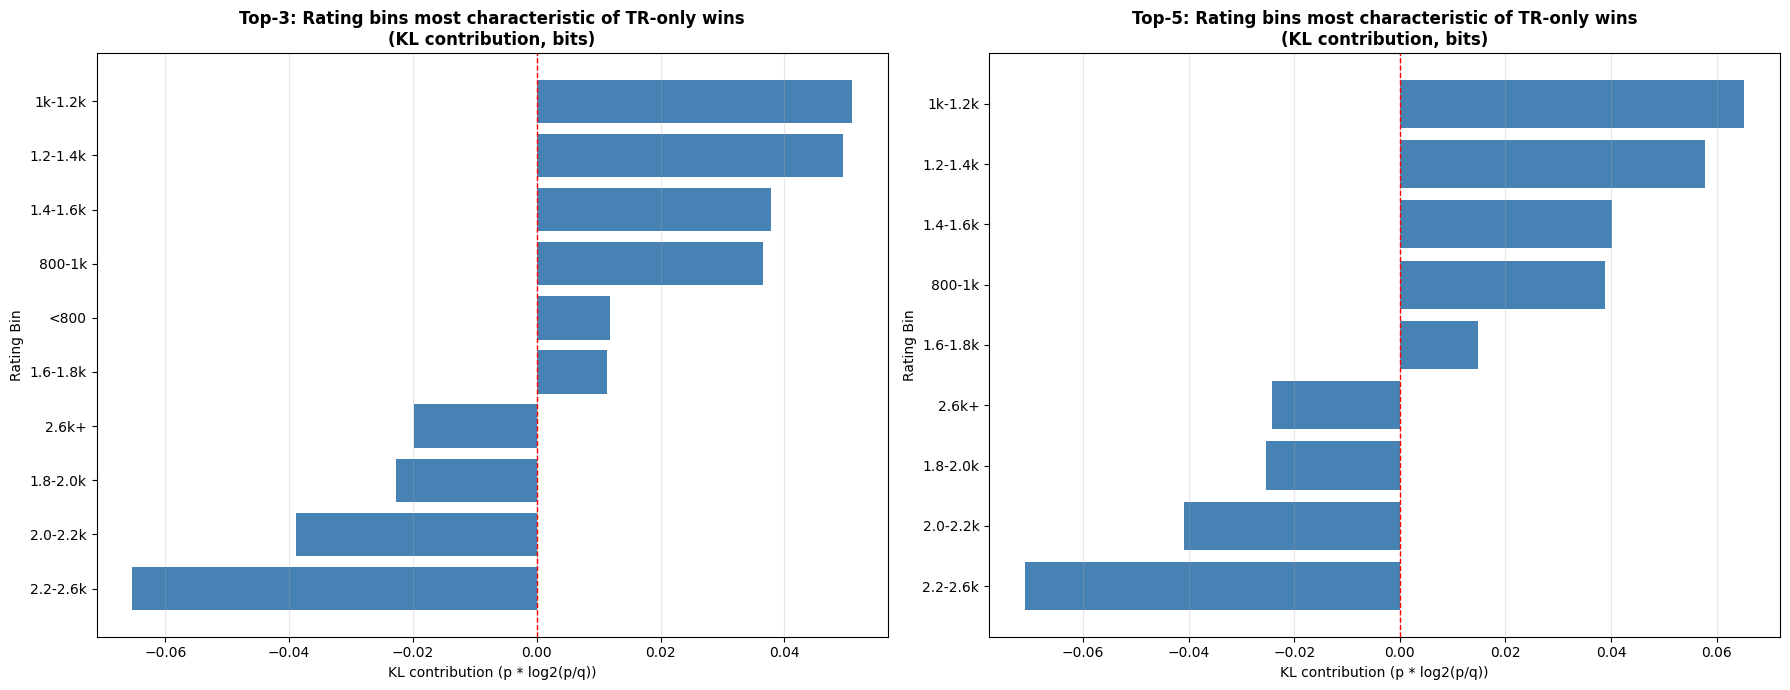

In [ ]:
# Binned KL Divergence Analysis (Rating) for Top-3 and Top-5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

eps = 1e-9

# --- Define the kl_binned function ---
def kl_binned(P_vals, Q_vals, bins, labels=None, title=""):
    # bin values
    P_bin = pd.cut(P_vals, bins=bins, labels=labels, include_lowest=True)
    Q_bin = pd.cut(Q_vals, bins=bins, labels=labels, include_lowest=True)

    # counts aligned on same bins
    p_counts = P_bin.value_counts().sort_index()
    q_counts = Q_bin.value_counts().sort_index()
    all_bins = p_counts.index.union(q_counts.index)

    p_counts = p_counts.reindex(all_bins).fillna(0)
    q_counts = q_counts.reindex(all_bins).fillna(0)

    # smoothed probabilities
    p = (p_counts + eps) / (p_counts + eps).sum()
    q = (q_counts + eps) / (q_counts + eps).sum()

    # per-bin KL contributions + total KL (in bits)
    contrib = p * np.log2(p / q)
    KL = float(contrib.sum())

    out = pd.DataFrame({
        "bin": all_bins.astype(str),
        "P_TR_only": p.values,
        "Q_CNN_only": q.values,
        "support": (p_counts + q_counts).values,
        "KL_contrib_bits": contrib.values
    }).sort_values("KL_contrib_bits", ascending=False)

    print(f"{title}  KL(P||Q) = {KL:.6f} bits")
    return out, KL

# TOP-3 RATING BINNED KL DIVERGENCE
print("BINNED KL DIVERGENCE ANALYSIS (RATING) - TOP-3")
# Disagreement sets for Top-3
tr_only_top3 = puzzles_df[(puzzles_df["transformer_first_move_correct_top3"] == 1) &
                          (puzzles_df["cnn_first_move_correct_top3"] == 0)].copy()

cnn_only_top3 = puzzles_df[(puzzles_df["cnn_first_move_correct_top3"] == 1) &
                           (puzzles_df["transformer_first_move_correct_top3"] == 0)].copy()

print(f"\nTop-3 TR-only wins: {len(tr_only_top3)}")
print(f"Top-3 CNN-only wins: {len(cnn_only_top3)}")

# Rating bins
rating_bins = [0, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2600, 4000]
rating_labels = ["<800","800-1k","1k-1.2k","1.2-1.4k","1.4-1.6k","1.6-1.8k","1.8-2.0k","2.0-2.2k","2.2-2.6k","2.6k+"]

rating_df_top3, KL_rating_top3 = kl_binned(
    tr_only_top3["Rating"], cnn_only_top3["Rating"],
    bins=rating_bins, labels=rating_labels,
    title="Top-3 Rating distribution (TR-only vs CNN-only)"
)

print("\nTop-3 Rating KL Contributions:")
display(rating_df_top3)


# TOP-5 RATING BINNED KL DIVERGENCE
print("BINNED KL DIVERGENCE ANALYSIS (RATING) - TOP-5")

# Disagreement sets for Top-5
tr_only_top5 = puzzles_df[(puzzles_df["transformer_first_move_correct_top5"] == 1) &
                          (puzzles_df["cnn_first_move_correct_top5"] == 0)].copy()

cnn_only_top5 = puzzles_df[(puzzles_df["cnn_first_move_correct_top5"] == 1) &
                           (puzzles_df["transformer_first_move_correct_top5"] == 0)].copy()

print(f"\nTop-5 TR-only wins: {len(tr_only_top5)}")
print(f"Top-5 CNN-only wins: {len(cnn_only_top5)}")

rating_df_top5, KL_rating_top5 = kl_binned(
    tr_only_top5["Rating"], cnn_only_top5["Rating"],
    bins=rating_bins, labels=rating_labels,
    title="Top-5 Rating distribution (TR-only vs CNN-only)"
)

print("\nTop-5 Rating KL Contributions:")
display(rating_df_top5)

# VISUALIZATION: Side-by-Side Bar Charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Filter bins with sufficient support
plot_df_top3 = rating_df_top3[rating_df_top3["support"] > 10_000].head(12).sort_values("KL_contrib_bits")
plot_df_top5 = rating_df_top5[rating_df_top5["support"] > 10_000].head(12).sort_values("KL_contrib_bits")

# Top-3 Plot
ax1.barh(plot_df_top3["bin"], plot_df_top3["KL_contrib_bits"], color='steelblue')
ax1.axvline(0, linestyle="--", linewidth=1, color='red')
ax1.set_title("Top-3: Rating bins most characteristic of TR-only wins\n(KL contribution, bits)", 
              fontweight='bold', fontsize=12)
ax1.set_xlabel("KL contribution (p * log2(p/q))")
ax1.set_ylabel("Rating Bin")
ax1.grid(axis='x', alpha=0.3)

# Top-5 Plot
ax2.barh(plot_df_top5["bin"], plot_df_top5["KL_contrib_bits"], color='steelblue')
ax2.axvline(0, linestyle="--", linewidth=1, color='red')
ax2.set_title("Top-5: Rating bins most characteristic of TR-only wins\n(KL contribution, bits)", 
              fontweight='bold', fontsize=12)
ax2.set_xlabel("KL contribution (p * log2(p/q))")
ax2.set_ylabel("Rating Bin")
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()



## KL Divergence: Solution Length Analysis (Top-3 and Top-5)

**Complexity-Based Cognitive Signatures**: Which puzzle lengths are most characteristic of each model's unique top-k wins?

### Methodology:
1. Create **solution length bins**: 1-2, 3-4, 5-6, 7-10, 11-15, 16-25, 26+ moves

2. For disagreement sets (TR-only vs CNN-only at top-3 and top-5):
   - Calculate length distributions
   - Compute KL Divergence D(P || Q) per bin

3. Visualize KL contributions showing:
   - **Positive**: Lengths where Transformer uniquely succeeds
   - **Negative**: Lengths where CNN uniquely succeeds

**Critical test**: Does the Transformer's advantage come from:
- **Short puzzles** (1-2 moves): Pattern recognition, immediate tactics
- **Long puzzles** (7+ moves): Strategic depth, calculation trees

**Expected insight**: If Transformer dominates short puzzles, its advantage is about "tactical consistency" (higher floor). If it dominates long puzzles, it's about "strategic vision" (global attention). The truth will reveal the architecture's core strength.

=== Top-3 Solution Length KL Divergence ===


,bin,P_prob,Q_prob,KL_contrib_bits,support
0,3-4,0.586155,0.524702,0.043557,238341
1,5-6,0.302864,0.358455,0.093657,123150
2,7-10,0.079109,0.099984,-0.073633,32167
3,1-2,0.025073,0.008150,-0.026728,10195
4,11-15,0.005880,0.007520,-0.002769,2391
5,16-25,0.000917,0.001163,-0.000315,373
6,26+,0.000002,0.000024,-0.000008,1


Total KL Divergence (Top-3): 0.0338 bits

=== Top-5 Solution Length KL Divergence ===


,bin,P_prob,Q_prob,KL_contrib_bits,support
0,3-4,5.790496e-01,0.504923,3.357723e-02,178001
1,5-6,3.171873e-01,0.379433,1.144338e-01,97504
2,7-10,7.954405e-02,0.101735,-8.199581e-02,24452
3,1-2,1.794068e-02,0.007966,-2.823698e-02,5515
4,11-15,5.468410e-03,0.004903,-2.967607e-03,1681
5,16-25,8.100152e-04,0.001011,-2.588711e-04,249
6,26+,1.000000e-09,0.000030,-1.488833e-08,0


Total KL Divergence (Top-5): 0.0346 bits



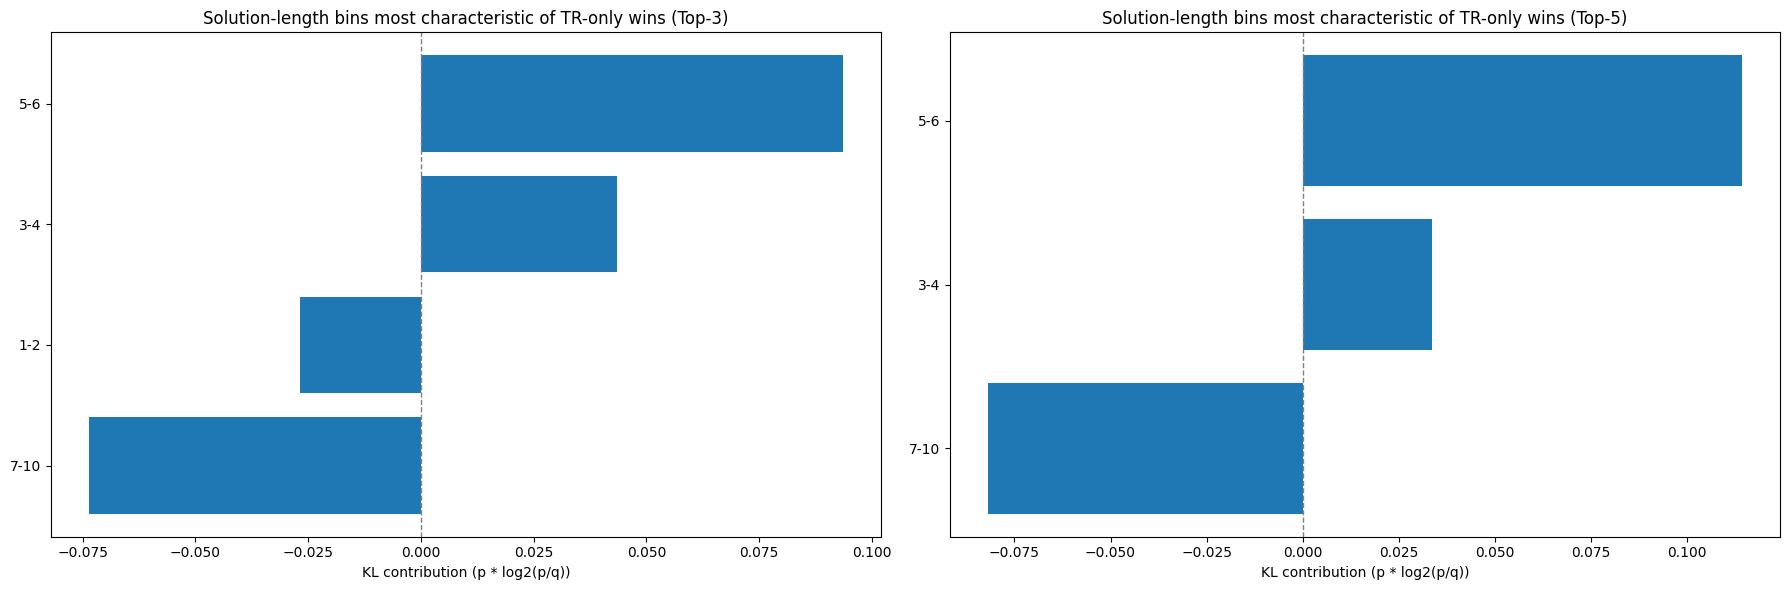

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# KL Divergence Solution Length Analysis for Top-3 and Top-5

def kl_binned(P_vals, Q_vals, bins, labels, title):
    """
    Compute KL divergence per bin (P || Q).
    Returns a DataFrame with bin, P_prob, Q_prob, KL_contrib_bits, support.
    """
    P_binned = pd.cut(P_vals, bins=bins, labels=labels, include_lowest=True)
    Q_binned = pd.cut(Q_vals, bins=bins, labels=labels, include_lowest=True)
    
    P_counts = P_binned.value_counts()
    Q_counts = Q_binned.value_counts()
    
    # Normalize to probabilities
    eps = 1e-9
    P_prob = (P_counts / P_counts.sum()).fillna(0) + eps
    Q_prob = (Q_counts / Q_counts.sum()).fillna(0) + eps
    
    # KL contribution per bin (in bits)
    kl_contrib = P_prob * np.log2(P_prob / Q_prob)
    
    df = pd.DataFrame({
        'bin': P_prob.index,
        'P_prob': P_prob.values,
        'Q_prob': Q_prob.values,
        'KL_contrib_bits': kl_contrib.values,
        'support': P_counts.values
    })
    
    total_kl = kl_contrib.sum()
    return df, total_kl

# Make sure solution_len exists
if "solution_len" not in puzzles_df.columns:
    puzzles_df["solution_len"] = puzzles_df["Moves"].fillna("").astype(str).str.split().str.len()

# Length bins
len_bins = [0, 2, 4, 6, 10, 15, 25, 10_000]
len_labels = ["1-2","3-4","5-6","7-10","11-15","16-25","26+"]

# Top-3 Analysis
tr_only_top3 = puzzles_df[(puzzles_df["transformer_first_move_correct_top3"] == 1) &
                          (puzzles_df["cnn_first_move_correct_top3"] == 0)].copy()

cnn_only_top3 = puzzles_df[(puzzles_df["cnn_first_move_correct_top3"] == 1) &
                           (puzzles_df["transformer_first_move_correct_top3"] == 0)].copy()

len_df_top3, KL_len_top3 = kl_binned(
    tr_only_top3["solution_len"], cnn_only_top3["solution_len"],
    bins=len_bins, labels=len_labels,
    title="Solution length distribution (TR-only vs CNN-only) - Top-3"
)

# Top-5 Analysis
tr_only_top5 = puzzles_df[(puzzles_df["transformer_first_move_correct_top5"] == 1) &
                          (puzzles_df["cnn_first_move_correct_top5"] == 0)].copy()

cnn_only_top5 = puzzles_df[(puzzles_df["cnn_first_move_correct_top5"] == 1) &
                           (puzzles_df["transformer_first_move_correct_top5"] == 0)].copy()

len_df_top5, KL_len_top5 = kl_binned(
    tr_only_top5["solution_len"], cnn_only_top5["solution_len"],
    bins=len_bins, labels=len_labels,
    title="Solution length distribution (TR-only vs CNN-only) - Top-5"
)

# Display results
print("=== Top-3 Solution Length KL Divergence ===")
display(len_df_top3)
print(f"Total KL Divergence (Top-3): {KL_len_top3:.4f} bits\n")

print("=== Top-5 Solution Length KL Divergence ===")
display(len_df_top5)
print(f"Total KL Divergence (Top-5): {KL_len_top5:.4f} bits\n")

# Side-by-side visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Top-3 plot
plot_df_top3 = len_df_top3[len_df_top3["support"] > 10_000].head(12).sort_values("KL_contrib_bits")
ax1.barh(plot_df_top3["bin"], plot_df_top3["KL_contrib_bits"])
ax1.axvline(0, linestyle="--", linewidth=1, color='gray')
ax1.set_title("Solution-length bins most characteristic of TR-only wins (Top-3)", fontsize=12)
ax1.set_xlabel("KL contribution (p * log2(p/q))")

# Top-5 plot
plot_df_top5 = len_df_top5[len_df_top5["support"] > 10_000].head(12).sort_values("KL_contrib_bits")
ax2.barh(plot_df_top5["bin"], plot_df_top5["KL_contrib_bits"])
ax2.axvline(0, linestyle="--", linewidth=1, color='gray')
ax2.set_title("Solution-length bins most characteristic of TR-only wins (Top-5)", fontsize=12)
ax2.set_xlabel("KL contribution (p * log2(p/q))")

plt.tight_layout()
plt.show()

# Insights (Top-3 and Top-5): 

**Transformer Signature (Positive KL)**: Characterized by Fundamentals & Breadth. The Transformer excels in short, mateIn1, and oneMove puzzles, primarily at lower ratings (<1600 Elo). With top-3 and top-5 predictions, the Transformer maintains its advantage in tactical fundamentals, with even larger unique win support compared to top-1.

**CNN Signature (Negative KL)**: Characterized by Complexity & Depth. The CNN specializes in long and veryLong puzzles (5+ moves) and high-rated challenges (>2200 Elo). It also leads in "quiet" positional motifs like quietMove and defensiveMove, though this advantage may narrow with top-3/top-5 predictions.

Our KL Divergence analysis at top-3 and top-5 levels reveals the same **Strategic Paradox**: while we hypothesized the Transformer would excel in long-horizon strategic sequences, the data shows its advantage is built on **Superior Consistency in short-horizon tactical fundamentals**, even when considering multiple candidate moves.

The CNN functions as a 'Deep Calculator' (specializing in long and high-rated puzzles), but it is more 'brittle' than the Transformer. The Transformer's win-rate advantage is not driven by deeper calculation, but by a **'Higher Floor'**—a robust ability to resolve immediate geometric patterns across the board that the CNN occasionally overlooks, which becomes even more apparent when examining top-k predictions.

# Research Question Add-on: The "Knight Hypothesis" (Top-3 and Top-5)

"Does the Transformer's 'Global Vision' (Attention) handle the non-linear complexity of Knight movements better than the CNN's local pattern matching?" - Now examining this hypothesis with top-3 and top-5 predictions to see if the advantage scales with multiple candidate moves.

C:\Users\yothman\AppData\Local\Temp\ipykernel_17824\1854962117.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=piece_performance_top3['Gap'], y=piece_performance_top3.index, palette='coolwarm', ax=ax1)
C:\Users\yothman\AppData\Local\Temp\ipykernel_17824\1854962117.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=piece_performance_top5['Gap'], y=piece_performance_top5.index, palette='coolwarm', ax=ax2)


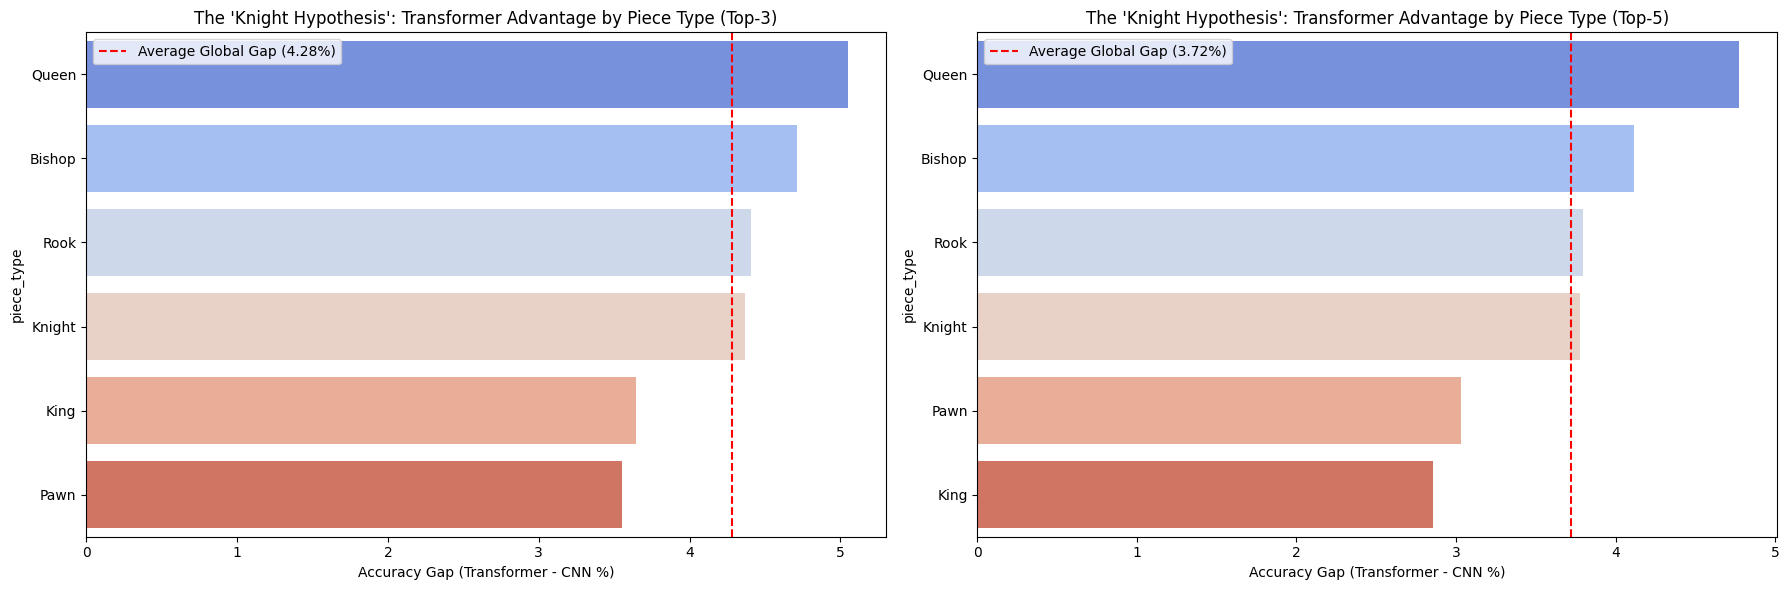

=== Top-3 Piece Performance ===


,cnn_first_move_correct_top3,transformer_first_move_correct_top3,Gap
piece_type,,,
Queen,80.388401,85.439177,5.050776
Bishop,83.547707,88.258867,4.711160
Rook,84.435811,88.843524,4.407712
Knight,84.645736,89.016001,4.370266
King,86.607293,90.248963,3.641670
Pawn,84.993315,88.544698,3.551383



Average Global Gap (Top-3): 4.28%

=== Top-5 Piece Performance ===


,cnn_first_move_correct_top5,transformer_first_move_correct_top5,Gap
piece_type,,,
Queen,86.194012,90.969287,4.775275
Bishop,89.408266,93.523930,4.115664
Rook,89.785455,93.578409,3.792954
Knight,90.068920,93.845032,3.776112
Pawn,90.671796,93.702099,3.030303
King,91.886372,94.744311,2.857939



Average Global Gap (Top-5): 3.72%


In [ ]:

# Calculate mean accuracy by piece for Top-3
piece_performance_top3 = puzzles_df.groupby('piece_type')[['cnn_first_move_correct_top3', 'transformer_first_move_correct_top3']].mean() * 100
piece_performance_top3['Gap'] = piece_performance_top3['transformer_first_move_correct_top3'] - piece_performance_top3['cnn_first_move_correct_top3']
piece_performance_top3 = piece_performance_top3.sort_values('Gap', ascending=False)

# Calculate mean accuracy by piece for Top-5
piece_performance_top5 = puzzles_df.groupby('piece_type')[['cnn_first_move_correct_top5', 'transformer_first_move_correct_top5']].mean() * 100
piece_performance_top5['Gap'] = piece_performance_top5['transformer_first_move_correct_top5'] - piece_performance_top5['cnn_first_move_correct_top5']
piece_performance_top5 = piece_performance_top5.sort_values('Gap', ascending=False)

# Get the average global gap for reference lines
avg_gap_top3 = (puzzles_df['transformer_first_move_correct_top3'].mean() - puzzles_df['cnn_first_move_correct_top3'].mean()) * 100
avg_gap_top5 = (puzzles_df['transformer_first_move_correct_top5'].mean() - puzzles_df['cnn_first_move_correct_top5'].mean()) * 100

# Side-by-side visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Top-3 plot
import seaborn as sns
sns.barplot(x=piece_performance_top3['Gap'], y=piece_performance_top3.index, palette='coolwarm', ax=ax1)
ax1.axvline(avg_gap_top3, color='red', linestyle='--', label=f'Average Global Gap ({avg_gap_top3:.2f}%)')
ax1.set_title("The 'Knight Hypothesis': Transformer Advantage by Piece Type (Top-3)", fontsize=12)
ax1.set_xlabel("Accuracy Gap (Transformer - CNN %)")
ax1.legend()

# Top-5 plot
sns.barplot(x=piece_performance_top5['Gap'], y=piece_performance_top5.index, palette='coolwarm', ax=ax2)
ax2.axvline(avg_gap_top5, color='red', linestyle='--', label=f'Average Global Gap ({avg_gap_top5:.2f}%)')
ax2.set_title("The 'Knight Hypothesis': Transformer Advantage by Piece Type (Top-5)", fontsize=12)
ax2.set_xlabel("Accuracy Gap (Transformer - CNN %)")
ax2.legend()

plt.tight_layout()
plt.show()

# Display detailed results
print("=== Top-3 Piece Performance ===")
display(piece_performance_top3)
print(f"\nAverage Global Gap (Top-3): {avg_gap_top3:.2f}%\n")

print("=== Top-5 Piece Performance ===")
display(piece_performance_top5)
print(f"\nAverage Global Gap (Top-5): {avg_gap_top5:.2f}%")

## Piece Type Performance Analysis (Top-3 and Top-5)

**Testing the "Knight Hypothesis"**: Does the Transformer's global attention mechanism handle non-linear Knight movements better than CNN's local pattern matching?

This analysis uses the previously extracted `piece_type` column (from FEN parsing with the chess library) to examine:
- Accuracy by piece type (Pawn, Knight, Bishop, Rook, Queen, King)
- Transformer advantage (gap) for each piece at top-3 and top-5 levels
- Comparison to average global gap (red dashed line)

**Expected patterns**:
- **Knights**: If hypothesis holds, should show largest gap (non-linear movement requires global coordination)
- **Long-range pieces** (Queen, Bishop, Rook): May benefit from Transformer's global attention
- **Short-range pieces** (King, Pawn): May show smaller gaps if local patterns suffice

Side-by-side plots reveal how piece-type advantages evolve from top-3 to top-5, testing whether architectural differences in spatial reasoning persist across prediction depths.

## Section 4 (Top-3 and Top-5): Structural Complexity & Board Openness Analysis

### Why are we doing this?
To move beyond qualitative theme labels, we are now quantifying the **physical state of the board** for top-3 and top-5 predictions. Our previous results suggest that the Transformer's advantage is not just about piece types, but about **spatial coordination**. 

By examining how board structure affects performance at different k-levels, we can better understand how multiple candidate moves interact with environmental factors.

### Objectives of this Analysis:
We are analyzing four key structural columns to evaluate the following hypotheses at top-3 and top-5 levels:

1. **Board Openness (`openness_score`)**: 
   * **Definition**: (Total Empty Squares / Total Pieces).
   * **Hypothesis**: We expect the Transformer's advantage to grow as the board opens up at all k-levels, requiring its **Global Attention** to coordinate pieces across vast empty spaces that the CNN's local kernels may struggle to bridge.

2. **Structural Congestion (`pawn_count`)**: 
   * **Hypothesis**: Pawns act as physical barriers. High pawn counts create "closed" positions where interactions are local. We expect the CNN to be most competitive here, while the Transformer should pull ahead as pawns are cleared (potentially even more so with top-k predictions).

3. **Material Count (`total_pieces`)**: 
   * **Hypothesis**: Serves as a proxy for the Game Phase (Middlegame vs. Endgame). 

4. **Branching Factor (`num_legal_moves`)**: 
   * **Hypothesis**: Measures "Search Complexity." It tests if the Transformer's attention mechanism is more effective at filtering out "noise" as the number of legal move options increases, especially when considering multiple candidates.

In [ ]:
import chess
import pandas as pd
import numpy as np

# Note: The structural metrics (total_pieces, pawn_count, num_legal_moves, openness_score)
# should already exist from the previous Section 4 analysis.
# We'll verify they exist, and if not, we'll create them.

if not all(col in puzzles_df.columns for col in ['total_pieces', 'pawn_count', 'num_legal_moves', 'openness_score']):
    print("Extracting board structural metrics (if not already present)...")
    
    def extract_advanced_metrics(row):
        try:
            # Initialize board from FEN
            board = chess.Board(row['FEN'])
            
            # 1. Total Pieces (Material Count)
            total_pieces = len(board.piece_map())
            
            # 2. Pawn Count (Structural Congestion)
            pawn_count = len(board.pieces(chess.PAWN, chess.WHITE)) + \
                         len(board.pieces(chess.PAWN, chess.BLACK))
            
            # 3. Legal Moves (Branching Factor)
            num_legal_moves = board.legal_moves.count()
            
            # 4. Board Openness (The "Spatial Gap" Metric)
            # Ratio of empty squares to occupied pieces
            empty_squares = 64 - total_pieces
            openness_score = empty_squares / total_pieces if total_pieces > 0 else 64
            
            return total_pieces, pawn_count, num_legal_moves, openness_score
        except:
            return np.nan, np.nan, np.nan, np.nan
    
    metrics_data = puzzles_df.apply(extract_advanced_metrics, axis=1)
    
    # Assign to new columns
    puzzles_df[['total_pieces', 'pawn_count', 'num_legal_moves', 'openness_score']] = pd.DataFrame(
        metrics_data.tolist(), index=puzzles_df.index
    )
    
    print("Columns added: 'total_pieces', 'pawn_count', 'num_legal_moves', 'openness_score'")
else:
    print("Structural metrics already exist in the dataframe.")

display(puzzles_df[['total_pieces', 'pawn_count', 'num_legal_moves', 'openness_score']].head())

Extracting board structural metrics (if not already present)...
Columns added: 'total_pieces', 'pawn_count', 'num_legal_moves', 'openness_score'


,total_pieces,pawn_count,num_legal_moves,openness_score
0,20.0,10.0,35.0,2.200000
1,18.0,10.0,40.0,2.555556
2,11.0,7.0,16.0,4.818182
3,30.0,14.0,39.0,1.133333
4,14.0,8.0,34.0,3.571429


### Section 4.1 (Top-3 and Top-5): Correlation Heatmap - Structural Drivers of the Advantage

Now that we have quantified the board state using metrics like **Openness** and **Branching Factor**, we will use correlation heatmaps to identify the "structural drivers" of the performance gap at top-3 and top-5 levels.

We are specifically looking for the relationship between our structural metrics and the **Transformer Advantage** at different k-levels:
* **Positive Correlation with Openness**: Would suggest the Transformer's Global Attention thrives when pieces are scattered across empty space, potentially even more so with multiple candidate moves.
* **Correlation with Pawn Count**: Helps us see if the CNN's local kernels become more competitive in "closed" (high pawn) vs "open" (low pawn) positions.
* **Correlation with Legal Moves**: Tests if search space complexity (noise) favors one architecture over the other when considering top-k predictions.

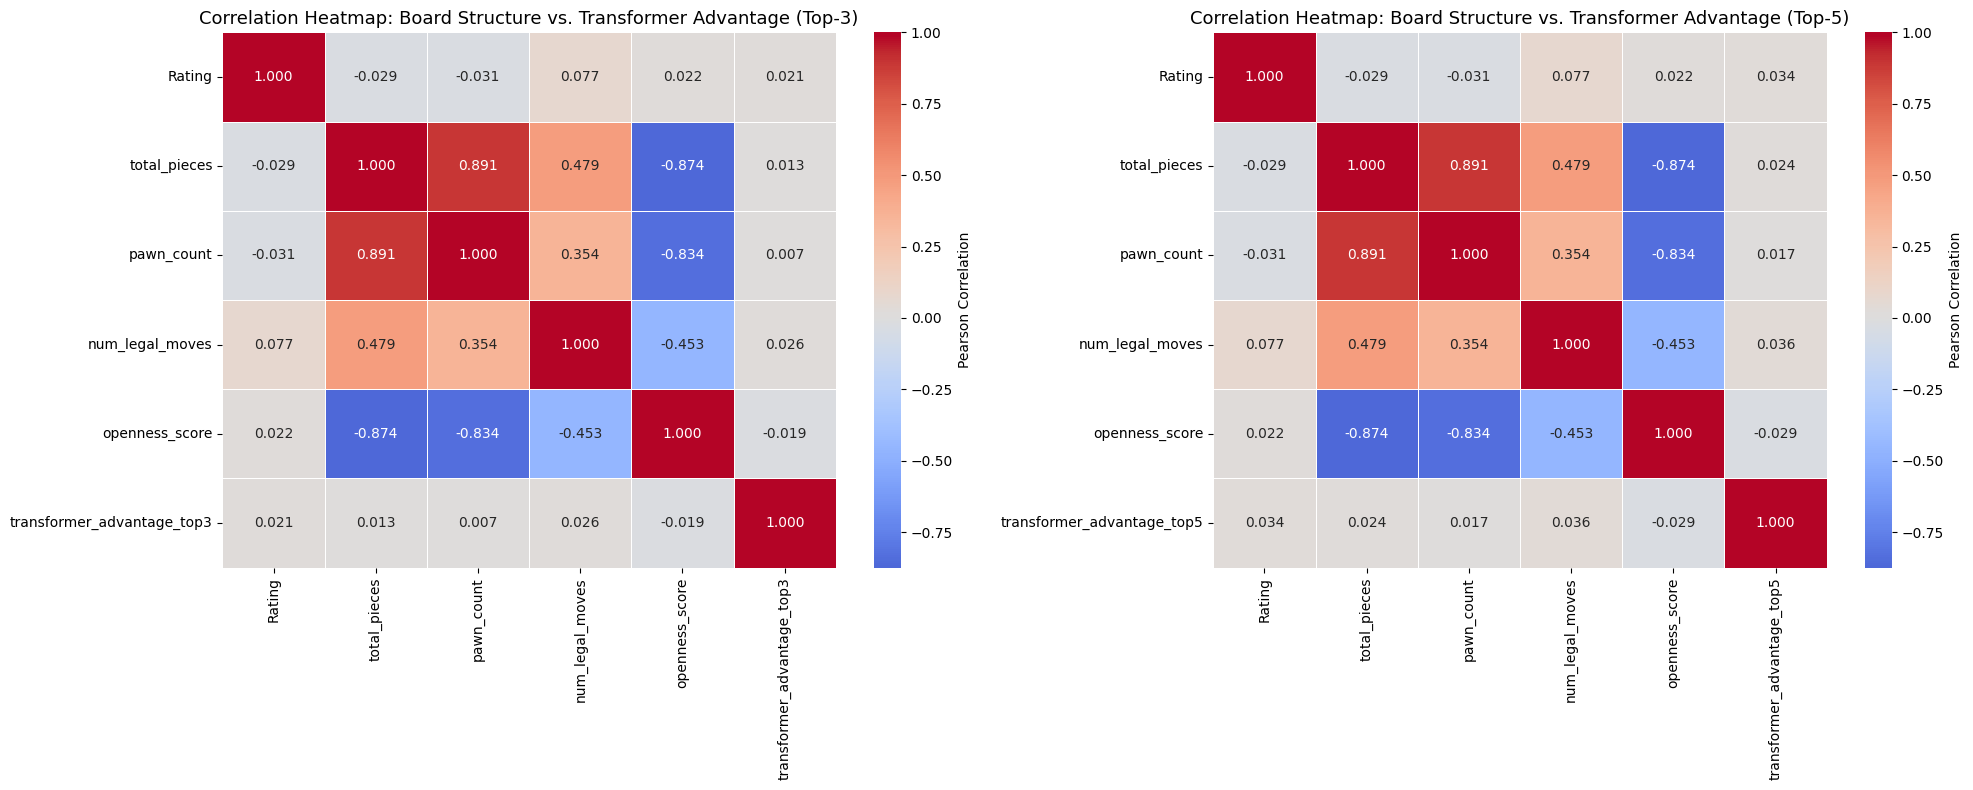

=== Correlation with Transformer Advantage (Top-3) ===
transformer_advantage_top3    1.000000
num_legal_moves               0.025678
Rating                        0.020784
total_pieces                  0.013434
pawn_count                    0.007442
openness_score               -0.018657
Name: transformer_advantage_top3, dtype: float64

=== Correlation with Transformer Advantage (Top-5) ===
transformer_advantage_top5    1.000000
num_legal_moves               0.035737
Rating                        0.033561
total_pieces                  0.024024
pawn_count                    0.017332
openness_score               -0.028770
Name: transformer_advantage_top5, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define the Transformer Advantage for Top-3 and Top-5
# (1: Trans won alone, -1: CNN won alone, 0: both same)
puzzles_df['transformer_advantage_top3'] = (
    puzzles_df['transformer_first_move_correct_top3'].astype(int) - 
    puzzles_df['cnn_first_move_correct_top3'].astype(int)
)

puzzles_df['transformer_advantage_top5'] = (
    puzzles_df['transformer_first_move_correct_top5'].astype(int) - 
    puzzles_df['cnn_first_move_correct_top5'].astype(int)
)

# 2. Select the structural features for the heatmap
corr_cols_top3 = [
    'Rating', 
    'total_pieces', 
    'pawn_count', 
    'num_legal_moves', 
    'openness_score', 
    'transformer_advantage_top3'
]

corr_cols_top5 = [
    'Rating', 
    'total_pieces', 
    'pawn_count', 
    'num_legal_moves', 
    'openness_score', 
    'transformer_advantage_top5'
]

# 3. Compute the Correlation Matrices
corr_matrix_top3 = puzzles_df[corr_cols_top3].corr()
corr_matrix_top5 = puzzles_df[corr_cols_top5].corr()

# 4. Plot the Heatmaps side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Top-3 Heatmap
sns.heatmap(
    corr_matrix_top3, 
    annot=True, 
    cmap='coolwarm', 
    center=0, 
    fmt=".3f", 
    linewidths=0.5,
    cbar_kws={"label": "Pearson Correlation"},
    ax=ax1
)
ax1.set_title("Correlation Heatmap: Board Structure vs. Transformer Advantage (Top-3)", fontsize=13)

# Top-5 Heatmap
sns.heatmap(
    corr_matrix_top5, 
    annot=True, 
    cmap='coolwarm', 
    center=0, 
    fmt=".3f", 
    linewidths=0.5,
    cbar_kws={"label": "Pearson Correlation"},
    ax=ax2
)
ax2.set_title("Correlation Heatmap: Board Structure vs. Transformer Advantage (Top-5)", fontsize=13)

plt.tight_layout()
plt.savefig("structural_correlation_heatmap_top3_top5.png")
plt.show()

# 5. Display the specific correlation with our target variables
print("=== Correlation with Transformer Advantage (Top-3) ===")
print(corr_matrix_top3['transformer_advantage_top3'].sort_values(ascending=False))
print("\n=== Correlation with Transformer Advantage (Top-5) ===")
print(corr_matrix_top5['transformer_advantage_top5'].sort_values(ascending=False))

## Stratified Analysis: Board Openness vs Transformer Advantage (Top-3 and Top-5)

**Controlling for Confounding Variables**: Does board openness drive the Transformer's advantage after controlling for puzzle difficulty?

### Methodology:
1. **Create Rating Bins (Deciles)**: Divide puzzles into 10 equal groups by difficulty (0 = easiest, 9 = hardest)

2. **Create Openness Bins (Quintiles)**: 
   - Very Closed → Very Open
   - Based on `openness_score` = empty squares / total pieces

3. **Calculate Stratified Advantage**:
   - Within each (rating, openness) combination
   - Compute mean transformer_advantage_top3 and transformer_advantage_top5

4. **Visualize Interaction Effects**:
   - Line plots showing advantage vs rating level
   - Separate lines for each openness category
   - Reveals whether openness effect is consistent across difficulties

**Key Question**: If the Transformer excels in "open" positions due to global attention (as hypothesized), its advantage should increase with openness **within each difficulty level**. If the relationship disappears after stratification, it was confounded by difficulty.

This prepares the foundation for causal DAG analysis in Section 5.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Stratified Analysis: Transformer Advantage vs. Openness (Controlling for Rating)
# Top-3 and Top-5

# 1. Create Rating Bins (Deciles) to control for difficulty (if not already created)
if 'rating_bin' not in puzzles_df.columns:
    puzzles_df['rating_bin'] = pd.qcut(puzzles_df['Rating'], 10, labels=False)

# 2. Create Openness Bins (if not already created)
if 'openness_bin' not in puzzles_df.columns:
    puzzles_df['openness_bin'] = pd.qcut(puzzles_df['openness_score'], 5, 
                                          labels=['Very Closed', 'Closed', 'Moderate', 'Open', 'Very Open'])

# 3. Calculate Mean Advantage across these strata for Top-3 and Top-5
stratified_gap_top3 = puzzles_df.groupby(['rating_bin', 'openness_bin'], observed=True)['transformer_advantage_top3'].mean().unstack()
stratified_gap_top5 = puzzles_df.groupby(['rating_bin', 'openness_bin'], observed=True)['transformer_advantage_top5'].mean().unstack()

# 4. Plot the results side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Top-3 plot
stratified_gap_top3.plot(marker='o', ax=ax1)
ax1.set_title("Transformer Advantage vs. Openness (Adjusted for Rating) - Top-3", fontsize=13)
ax1.set_xlabel("Rating Decile (0 = Easiest, 9 = Hardest)")
ax1.set_ylabel("Mean Transformer Advantage (Top-3)")
ax1.legend(title="Board Openness", bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Top-5 plot
stratified_gap_top5.plot(marker='o', ax=ax2)
ax2.set_title("Transformer Advantage vs. Openness (Adjusted for Rating) - Top-5", fontsize=13)
ax2.set_xlabel("Rating Decile (0 = Easiest, 9 = Hardest)")
ax2.set_ylabel("Mean Transformer Advantage (Top-5)")
ax2.legend(title="Board Openness", bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


KeyError: 'openness_score'

## Move Ordering Quality: MRR and NDCG@5 Analysis

**Beyond Binary Correctness**: While top-k accuracy tells us if the correct move is *somewhere* in the predictions, it doesn't capture **where** it appears. A correct move at rank 1 is more valuable than at rank 5.

### Metrics:

**1. Mean Reciprocal Rank (MRR)**:
- Formula: Average of $\frac{1}{\text{rank}}$ where correct move appears
- **Rank 1** (perfect): contributes 1.0
- **Rank 5** (barely correct): contributes 0.2
- **Not in top-5**: contributes 0.0
- **Higher is better** - rewards placing the correct move early

**2. NDCG@5 (Normalized Discounted Cumulative Gain)**:
- Measures ranking quality with logarithmic decay: $\frac{1}{\log_2(\text{rank} + 1)}$
- Normalized against ideal ranking (correct move at position 1)
- **Range [0, 1]** where 1 = perfect ranking
- More nuanced than MRR - penalizes lower ranks more heavily

### Visualization:
Color-coded rank distributions show:
- **Green (Rank 1)**: First choice was correct - ideal performance
- **Yellow/Orange (Ranks 2-4)**: Correct move in consideration but not top choice
- **Red (Rank 5)**: Barely captured in top-5
- **Gray (Not in top-5)**: Complete miss

**Key Question**: Does the Transformer not only get more puzzles right (higher top-k accuracy) but also place the correct move **higher in its ranking** (better MRR/NDCG)?



CNN: Parsed 5,600,086/5,600,086 top-5 lists
  MRR: 0.7521
  NDCG@5: 0.7883

Transformer: Parsed 5,600,086/5,600,086 top-5 lists
  MRR: 0.7983
  NDCG@5: 0.8323


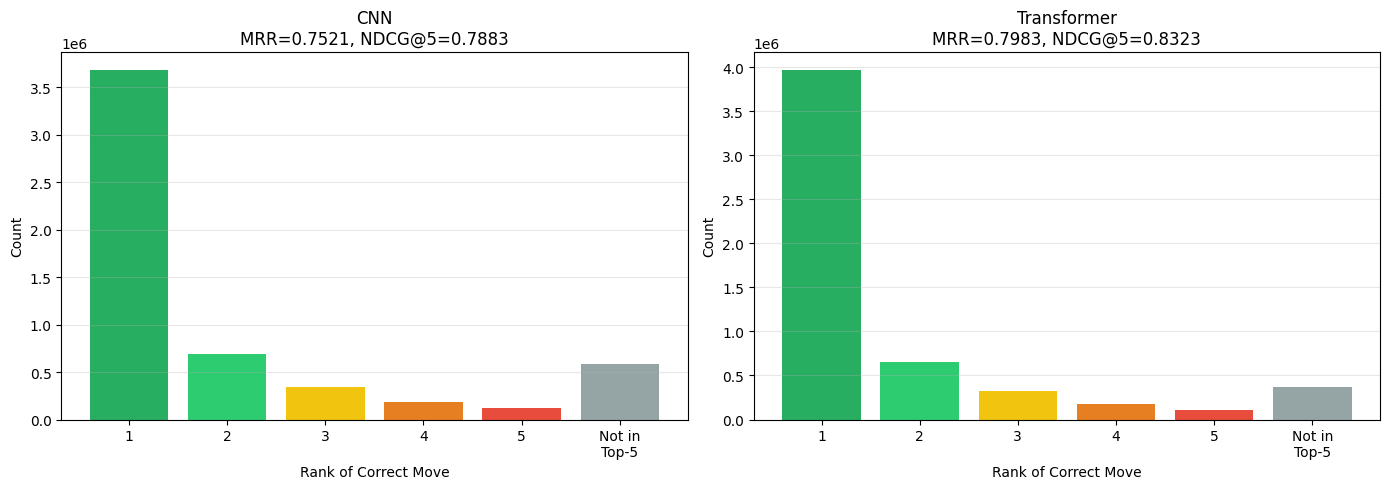

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

def compute_move_ordering_metrics(
    df,
    cnn_top5_col='cnn_top5_moves',
    trans_top5_col='transformer_top5_moves',
    plot=True
):
    """
    Compute MRR and NDCG@5 for move ranking quality.
    
    MRR (Mean Reciprocal Rank): Average of 1/rank where correct move appears
    NDCG@5: Normalized DCG measuring ranking quality
    
    Args:
        df: DataFrame with top-5 predictions
        cnn_top5_col: Column with CNN top-5 moves
        trans_top5_col: Column with Transformer top-5 moves
        plot: Whether to show visualization
        
    Returns:
        Dictionary with MRR, NDCG, and rank distribution for each model
    """
    # Use the existing _first_move function logic
    def get_first_move(row):
        moves = str(row.get("Moves", ""))
        return moves.split()[1] if moves and len(moves.split()) > 1 else None
    
    # Parse move list using the existing _parse_move_list logic
    def parse_move_list(val):
        try:
            return json.loads(val)
        except:
            return []
    
    ground_truth = df.apply(get_first_move, axis=1).tolist()
    
    results = {}
    
    for model_name, top5_col in [('CNN', cnn_top5_col), ('Transformer', trans_top5_col)]:
        if top5_col not in df.columns:
            print(f"Column '{top5_col}' not found")
            continue
        
        predictions = [parse_move_list(m) for m in df[top5_col]]
        
        # Check parsing success
        valid = sum(1 for p in predictions if len(p) > 0)
        print(f"\n{model_name}: Parsed {valid:,}/{len(predictions):,} top-5 lists")
        
        reciprocal_ranks = []
        rank_counts = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 'not_in_top5': 0}
        ndcg_scores = []
        
        for preds, gt in zip(predictions, ground_truth):
            if not preds or not gt:
                continue
            
            if gt in preds:
                rank = preds.index(gt) + 1
                reciprocal_ranks.append(1.0 / rank)
                rank_counts[rank] += 1
                ndcg_scores.append(1.0 / np.log2(rank + 1))
            else:
                reciprocal_ranks.append(0.0)
                rank_counts['not_in_top5'] += 1
                ndcg_scores.append(0.0)
        
        idcg = 1.0 / np.log2(2)  # Ideal DCG (correct at rank 1)
        mrr = np.mean(reciprocal_ranks) if reciprocal_ranks else 0
        ndcg = (np.mean(ndcg_scores) / idcg) if ndcg_scores else 0
        
        results[model_name] = {
            'MRR': mrr,
            'NDCG@5': ndcg,
            'rank_distribution': rank_counts,
            'total_evaluated': len(reciprocal_ranks)
        }
        
        print(f"  MRR: {mrr:.4f}")
        print(f"  NDCG@5: {ndcg:.4f}")
    
    if plot and len(results) >= 1:
        n_models = len(results)
        fig, axes = plt.subplots(1, n_models, figsize=(7 * n_models, 5))
        if n_models == 1:
            axes = [axes]
        
        for ax, (model, data) in zip(axes, results.items()):
            ranks = [1, 2, 3, 4, 5]
            counts = [data['rank_distribution'].get(r, 0) for r in ranks]
            counts.append(data['rank_distribution'].get('not_in_top5', 0))
            labels = ['1', '2', '3', '4', '5', 'Not in\nTop-5']
            colors = ['#27ae60', '#2ecc71', '#f1c40f', '#e67e22', '#e74c3c', '#95a5a6']
            
            ax.bar(range(6), counts, color=colors)
            ax.set_xticks(range(6))
            ax.set_xticklabels(labels)
            ax.set_title(f'{model}\nMRR={data["MRR"]:.4f}, NDCG@5={data["NDCG@5"]:.4f}')
            ax.set_xlabel('Rank of Correct Move')
            ax.set_ylabel('Count')
            ax.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    return results

# Run the analysis
results = compute_move_ordering_metrics(puzzles_df)


## MRR and NDCG Results Summary

### The Numbers

| Metric | CNN | Transformer | Winner |
|--------|-----|-------------|--------|
| **MRR** | 0.7521 | 0.7983 | Transformer (+0.046) |
| **NDCG@5** | 0.7883 | 0.8323 | Transformer (+0.044) |

### What This Means in Plain English

**CNN (MRR = 0.75)**
- On average, the correct move is found around rank 1.3

**Transformer (MRR = 0.80)**
- On average, the correct move is found around rank 1.25

**Key Insight**: Both models are very good at ranking - the correct move is almost always near the top. However, the Transformer consistently places it slightly higher, leading to better MRR and NDCG scores.

### Interpretation
The ~0.05 difference in both metrics indicates:
- Transformer doesn't just get more puzzles "correct somewhere in top-5"
- It also **ranks the correct move higher** on average
- This suggests better confidence calibration and move evaluation
- The advantage is modest but consistent across the entire dataset

==========================================================================================================================================================

## Mean Rank When Top-1 is Wrong

**Recovery Analysis**: When a model's first choice is incorrect, where does the correct move typically appear in ranks 2-5?

### Why This Matters:
- **MRR and NDCG** blend all puzzles together (correct + incorrect at rank 1)
- This analysis **isolates mistakes** to reveal recovery patterns
- Shows whether wrong predictions are "close misses" (rank 2-3) or "far misses" (rank 5 or not in top-5)

### Key Questions:
1. When the top-1 prediction fails, how far down must we look to find the correct move?
2. Does one model have better "backup candidates" than the other?
3. Is the Transformer's advantage partly due to having the correct move "just below" the top prediction?

### Interpretation:
- **Lower mean rank** (closer to 2) = Better recovery, correct move is "runner-up"
- **Higher mean rank** (closer to 5) = Worse recovery, correct move is barely considered
- **High "not in top-5" count** = Model didn't consider the correct move at all

This complements the MRR/NDCG analysis by focusing specifically on failure cases and recovery potential.


In [ ]:
import numpy as np
import pandas as pd
import json

def mean_rank_when_wrong(df, top5_col, moves_col='Moves'):
    """
    Calculate the mean rank of correct move when it's NOT ranked #1.
    
    Returns:
        - mean_rank: average position (2-5) when not exact match
        - stats: detailed breakdown
    """
    # Use existing function logic to get ground truth
    def get_first_move(row):
        moves = str(row.get(moves_col, ""))
        return moves.split()[1] if moves and len(moves.split()) > 1 else None
    
    # Parse move list with error handling
    def parse_move_list(val):
        try:
            return json.loads(val)
        except:
            return []
    
    ground_truth = df.apply(get_first_move, axis=1)
    
    ranks_when_wrong = []
    
    for gt, top5_str in zip(ground_truth, df[top5_col]):
        if not gt:
            continue
            
        # Parse top-5
        top5 = parse_move_list(top5_str)
        
        if not top5:
            continue
        
        # Skip if rank 1 (exact match)
        if top5[0] == gt:
            continue
        
        # Find rank (2-5) or mark as not found
        if gt in top5:
            rank = top5.index(gt) + 1  # Will be 2, 3, 4, or 5
            ranks_when_wrong.append(rank)
        else:
            ranks_when_wrong.append(None)  # Not in top-5
    
    # Separate found vs not found
    found_ranks = [r for r in ranks_when_wrong if r is not None]
    not_found_count = len([r for r in ranks_when_wrong if r is None])
    
    # Calculate stats
    mean_rank = np.mean(found_ranks) if found_ranks else 0
    
    stats = {
        'total_wrong_at_rank1': len(ranks_when_wrong),
        'found_in_top5': len(found_ranks),
        'not_in_top5': not_found_count,
        'mean_rank_when_found': mean_rank,
        'rank_distribution': {
            2: found_ranks.count(2),
            3: found_ranks.count(3),
            4: found_ranks.count(4),
            5: found_ranks.count(5)
        }
    }
    
    return mean_rank, stats


# Run for both models
cnn_mean, cnn_stats = mean_rank_when_wrong(puzzles_df, 'cnn_top5_moves')
trans_mean, trans_stats = mean_rank_when_wrong(puzzles_df, 'transformer_top5_moves')

print("MEAN RANK WHEN NOT EXACT MATCH:")

print(f"\nCNN:")
print(f"  Total wrong at rank 1: {cnn_stats['total_wrong_at_rank1']:,}")
print(f"  Found in top 2-5: {cnn_stats['found_in_top5']:,}")
print(f"  Not in top-5: {cnn_stats['not_in_top5']:,}")
print(f"  Mean rank (when found): {cnn_mean:.2f}")
print(f"  Rank distribution: {cnn_stats['rank_distribution']}")

print(f"\nTransformer:")
print(f"  Total wrong at rank 1: {trans_stats['total_wrong_at_rank1']:,}")
print(f"  Found in top 2-5: {trans_stats['found_in_top5']:,}")
print(f"  Not in top-5: {trans_stats['not_in_top5']:,}")
print(f"  Mean rank (when found): {trans_mean:.2f}")
print(f"  Rank distribution: {trans_stats['rank_distribution']}")



MEAN RANK WHEN NOT EXACT MATCH

CNN:
  Total wrong at rank 1: 1,915,803
  Found in top 2-5: 1,335,264
  Not in top-5: 580,539
  → Mean rank (when found): 2.81
  Rank distribution: {2: 685986, 3: 338485, 4: 187416, 5: 123377}

Transformer:
  Total wrong at rank 1: 1,629,443
  Found in top 2-5: 1,257,382
  Not in top-5: 372,061
  → Mean rank (when found): 2.79
  Rank distribution: {2: 655182, 3: 322801, 4: 171657, 5: 107742}

When top-1 is WRONG, correct move is at rank:
  CNN:         2.81 (on average)
  Transformer: 2.79 (on average)


## Interpretation: Recovery When Top-1 Fails

### The Key Finding
**When both models get rank 1 wrong, they perform almost identically** (mean rank 2.81 vs 2.79). 

**The Transformer's advantage comes from getting rank 1 right more often, not from being better at ranking when wrong.**

---

### Breaking Down the Numbers

| Metric | CNN | Transformer | Difference |
|--------|-----|-------------|------------|
| **Wrong at rank 1** | 1,915,803 | 1,629,443 | 286,360 fewer errors |
| **Found in top 2-5** | 1,335,264 | 1,257,382 | - |
| **Not in top-5** | 580,539 | 372,061 | 208,478 fewer misses |
| **Mean rank (when found)** | 2.81 | 2.79 | ~0.02 (negligible) |

---

###  Key Insights



**1. When Wrong, Both Rank Similarly**
```
Mean rank when wrong:
  CNN:         2.81
  Transformer: 2.79
  Difference:  0.02 (essentially identical)
```
This means both models have similar **"near-miss" behavior** - when they don't nail rank 1, they both typically put the correct move at rank 2-3.

**2. Transformer Has Better "Safety Net"**
```
Correct move NOT in top-5 at all:
  CNN:         580,539 (30% of errors)
  Transformer: 372,061 (23% of errors)
  Difference:    208,478 fewer complete misses
```
The Transformer is **less likely to completely miss** the correct move.

